# Imports, Data Uploads, & Data manipulation

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import re
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas import json_normalize 
import sys
import io
sys.setrecursionlimit(10**6)
pd.set_option('display.max_rows', None)

In [ ]:
#If using Google Colab
from google.colab import files
uploaded = files.upload()

Saving chocoFollowers.csv to chocoFollowers (2).csv
Saving hasanabiFollowers.csv to hasanabiFollowers (2).csv
Saving MythFollowers.csv to MythFollowers (2).csv
Saving NinjaFollowers.csv to NinjaFollowers (1).csv
Saving NinjaFollowers2.csv to NinjaFollowers2.csv
Saving SykkunoFollowers.csv to SykkunoFollowers.csv
Saving SypherFollowers.csv to SypherFollowers.csv
Saving trendingGames.csv to trendingGames.csv
Saving twitchUsers.csv to twitchUsers.csv
Saving userVideos.csv to userVideos.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#If using Jupyter Notebook

#Import data
trendingGames = pd.read_csv('Data/trendingGames.csv', encoding='utf-8', parse_dates=True)
twitchUsers = pd.read_csv('Data/twitchUsers.csv', encoding='utf-8', parse_dates=True)
userVideos = pd.read_csv('Data/userVideos.csv', encoding='utf-8', parse_dates=True)
mythFollowers = pd.read_csv('Data/mythFollowers.csv', encoding='utf-8', parse_dates=True)
ninjaFollowers1 = pd.read_csv('Data/NinjaFollowers.csv', encoding='utf-8', parse_dates=True)
ninjaFollowers2 = pd.read_csv('Data/NinjaFollowers2.csv', encoding='utf-8', parse_dates=True)
sykkunoFollowers = pd.read_csv('Data/SykkunoFollowers.csv', encoding='utf-8', parse_dates=True)
sypherFollowers = pd.read_csv('Data/SypherFollowers.csv', encoding='utf-8', parse_dates=True)
hasanabiFollowers = pd.read_csv('Data/hasanabiFollowers.csv', encoding='utf-8', parse_dates=True)
chocotacoFollowers = pd.read_csv('Data/chocoFollowers.csv', encoding='utf-8', parse_dates=True)

FileNotFoundError: ignored

In [ ]:
#Import data
trendingGames = pd.read_csv(io.BytesIO(uploaded['trendingGames.csv']), encoding='utf-8', parse_dates=True)
twitchUsers = pd.read_csv(io.BytesIO(uploaded['twitchUsers.csv']), encoding='utf-8', parse_dates=True)
userVideos = pd.read_csv(io.BytesIO(uploaded['userVideos.csv']), encoding='utf-8', parse_dates=True)
mythFollowers = pd.read_csv(io.BytesIO(uploaded['MythFollowers.csv']), encoding='utf-8', parse_dates=True)
ninjaFollowers1 = pd.read_csv(io.BytesIO(uploaded['NinjaFollowers.csv']), encoding='utf-8', parse_dates=True)
ninjaFollowers2 = pd.read_csv(io.BytesIO(uploaded['NinjaFollowers2.csv']), encoding='utf-8', parse_dates=True)
sykkunoFollowers = pd.read_csv(io.BytesIO(uploaded['SykkunoFollowers.csv']), encoding='utf-8', parse_dates=True)
sypherFollowers = pd.read_csv(io.BytesIO(uploaded['SypherFollowers.csv']), encoding='utf-8', parse_dates=True)
hasanabiFollowers = pd.read_csv(io.BytesIO(uploaded['hasanabiFollowers.csv']), encoding='utf-8', parse_dates=True)
chocotacoFollowers = pd.read_csv(io.BytesIO(uploaded['chocoFollowers.csv']), encoding='utf-8', parse_dates=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Check Data Frames are valid and make any neccessary adjustments

#trendingGames.head()

#twitchUsers.head()
twitchUsers = twitchUsers.drop(columns=['profile_image_url','offline_image_url','type', 'login']) 

#userVideos.head()
userVideos = userVideos.rename(columns={'id':'video_id'}) #Updating id to video_id to relieve any confusion
userVideos = userVideos.drop(columns=['published_at', 'thumbnail_url']) #Drop irrelevant columns
userVideos['date'] = userVideos['created_at'].str.extract(r'(\d{2,4}-\d{1,2}-\d{1,2})') #Extract date from datetime
userVideos['day'] = pd.DatetimeIndex(userVideos['created_at']).dayofweek #find dow from week
userVideos['week'] = pd.DatetimeIndex(userVideos['created_at']).week #find week from year
userVideos['date'] = pd.to_datetime(userVideos['date']) #convert new date column to datetime format
userVideos['created_at'] = pd.to_datetime(userVideos['created_at']) #convert created_at column to datetime format
userVideos = userVideos[userVideos.date.between('9/7/2020', '11/5/2020')] #ensure that data is only in our scope

#mythFollowers.head()
mythFollowers['date'] = mythFollowers['followed_at'].str.extract(r'(\d{2,4}-\d{1,2}-\d{1,2})') 
mythFollowers['followed_at'] = pd.to_datetime(mythFollowers['followed_at'])    
mythFollowers['day'] = pd.DatetimeIndex(mythFollowers['followed_at']).dayofweek
mythFollowers['week'] = pd.DatetimeIndex(mythFollowers['followed_at']).week
mythFollowers['date'] = pd.to_datetime(mythFollowers['date'])
mythFollowers = mythFollowers[mythFollowers.date.between('9/7/2020', '11/5/2020')]

#ninjaFollowers1.head()
#ninjaFollowers2.head()

#sykkunoFollowers.head()
sykkunoFollowers['date'] = sykkunoFollowers['followed_at'].str.extract(r'(\d{2,4}-\d{1,2}-\d{1,2})') 
sykkunoFollowers['followed_at'] = pd.to_datetime(sykkunoFollowers['followed_at'])    
sykkunoFollowers['day'] = pd.DatetimeIndex(sykkunoFollowers['followed_at']).dayofweek
sykkunoFollowers['week'] = pd.DatetimeIndex(sykkunoFollowers['followed_at']).week
sykkunoFollowers['date'] = pd.to_datetime(sykkunoFollowers['date'])
sykkunoFollowers = sykkunoFollowers[sykkunoFollowers.date.between('9/7/2020', '11/5/2020')]

#sypherFollowers.head()
sypherFollowers['date'] = sypherFollowers['followed_at'].str.extract(r'(\d{2,4}-\d{1,2}-\d{1,2})') 
sypherFollowers['followed_at'] = pd.to_datetime(sypherFollowers['followed_at'])    
sypherFollowers['day'] = pd.DatetimeIndex(sypherFollowers['followed_at']).dayofweek
sypherFollowers['week'] = pd.DatetimeIndex(sypherFollowers['followed_at']).week
sypherFollowers['date'] = pd.to_datetime(sypherFollowers['date'])
sypherFollowers = sypherFollowers[sypherFollowers.date.between('9/7/2020', '11/5/2020')]

#hasanabiFollowers.head()
hasanabiFollowers['date'] = hasanabiFollowers['followed_at'].str.extract(r'(\d{2,4}-\d{1,2}-\d{1,2})') 
hasanabiFollowers['followed_at'] = pd.to_datetime(hasanabiFollowers['followed_at'])    
hasanabiFollowers['day'] = pd.DatetimeIndex(hasanabiFollowers['followed_at']).dayofweek
hasanabiFollowers['week'] = pd.DatetimeIndex(hasanabiFollowers['followed_at']).week
hasanabiFollowers['date'] = pd.to_datetime(hasanabiFollowers['date'])
hasanabiFollowers = hasanabiFollowers[hasanabiFollowers.date.between('9/7/2020', '11/5/2020')]

#chocotacoFollowers.head()
chocotacoFollowers['date'] = chocotacoFollowers['followed_at'].str.extract(r'(\d{2,4}-\d{1,2}-\d{1,2})')
chocotacoFollowers['followed_at'] = pd.to_datetime(chocotacoFollowers['followed_at']) 
chocotacoFollowers['day'] = pd.DatetimeIndex(chocotacoFollowers['followed_at']).dayofweek
chocotacoFollowers['week'] = pd.DatetimeIndex(chocotacoFollowers['followed_at']).week
chocotacoFollowers['date'] = pd.to_datetime(chocotacoFollowers['date'])
chocotacoFollowers = chocotacoFollowers[chocotacoFollowers.date.between('9/7/2020', '11/5/2020')]

#Concat both ninja follower data sets into a single Data Frame & validate
ninjaFollowers = pd.concat([ninjaFollowers1, ninjaFollowers2], ignore_index=True)
ninjaFollowers['date'] = ninjaFollowers['followed_at'].str.extract(r'(\d{2,4}-\d{1,2}-\d{1,2})') 
ninjaFollowers['followed_at'] =  pd.to_datetime(ninjaFollowers['followed_at']) 
ninjaFollowers['day'] = pd.DatetimeIndex(ninjaFollowers['followed_at']).dayofweek
ninjaFollowers['week'] = pd.DatetimeIndex(ninjaFollowers['followed_at']).week
ninjaFollowers['date'] = pd.to_datetime(ninjaFollowers['date'])
ninjaFollowers = ninjaFollowers[ninjaFollowers.date.between('9/7/2020', '11/5/2020')]
#ninjaFollowers.head()
#ninjaFollowers.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().w

# Functions

In [ ]:
#Date Functions

#Line Chart for visualizing follower growth on a daily basis
def followers_by_date(df):
    d = df
    d = d.groupby('date')['to_name'].count()
    plt.figure(figsize=(20,8))
    plt.xlabel("Date")
    plt.ylabel('Number of Followers Gained')
    plt.title('Follower Growth by Date')
    plt.xticks(rotation=90)
    plt.plot(d.index, d)
    plt.show()

#Line Chart for visualizing streaming views on a daily basis
def views_by_date(df):
    d = df
    d = d.groupby('date')[['view_count']].sum()
    plt.figure(figsize=(20,8))
    plt.xlabel("Date")
    plt.ylabel('Number of Stream Views')
    plt.title('Streaming Views by Date')
    plt.xticks(rotation=90)
    plt.plot(d.index, d)
    plt.show()   

In [ ]:
#DOW Index Functions

#Bar Chart for visualizing follower growth/distribution by day of week
def follower_dist_by_day(df):
    d = df
    d = d.groupby('day')['to_name'].count()
    ax = d.plot(kind='bar', figsize=[20, 8], width=0.6, alpha=0.6, edgecolor='k')
    ax.set_xticklabels(d.index, rotation_mode='anchor', ha='right')
    ax.yaxis.grid(True)
    ax.set_title('Distribution of Followers by Day of The Week')
    ax.set_xlabel('Day of Week | Index 0 coincides with Monday')
    ax.set_ylabel('Number of Followers Gained')
    plt.show()

#Bar Chart for visualizing view accumulation by day of week
def view_dist_by_day(df):
    d = df
    d = d.groupby('day')['view_count'].sum()
    ax = d.plot(kind='bar', figsize=[20, 8], width=0.6, alpha=0.6, edgecolor='k')
    ax.set_xticklabels(d.index, rotation_mode='anchor', ha='right')
    ax.yaxis.grid(True)
    ax.set_title('Distribution of Views by Day of The Week')
    ax.set_xlabel('Day of Week | Index 0 coincides with Monday')
    ax.set_ylabel('Number of Views Accumulated')
    plt.show()

#Bar Chart for visualizing video distribution by day
def video_dist_by_dow(df):
    d = df
    d = d.groupby('day')['user_id'].count()
    ax = d.plot(kind='bar', figsize=[20, 8], width=0.6, alpha=0.6, edgecolor='k')
    ax.set_xticklabels(d.index, rotation_mode='anchor', ha='right')
    ax.yaxis.grid(True)
    ax.set_title('Distribution of Videos by Day of The Week')
    ax.set_xlabel('Day of Week | Index 0 coincides with Monday')
    ax.set_ylabel('Number of Videos Created')
    plt.show()

In [ ]:
#Week Index Functions

#Line Chart for visualizing follower growth on a weekly basis
def followers_by_week(df):
    print("Note: scope begins on week 37 - 09/07/2020")
    d = df
    d = d.groupby('week')['to_name'].count()
    plt.figure(figsize=(20,8))
    plt.xlabel("Week of The Year")
    plt.ylabel('Number of Followers Gained')
    plt.title('Follower Growth by Week')
    plt.xticks(rotation=90)
    plt.plot(d.index, d)
    plt.show()

#Line Chart for visualizing streaming views on a daily basis
def views_by_week(df):
    d = df
    d = d.groupby('week')[['view_count']].sum()
    plt.figure(figsize=(20,8))
    plt.xlabel("Week Index")
    plt.ylabel('Number of Stream Views')
    plt.title('Streaming Views by Week')
    plt.xticks(rotation=90)
    plt.plot(d.index, d)
    plt.show()

    #Bar Chart for visualizing video distribution by day
def video_dist_by_week(df):
    d = df
    d = d.groupby('week')['user_id'].count()
    ax = d.plot(kind='bar', figsize=[20, 8], width=0.6, alpha=0.6, edgecolor='k')
    ax.set_xticklabels(d.index, rotation_mode='anchor', ha='right')
    ax.yaxis.grid(True)
    ax.set_title('Distribution of Videos by Day of The Week')
    ax.set_xlabel('Day of Week | Index 0 coincides with Monday')
    ax.set_ylabel('Number of Videos Created')
    plt.show()

#Line Chart for visualizing streaming duration on a daily basis
def duration_by_week(df):
    d = df
    d = d.groupby('week')[['duration_formatted']].sum()
    plt.figure(figsize=(20,8))
    plt.xlabel("Date")
    plt.ylabel('Duration')
    plt.title('Streaming Duration by Date')
    plt.xticks(rotation=90)
    plt.plot(d.index, d)
    plt.show() 

In [ ]:
#Other Functions

#Bar Chart for visualizing view accumulation by game
def view_dist_by_game(df):
    d = df
    d = d.groupby('game')['view_count'].sum()
    ax = d.plot(kind='bar', figsize=[20, 8], width=0.6, alpha=0.6, edgecolor='k')
    ax.set_xticklabels(d.index, rotation_mode='anchor', ha='right')
    ax.yaxis.grid(True)
    ax.set_title('Distribution of Views by Game Streamed')
    ax.set_xlabel('Game')
    ax.set_ylabel('Number of Views Accumulated')
    plt.show()


#Joint Scatter Plot to view correlation of # followers to views by date 
#NOTE: Must sum views by date & count followers by date and merge into one df for this to work
def follower_view_joint_scatter_bydate(df):
  with sns.axes_style('white'):
    sns.jointplot("count_followers","view_count",df, 'scatter');

In [ ]:
def count_outliers(df, *args):
    num_outliers = []
    
    #finds any column names in the df that match the args string
    for colname in args:
        #if there is a match, this pulls the data from the column and puts it into a list then sorts ASC
        col = df[colname].tolist()
        col.sort()
      
        #find middle index, lower half, & upper half of data set
        middle_index = len(col)//2
        lower_half = col[:middle_index]
        upper_half = col[middle_index:]
        
        #find Q1 Median value
        q1midpoint = len(lower_half) // 2
        q1median = (lower_half[q1midpoint] + lower_half[~q1midpoint]) / 2
        #print('Q1:',q1median)
            
        #find Q2 Median value    
        q2median = (col[middle_index] + col[~middle_index]) / 2
        #print('Q2:',q2median)
        
        #find Q3 Median value
        q3midpoint = len(upper_half) // 2
        q3median = (upper_half[q3midpoint] + upper_half[~q3midpoint]) / 2
        #print('Q3:',q3median)        
        
        #find Innerquartile Range value
        iqr = q3median - q1median
        #print('IQR:',iqr)
        
        rel_list = 0
        
        #print('Value <:', q1median-(iqr*1.5))
        #print('Value >:', q3median+(iqr*1.5))
        
        for i in col:
            if i > (q3median+(iqr*(1.5))) or i < (q1median-(iqr*(1.5))):
                rel_list += 1
        num_outliers.append(rel_list)

                
    return num_outliers

# General Statistics for all users in scope, combined



**General Statistics for all users in scope, combined**


In [ ]:
userVideos.head()

video_id    user_id  user_name  ...       date  day week
0  793151603   26154978    Sykkuno  ... 2020-11-05    3   45
1  793014095   26154978    Sykkuno  ... 2020-11-05    3   45
2  792935198   32140000   SypherPK  ... 2020-11-05    3   45
3  792929082  207813352   HasanAbi  ... 2020-11-05    3   45
4  792823103   69906737  chocoTaco  ... 2020-11-05    3   45

[5 rows x 16 columns]

In [ ]:
twitchUsers.head()

id  ... view_count
0  110690086  ...  124824131
1   19571641  ...  502417717
2   32140000  ...   74481123
3   26154978  ...   16342873
4  207813352  ...   32304836

[5 rows x 5 columns]

In [ ]:
print("Followers gained from 9/7/2020 through 11/5/2020\n")
print("Myth: ",len(mythFollowers))
print("Ninja: ",len(ninjaFollowers))
print("SypherPK: ",len(sypherFollowers))
print("Sykkuno: ",len(sykkunoFollowers))
print("HasanAbi: ",len(hasanabiFollowers))
print("chocoTaco: ",len(chocotacoFollowers))

Followers gained from 9/7/2020 through 11/5/2020

Myth:  304535
Ninja:  1235555
SypherPK:  213400
Sykkuno:  859090
HasanAbi:  262439
chocoTaco:  30762


In [ ]:
#Added total follower count of user at time of scope end (11/5/2020)
totalfollowers = ['7000000','16100000','3900000','1230000','747000','1163000'] #Numbers rounded up
gainedfollowers = ['304535','1235555','213400','859090','262439','30762'] 
twitchUsers['total_followers'] = totalfollowers
twitchUsers['total_followers'] = twitchUsers['total_followers'].astype(str).astype(int)
twitchUsers['gained_followers'] = gainedfollowers
twitchUsers['gained_followers'] = twitchUsers['gained_followers'].astype(str).astype(int)
twitchUsers['starting_followers'] = twitchUsers['total_followers'] - twitchUsers['gained_followers']
twitchUsers

id display_name  ... gained_followers starting_followers
0  110690086         Myth  ...           304535            6695465
1   19571641        Ninja  ...          1235555           14864445
2   32140000     SypherPK  ...           213400            3686600
3   26154978      Sykkuno  ...           859090             370910
4  207813352     HasanAbi  ...           262439             484561
5   69906737    chocoTaco  ...            30762            1132238

[6 rows x 8 columns]

In [ ]:
print('Basic Follower Statistics:\n')
print('The Sum of followers the users began with at the start of the scope is:',twitchUsers.starting_followers.sum())
print('The Sum of acquired followers over the span of the scope for all users is:',twitchUsers.gained_followers.sum())
print('The Sum of followers the users ended with at the end of the scope is:',twitchUsers.total_followers.sum())
print('The growth % of followers across all users is:',(twitchUsers.gained_followers.sum()/twitchUsers.starting_followers.sum()*100))

Basic Follower Statistics:

The Sum of followers the users began with at the start of the scope is: 27234219
The Sum of acquired followers over the span of the scope for all users is: 2905781
The Sum of followers the users ended with at the end of the scope is: 30140000
The growth % of followers across all users is: 10.669595482066146


In [ ]:
#User video count breakdown
videoCount = userVideos.groupby(['user_name','type'])[['video_id']].count()
videoCount = videoCount.reset_index()
videoCount = videoCount.rename(columns={'video_id':'count'})
videoCount

user_name       type  count
0    HasanAbi    archive     62
1    HasanAbi  highlight      1
2        Myth    archive     41
3        Myth  highlight      4
4       Ninja    archive     49
5     Sykkuno    archive     54
6     Sykkuno  highlight      3
7    SypherPK    archive     55
8    SypherPK  highlight    199
9   chocoTaco    archive     76
10  chocoTaco  highlight      1

In [ ]:
video_type_pie = userVideos.groupby(['type'])[['video_id']].count().reset_index()
video_type_pie

type  video_id
0    archive       337
1  highlight       208

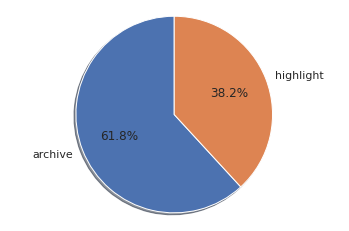

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(video_type_pie.video_id, labels=video_type_pie.type, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
###### Highlight: https://www.twitch.tv/chocotaco/videos?filter=highlights | Short highlight from a previous stream
###### Archive: https://www.twitch.tv/chocotaco/videos?filter=archives | Full stream. Twitch only archives a stream for 2 months.

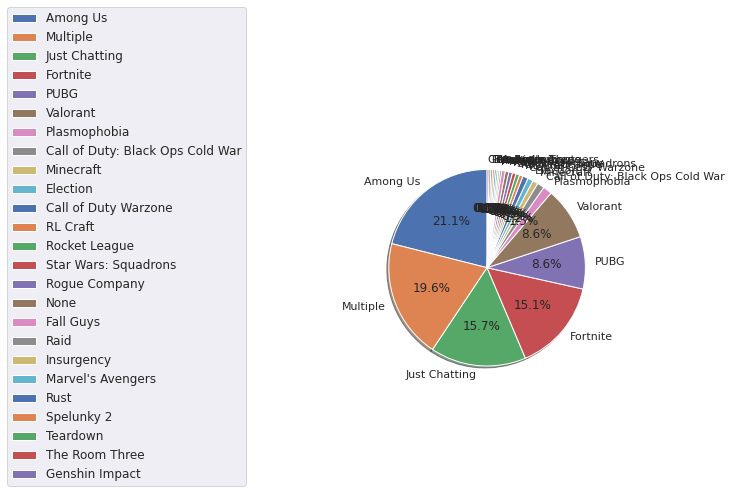

Majority of games being played are Among Us, Fortnite, Just Chatting, and a variety of games


In [ ]:
game_type_pie = userVideos.groupby(['game'])[['video_id']].count().reset_index().sort_values(by='video_id',ascending=False)

fig2, ax2 = plt.subplots()
ax2.pie(game_type_pie.video_id,labels=game_type_pie.game, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels=game_type_pie.game, loc='center right', bbox_to_anchor=(-0.2, 0.6),
           fontsize=12)

plt.show()
print("Majority of games being played are Among Us, Fortnite, Just Chatting, and a variety of games")

In [ ]:
#Adding the video breakdown to the user's dataframe for more detail
#myth,ninja,sypher,sykkuno,hasan,taco
arch_list = ['41','49','55','54','62','76']
high_list = ['4','0','199','3','1','1']
twitchUsers['archive_videos'] = arch_list
twitchUsers['highlight_videos'] = high_list
twitchUsers

id display_name  ... archive_videos highlight_videos
0  110690086         Myth  ...             41                4
1   19571641        Ninja  ...             49                0
2   32140000     SypherPK  ...             55              199
3   26154978      Sykkuno  ...             54                3
4  207813352     HasanAbi  ...             62                1
5   69906737    chocoTaco  ...             76                1

[6 rows x 10 columns]

In [ ]:
userVideos.head()

video_id    user_id  user_name  ...       date  day week
0  793151603   26154978    Sykkuno  ... 2020-11-05    3   45
1  793014095   26154978    Sykkuno  ... 2020-11-05    3   45
2  792935198   32140000   SypherPK  ... 2020-11-05    3   45
3  792929082  207813352   HasanAbi  ... 2020-11-05    3   45
4  792823103   69906737  chocoTaco  ... 2020-11-05    3   45

[5 rows x 16 columns]

In [ ]:
#userVideos.head() #Notice I need to turn duration into an int field so we can use for calculations
userVideos['hh'] = userVideos['duration'].str.extract(r'(\d{1,2})h')
userVideos['mm'] = userVideos['duration'].str.extract(r'(\d{1,2})m')
userVideos['ss'] = userVideos['duration'].str.extract(r'(\d{1,2})s')

userVideos.fillna({'hh': '00', 'mm': '00', 'ss': '00'}, inplace=True) #Filling NaN values in with 00's - had to use dictionary since it wouldn't work the default way

userVideos['hh'] = userVideos['hh'].str.zfill(2) #Ensuring the values are 2 characters long..adds leading 0's if not. Required for when we convert to datetime later
userVideos['mm'] = userVideos['mm'].str.zfill(2)
userVideos['ss'] = userVideos['ss'].str.zfill(2)

userVideos['hh'] = (userVideos['hh'] + ':') #Adding : characters to the end of hh and mm so they're there when we combine the data into a final format
userVideos['mm'] = (userVideos['mm'] + ':')

userVideos["duration_formatted"] = userVideos["hh"] + userVideos["mm"] + userVideos["ss"] #combining the extracted data into the correct format for reference
userVideos["duration_formatted"] = pd.to_timedelta(userVideos["duration_formatted"])

print ("Total time spent streaming across all users:",userVideos['duration_formatted'].sum(),'\n') 
print ("Average time spent streaming per day across all users:",userVideos['duration_formatted'].sum()/59,'\n') #Scope is 59 days long
print ("Breakdown of video duration across all users by type:")
userVideos.groupby('type')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending=False)

Total time spent streaming across all users: 93 days 14:34:43 

Average time spent streaming per day across all users: 1 days 14:04:39.372881355 

Breakdown of video duration across all users by type:


duration_formatted
type                        
archive     89 days 20:45:33
highlight    3 days 17:49:10

In [ ]:
print("Sum of views across all videos for all users:",userVideos.view_count.sum())
print("Video view breakdown by type:")
userVideos.groupby('type')[['view_count']].sum().sort_values(by=['view_count'], ascending = False)

Sum of views across all videos for all users: 154459573
Video view breakdown by type:


view_count
type                 
archive     154378578
highlight       80995

# image.pngMyth's Twitch Performance Analysis



**Myth's Twitch Performance Analysis**



In [ ]:
mythUser = twitchUsers.copy() 
mythUser['myth'] = (mythUser['display_name'] == 'Myth')
mythUser = mythUser[mythUser.myth==True]
mythUser

id display_name  ... highlight_videos  myth
0  110690086         Myth  ...                4  True

[1 rows x 11 columns]

In [ ]:
mythVideos = userVideos.copy() 
mythVideos['myth'] = (mythVideos['user_name'] == 'Myth')
mythVideos = mythVideos[mythVideos.myth==True]
mythVideos['arch'] = (mythVideos['type'] == 'archive')
mythVideos.head(5)

video_id    user_id user_name  ... duration_formatted  myth  arch
5   792772557  110690086      Myth  ...    0 days 07:13:49  True  True
10  791796079  110690086      Myth  ...    0 days 08:22:29  True  True
25  790774691  110690086      Myth  ...    0 days 02:23:10  True  True
40  788815806  110690086      Myth  ...    0 days 06:10:01  True  True
50  786838201  110690086      Myth  ...    0 days 05:09:00  True  True

[5 rows x 22 columns]

In [ ]:
mythFollowers.head()

from_id     from_name      to_id  ...       date day week
0  604121514  zhr_ph4ndumb  110690086  ... 2020-11-05   3   45
1  604117903   saadiiiiiii  110690086  ... 2020-11-05   3   45
2  204903878        swainp  110690086  ... 2020-11-05   3   45
3  279017414       nexus96  110690086  ... 2020-11-05   3   45
4  604119348     assertful  110690086  ... 2020-11-05   3   45

[5 rows x 8 columns]

In [ ]:
print("Myth's follower growth percentage over the span of the scope is:", (mythUser.gained_followers.sum()/mythUser.starting_followers.sum())*100)

Myth's follower growth percentage over the span of the scope is: 4.548377147815723


In [ ]:
mythVideos['upper'] = mythVideos['title'].str.isupper()
mythVideos.groupby('upper')[['view_count']].sum().reset_index().sort_values(by='view_count',ascending=False)

upper  view_count
0  False    11708583
1   True      789559

In [ ]:
mythVideos.groupby('upper')[['user_id']].count().reset_index().sort_values(by='user_id',ascending=False)

upper  user_id
0  False       43
1   True        2

In [ ]:
print("the view to video ratio for videos where the title is NOT ENTIRELY upper case is:", 11708583/43)
print("the view to video ratio for videos where the title is ENTIRELY upper case is:",789559/2)
print(394779.5-272292.62790697673)

the view to video ratio for videos where the title is NOT ENTIRELY upper case is: 272292.62790697673
the view to video ratio for videos where the title is ENTIRELY upper case is: 394779.5
122486.87209302327


In [ ]:
print("Followers breakdown by dow:")
mythFollowers.groupby('day')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by dow:


day   to_id
5    5  114545
2    2   41978
3    3   39691
4    4   35029
6    6   34375
0    0   23018
1    1   15899

In [ ]:
print("Followers breakdown by week:")
mythFollowers.groupby('week')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by week:


week   to_id
5    42  106623
2    39   36147
0    37   33305
1    38   33214
4    41   31906
3    40   25498
7    44   19909
8    45   13660
6    43    4273

In [ ]:
print("Sum of views across all videos for Myth:",mythVideos.view_count.sum())
print("Video view breakdown by type:")
mythVideos.groupby('type')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Sum of views across all videos for Myth: 12498142
Video view breakdown by type:


type  view_count
0    archive    12494834
1  highlight        3308

In [ ]:
print("Video view breakdown by dow:")
mythVideos.groupby('day')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by dow:


day  view_count
2    2     2821777
3    3     2454179
6    6     2184129
4    4     1818437
5    5     1395493
0    0      929402
1    1      894725

In [ ]:
print("Video view breakdown by week:")
mythVideos.groupby('week')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by week:


week  view_count
4    41     2250294
0    37     1886015
2    39     1866427
1    38     1762891
6    44     1645358
3    40     1185640
5    42     1068016
7    45      833501

In [ ]:
print("Average view count per video", ((12494834+3308)/45))
print("Average view count per highlight", (3308/4))
print("Average view count per stream", (12494834/41))

Average view count per video 277736.4888888889
Average view count per highlight 827.0
Average view count per stream 304752.0487804878


In [ ]:
print("Video breakdown by type:")
mythVideos.groupby('type')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by type:


video_id
type               
archive          41
highlight         4

In [ ]:
print("Video breakdown by dow:")
mythVideos.groupby('day')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by dow:


video_id
day          
3          11
2           9
4           7
6           6
5           5
1           4
0           3

In [ ]:
print("Video breakdown by week:")
print("Note there's no videos for Week 43")
mythVideos.groupby('week')[['video_id']].count().sort_values(by=['video_id'], ascending = False)


Video breakdown by week:
Note there's no videos for Week 43


video_id
week          
41           8
44           8
37           6
39           6
38           5
40           5
42           4
45           3

In [ ]:
print("Video duration breakdown by type:")
mythVideos.groupby('type')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by type:


duration_formatted
type                        
archive     11 days 09:04:33
highlight    0 days 04:42:57

In [ ]:
print("Video duration breakdown by day:")
mythVideos.groupby('day')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by day:


duration_formatted
day                   
2      2 days 11:11:15
3      2 days 10:24:46
4      1 days 19:32:34
6      1 days 17:52:34
5      1 days 09:22:29
1      0 days 21:12:40
0      0 days 20:11:12

In [ ]:
print("Video duration breakdown by week:")
mythVideos.groupby('week')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by week:


duration_formatted
week                   
41      2 days 05:48:27
39      1 days 14:56:13
38      1 days 14:32:32
37      1 days 12:41:34
42      1 days 10:17:28
44      1 days 08:34:20
40      1 days 00:57:28
45      0 days 17:59:28

In [ ]:
print("Video breakdown by game:")
mythvid_pie =mythVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)
mythvid_pie

Video breakdown by game:


game  video_id
0                          Among Us        17
6                          Multiple         6
8                          Valorant         6
3                          Fortnite         5
1  Call of Duty: Black Ops Cold War         3
2                         Fall Guys         1
4                     Just Chatting         1
5                         Minecraft         1
7                              None         1

In [ ]:
print("view breakdown by game:")
mythVideos.groupby('game')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

view breakdown by game:


game  view_count
0                          Among Us     5888132
6                          Multiple     2432184
8                          Valorant     2050758
3                          Fortnite     1117649
1  Call of Duty: Black Ops Cold War      761570
2                         Fall Guys      136838
4                     Just Chatting       55977
5                         Minecraft       50884
7                              None         842

In [ ]:
print("duration breakdown by game:")
mythVideos.groupby('game')[['duration_formatted']].sum().reset_index().sort_values(by=['duration_formatted'], ascending = False)

duration breakdown by game:


game duration_formatted
0                          Among Us    5 days 04:28:53
6                          Multiple    2 days 03:18:44
8                          Valorant    1 days 13:30:27
1  Call of Duty: Black Ops Cold War    1 days 01:19:52
3                          Fortnite    1 days 00:55:24
2                         Fall Guys    0 days 05:34:41
4                     Just Chatting    0 days 02:03:11
5                         Minecraft    0 days 01:52:27
7                              None    0 days 00:00:54

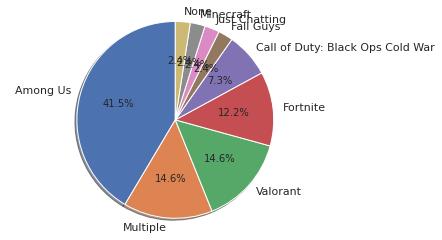

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(mythvid_pie.video_id, labels=mythvid_pie.game, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

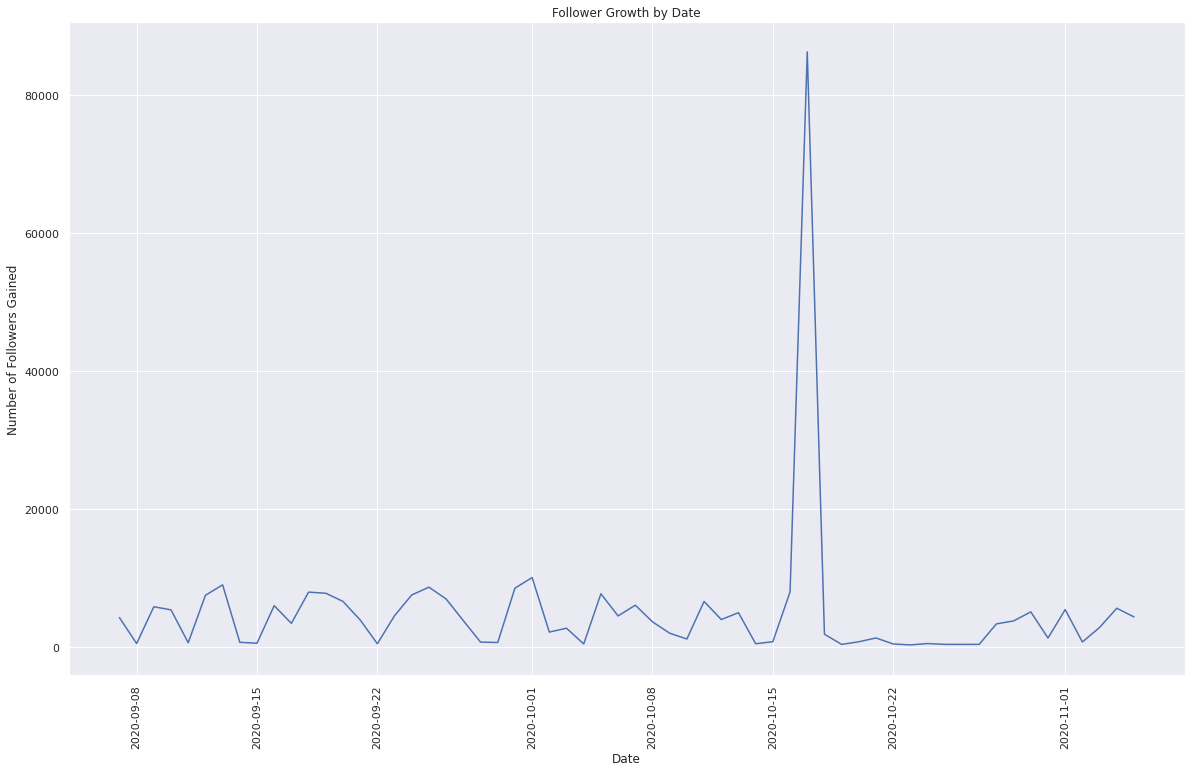

Notice the outlier in growth around 10/17. Check the video, duration, and views to see why this is the case. Other than that one date, it's rather consistent.


In [ ]:
followers_by_date(mythFollowers)
print("Notice the outlier in growth around 10/17. Check the video, duration, and views to see why this is the case. Other than that one date, it's rather consistent.")

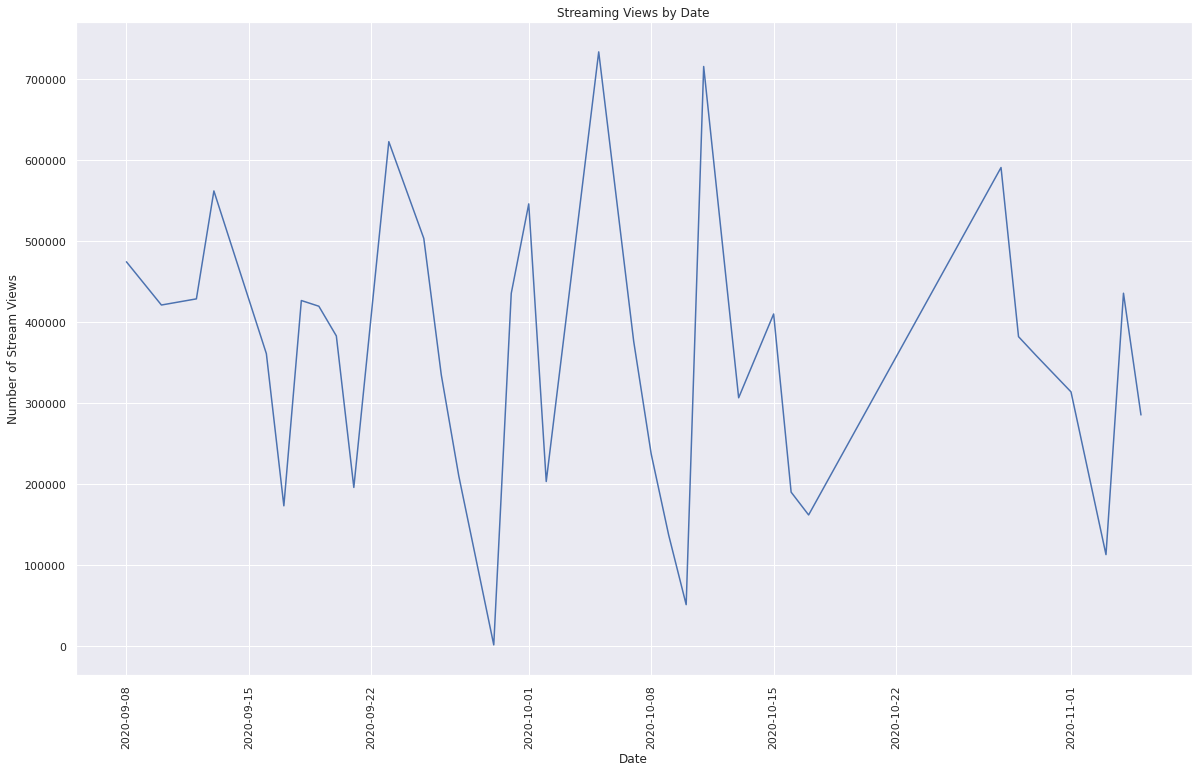

In [ ]:
views_by_date(mythVideos)

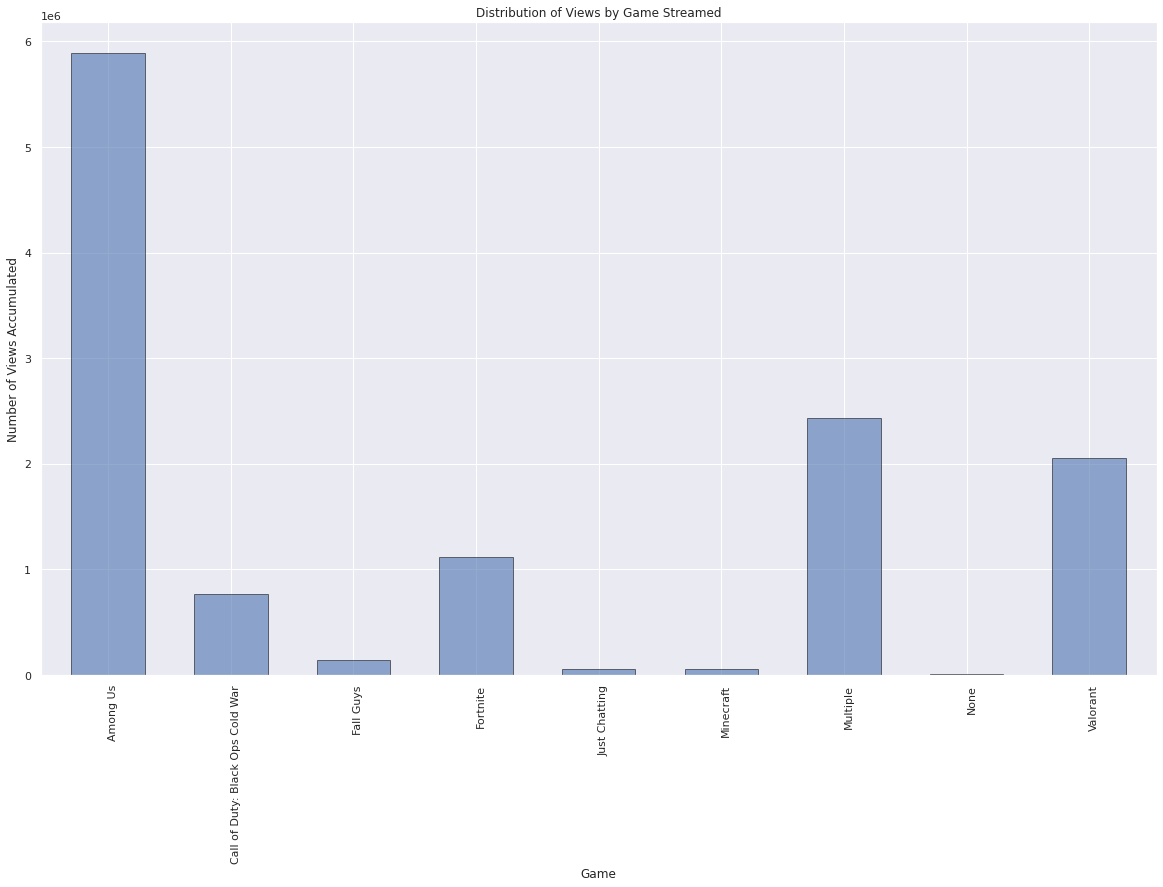

Myth's view count is significantly higher when streaming Among Us


In [ ]:
view_dist_by_game(mythVideos)
print("Myth's view count is significantly higher when streaming Among Us")

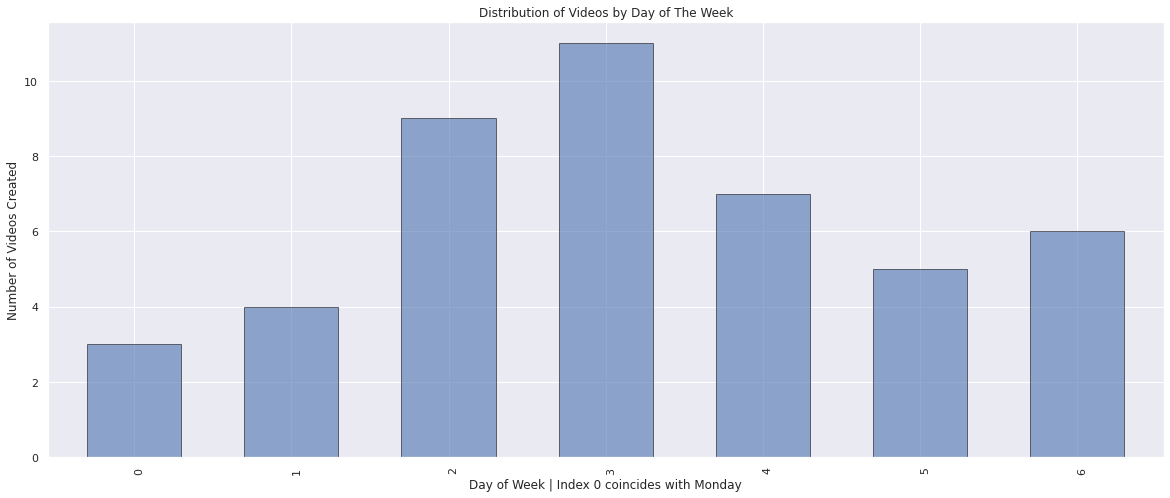

Myth seems to produce more streams in the middle of the week as opposed to the beginning and end of them


In [ ]:
video_dist_by_dow(mythVideos)
print("Myth seems to produce more streams in the middle of the week as opposed to the beginning and end of them")

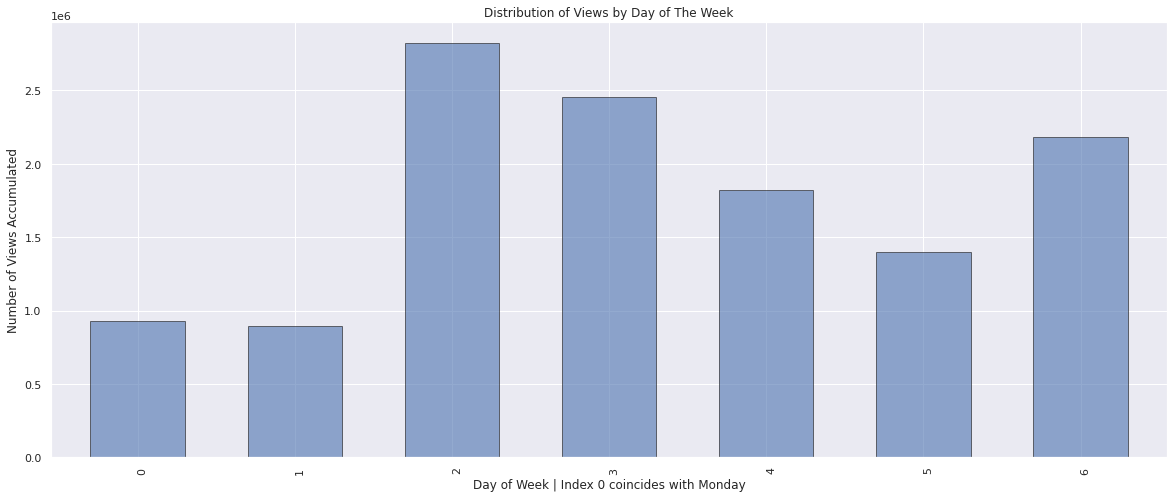

Over the past two months it looks like the best time to stream is on Wednesday, Thursday, and Sunday while the worst time to stream is on Monday and Tuesday


In [ ]:
view_dist_by_day(mythVideos)
print("Over the past two months it looks like the best time to stream is on Wednesday, Thursday, and Sunday while the worst time to stream is on Monday and Tuesday")

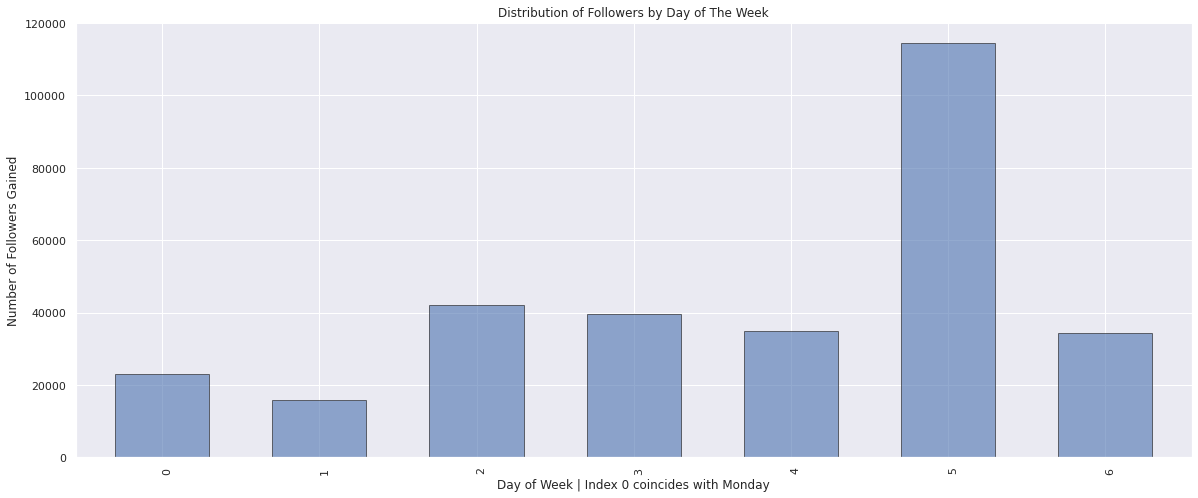

Note the influx of followers on Saturdays. This is largely in part due to the huge outlier from the 17th.


In [ ]:
follower_dist_by_day(mythFollowers)
print("Note the influx of followers on Saturdays. This is largely in part due to the huge outlier from the 17th.")

Note: scope begins on week 37 - 09/07/2020


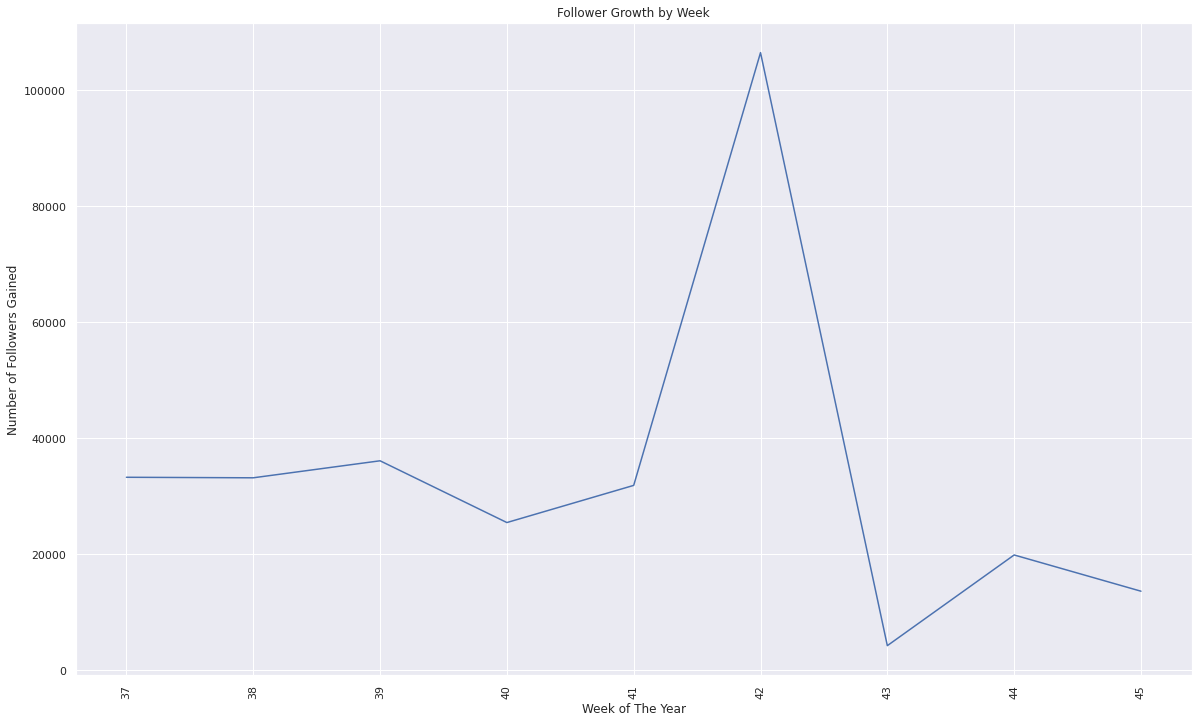

In [ ]:
followers_by_week(mythFollowers)

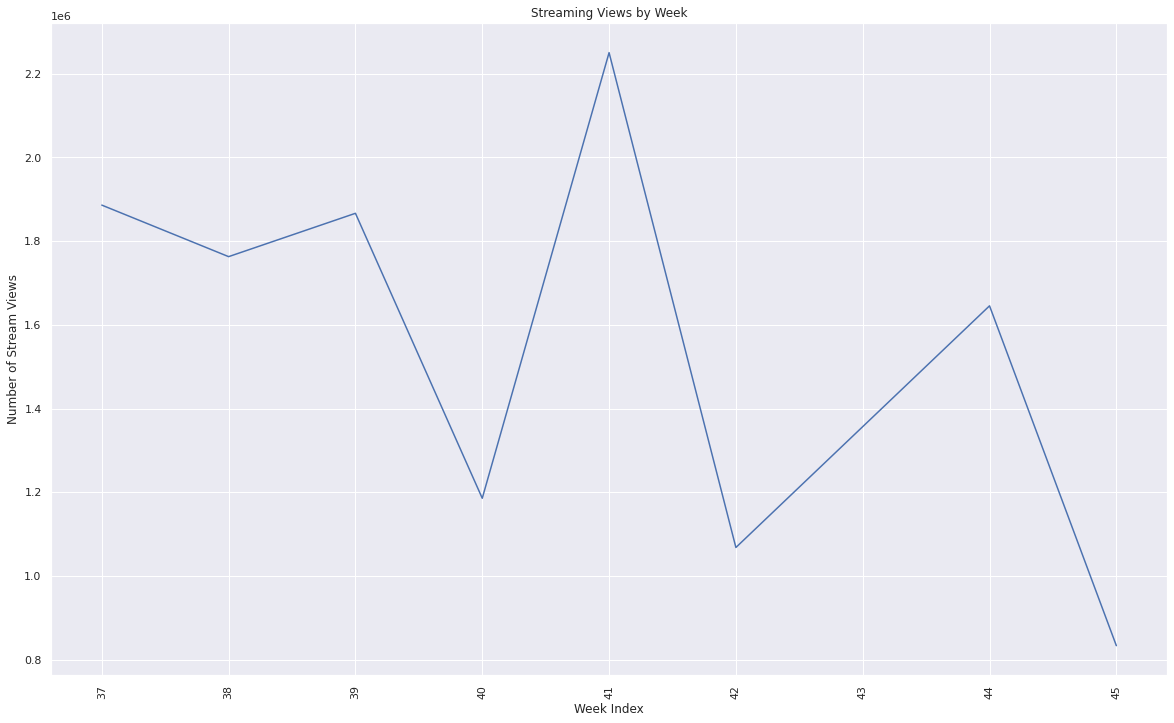

In [ ]:
views_by_week(mythVideos)

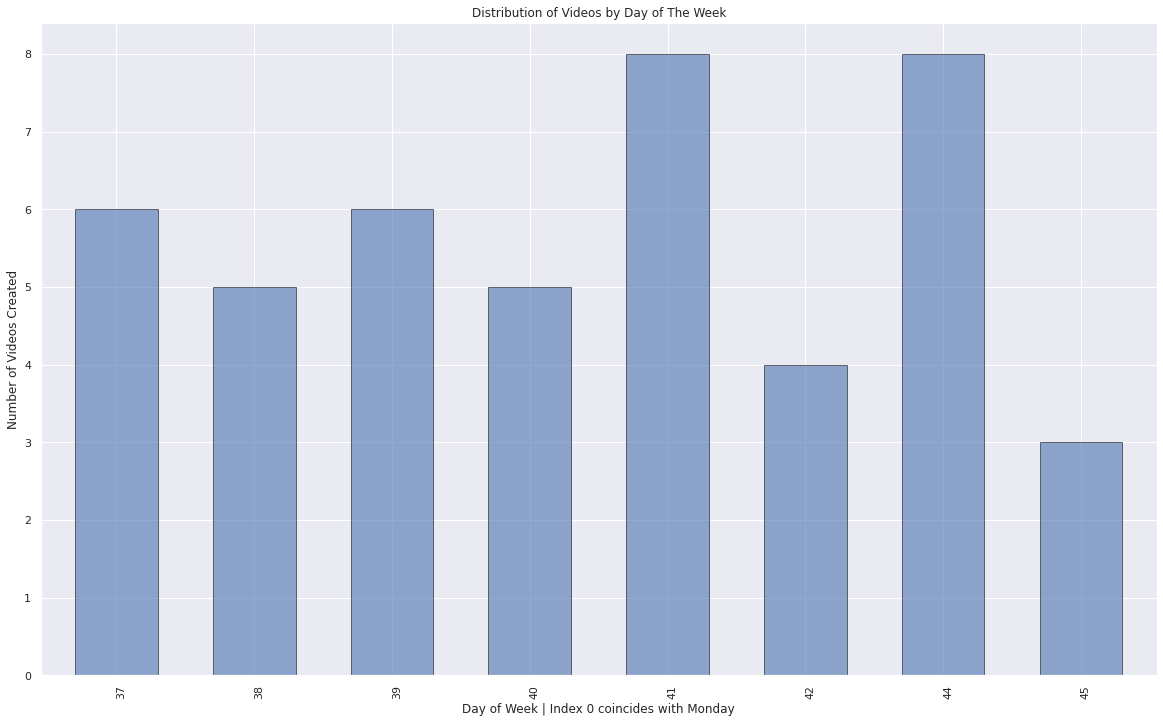

In [ ]:
video_dist_by_week(mythVideos)

In [ ]:
print("Based on the df below, the dip in week 43 is because Myth did not stream anything during that time.")

Based on the df below, the dip in week 43 is because Myth did not stream anything during that time.


In [ ]:
mythVideos[['title','url','week','date','view_count','duration_formatted']].sort_values(by='week', ascending= False)[:12]
#Checking title for any indication as to what he was playing on the 17th. went to the URL and it showed he was playing COD CW.

title  ... duration_formatted
5      GENG VS EQUINOX WATCH PARTY [GAME 3] - !socials  ...    0 days 07:13:49
25   MYTHICAL WANTS TO FEAST ON THEIR SOULS - !socials  ...    0 days 02:23:10
10     VALORANT GAMING ON GODLIEST KEYBINDS - !socials  ...    0 days 08:22:29
63   Highlight: TSM vs 100T COACH MYTHICAL SPECIAL ...  ...    0 days 01:38:24
74                                     Hiya - !socials  ...    0 days 06:17:04
66       TSM vs 100T COACH MYTHICAL SPECIAL - !socials  ...    0 days 05:12:48
67       TSM vs 100T COACH MYTHICAL SPECIAL - !socials  ...    0 days 00:00:54
57          GENG VS C9 WATCH PARTY - !bracket !socials  ...    0 days 05:15:17
54   Highlight: GENG VS C9 WATCH PARTY - !bracket !...  ...    0 days 02:50:52
50         TSM VS GENG WATCH PARTY - !bracket !socials  ...    0 days 05:09:00
40                     CRACKIN ALL DA CASES - !socials  ...    0 days 06:10:01
154           ✔️ DROPS ✔️- FRAG FRAG FRAGIN - !socials  ...    0 days 06:00:50

[12 rows x 6 columns]

In [ ]:
#Reference:https://ag.hyperxgaming.com/article/10866/open-beta-for-call-of-duty-black-ops-cold-war-begins-this-october#:~:text=The%20beta%20opens%20for%20all,October%2019%20will%20include%20crossplay.
#The beta opens for all platforms on October 17th, where players can experience Call of Duty: Black Ops Cold War 
#before launch on November 13th.”

#View Count was sub par and duration was seemingly average so I can assume that the spike in follower counts for that day
#Is because of people interested in watching Myth play the new COD in the future.


In [ ]:
print("Over the last 2 months, Myth's average Monday follower count increased on average by:", (23018/len(mythFollowers))*100)
print("Over the last 2 months, Myth's average Tuesday follower count increased on average by:", (15899/len(mythFollowers))*100)
print("Over the last 2 months, Myth's average Wednesday follower count increased on average by:", (41978/len(mythFollowers))*100)
print("Over the last 2 months, Myth's average Thursday follower count increased on average by:", (39691/len(mythFollowers))*100)
print("Over the last 2 months, Myth's average Friday follower count increased on average by:", (35029/len(mythFollowers))*100)
print("Over the last 2 months, Myth's average Saturday follower count increased on average by:", (114445/len(mythFollowers))*100)
print("Over the last 2 months, Myth's average Sunday follower count increased on average by:", (34375/len(mythFollowers))*100)
mythFollowers.groupby('day')[['to_name']].count()

Over the last 2 months, Myth's average Monday follower count increased on average by: 7.558408721493424
Over the last 2 months, Myth's average Tuesday follower count increased on average by: 5.220746383831087
Over the last 2 months, Myth's average Wednesday follower count increased on average by: 13.784294087707488
Over the last 2 months, Myth's average Thursday follower count increased on average by: 13.033313083881984
Over the last 2 months, Myth's average Friday follower count increased on average by: 11.50245456187302
Over the last 2 months, Myth's average Saturday follower count increased on average by: 37.58024529200256
Over the last 2 months, Myth's average Sunday follower count increased on average by: 11.287700921076395


to_name
day         
0      23018
1      15899
2      41978
3      39691
4      35029
5     114445
6      34375

In [ ]:
#take followers copy & views copy and merge together by dow/week index then do chart below to look at correlation
mf = mythFollowers.copy()
mf = mf.groupby('date')[['to_name']].count().reset_index()
mf = mf.rename(columns={'to_name':'count_followers'})
mf.head()

date  count_followers
0 2020-09-07             4285
1 2020-09-08              530
2 2020-09-09             5863
3 2020-09-10             5418
4 2020-09-11              646

In [ ]:
mv = mythVideos.copy()
mv = mv.groupby('date')[['view_count']].sum().reset_index()
mv.head()

date  view_count
0 2020-09-08      474406
1 2020-09-10      421027
2 2020-09-12      428623
3 2020-09-13      561959
4 2020-09-16      360936

In [ ]:
mg = mythVideos.copy()
mg = mg.groupby(['date','game'])[['video_id']].count().reset_index()
mg.head()

date           game  video_id
0 2020-09-08       Among Us         1
1 2020-09-10       Among Us         1
2 2020-09-10  Just Chatting         1
3 2020-09-12       Among Us         1
4 2020-09-13       Among Us         1

In [ ]:
mvmf = pd.merge(mf,mv)
mvmf

date  count_followers  view_count
0  2020-09-08              530      474406
1  2020-09-10             5418      421027
2  2020-09-12             7519      428623
3  2020-09-13             9044      561959
4  2020-09-16             6019      360936
5  2020-09-17             3456      172975
6  2020-09-18             7984      426583
7  2020-09-19             7826      419536
8  2020-09-20             6638      382861
9  2020-09-21             3954      195679
10 2020-09-23             4572      622812
11 2020-09-25             8703      503305
12 2020-09-26             6992      334734
13 2020-09-27             3849      209897
14 2020-09-29              681        1184
15 2020-09-30             8562      435461
16 2020-10-01            10095      545965
17 2020-10-02             2194      203030
18 2020-10-05             7745      733723
19 2020-10-07             6093      376092
20 2020-10-08             3681      237075
21 2020-10-09             2028      136838
22 2020-10-10             1191       50884
23 2020-10-11             6632      715682
24 2020-10-13             5006      306446
25 2020-10-15              801      409970
26 2020-10-16             8017      189884
27 2020-10-17            86306      161716
28 2020-10-28             3381      590890
29 2020-10-29             3808      381941
30 2020-10-30             5123      358797
31 2020-11-01             5449      313730
32 2020-11-03             2861      112689
33 2020-11-04             5650      435586
34 2020-11-05             4391      285226

In [ ]:
mfmg = pd.merge(mf,mg)
mfmgmv = pd.merge(mfmg,mv)
mfmgmv['sum_follow_view'] = mfmgmv.apply(lambda x: x['count_followers'] + x['view_count'], axis=1)
mfmgmv.sort_values(by='sum_follow_view', ascending = False)

date  count_followers  ... view_count  sum_follow_view
19 2020-10-05             7745  ...     733723           741468
24 2020-10-11             6632  ...     715682           722314
11 2020-09-23             4572  ...     622812           627384
12 2020-09-23             4572  ...     622812           627384
29 2020-10-28             3381  ...     590890           594271
30 2020-10-28             3381  ...     590890           594271
4  2020-09-13             9044  ...     561959           571003
17 2020-10-01            10095  ...     545965           556060
13 2020-09-25             8703  ...     503305           512008
0  2020-09-08              530  ...     474406           474936
16 2020-09-30             8562  ...     435461           444023
35 2020-11-04             5650  ...     435586           441236
3  2020-09-12             7519  ...     428623           436142
7  2020-09-18             7984  ...     426583           434567
8  2020-09-19             7826  ...     419536           427362
1  2020-09-10             5418  ...     421027           426445
2  2020-09-10             5418  ...     421027           426445
26 2020-10-15              801  ...     409970           410771
9  2020-09-20             6638  ...     382861           389499
31 2020-10-29             3808  ...     381941           385749
20 2020-10-07             6093  ...     376092           382185
5  2020-09-16             6019  ...     360936           366955
32 2020-10-30             5123  ...     358797           363920
14 2020-09-26             6992  ...     334734           341726
33 2020-11-01             5449  ...     313730           319179
25 2020-10-13             5006  ...     306446           311452
36 2020-11-05             4391  ...     285226           289617
28 2020-10-17            86306  ...     161716           248022
21 2020-10-08             3681  ...     237075           240756
15 2020-09-27             3849  ...     209897           213746
18 2020-10-02             2194  ...     203030           205224
10 2020-09-21             3954  ...     195679           199633
27 2020-10-16             8017  ...     189884           197901
6  2020-09-17             3456  ...     172975           176431
22 2020-10-09             2028  ...     136838           138866
34 2020-11-03             2861  ...     112689           115550
23 2020-10-10             1191  ...      50884            52075

[37 rows x 6 columns]

[]

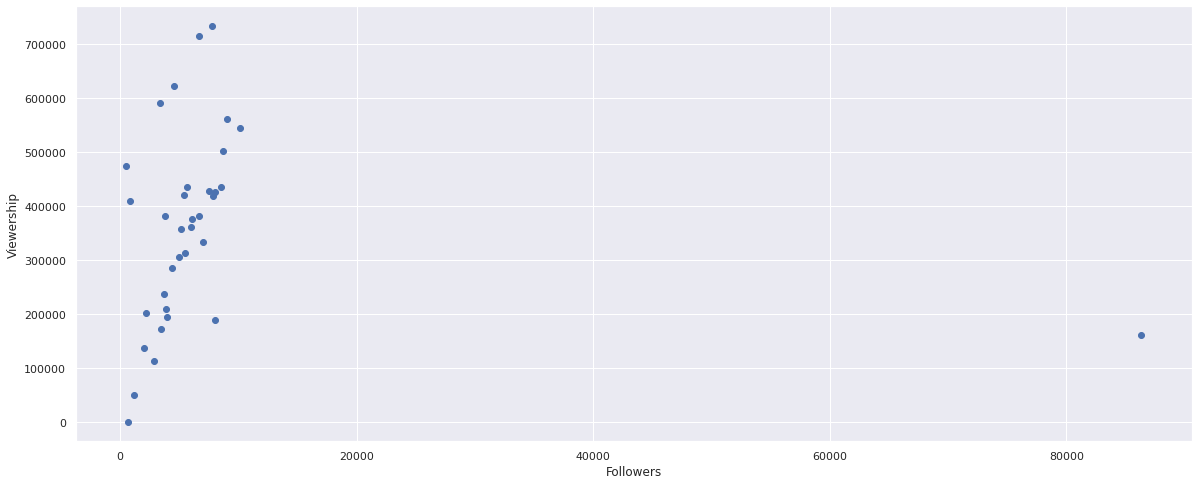

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(data=mvmf, x="count_followers", y="view_count")
plt.xlabel("Followers")
plt.ylabel("Viewership")
plt.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data, kind. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


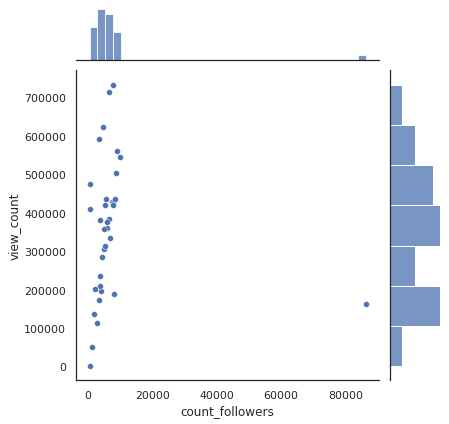

In [ ]:
follower_view_joint_scatter_bydate(mvmf)

# image.pngNinja's Twitch Performance Analysis

**Ninja's Twitch Performance Analysis**

In [ ]:
ninjaUser = twitchUsers.copy() 
ninjaUser['ninja'] = (ninjaUser['display_name'] == 'Ninja')
ninjaUser = ninjaUser[ninjaUser.ninja==True]
ninjaUser

id display_name  ... highlight_videos ninja
1  19571641        Ninja  ...                0  True

[1 rows x 11 columns]

In [ ]:
ninjaVideos = userVideos.copy() 
ninjaVideos['ninja'] = (ninjaVideos['user_name'] == 'Ninja')
ninjaVideos = ninjaVideos[ninjaVideos.ninja==True]
ninjaVideos.head(5)

video_id   user_id user_name  ...  ss  duration_formatted ninja
24  790788404  19571641     Ninja  ...  34     0 days 06:19:34  True
34  789876877  19571641     Ninja  ...  08     0 days 04:16:08  True
46  787713259  19571641     Ninja  ...  23     0 days 10:56:23  True
47  787251138  19571641     Ninja  ...  57     0 days 06:20:57  True
52  786598936  19571641     Ninja  ...  26     0 days 03:54:26  True

[5 rows x 21 columns]

In [ ]:
ninjaFollowers.head()

from_id     from_name     to_id  ...       date day week
0  604118434     itzslam8o  19571641  ... 2020-11-05   3   45
1  599335711    jajaislame  19571641  ... 2020-11-05   3   45
2   94588903  AllahuChrist  19571641  ... 2020-11-05   3   45
3  559742101  jfamania6666  19571641  ... 2020-11-05   3   45
4  603101574   kikelopez13  19571641  ... 2020-11-05   3   45

[5 rows x 8 columns]

In [ ]:
print("Ninja's follower growth percentage over the span of the scope is:", (ninjaUser.gained_followers.sum()/ninjaUser.starting_followers.sum())*100)

Ninja's follower growth percentage over the span of the scope is: 8.312150235007094


In [ ]:
ninjaVideos['upper'] = ninjaVideos['title'].str.isupper() 
ninjaVideos.groupby('upper')[['view_count']].sum().reset_index().sort_values(by='view_count',ascending=False)

upper  view_count
0  False    51658333
1   True     5715993

In [ ]:
ninjaVideos.groupby('upper')[['user_id']].count().reset_index().sort_values(by='user_id',ascending=False)

upper  user_id
0  False       43
1   True        6

In [ ]:
print("the view to video ratio for videos where the title is NOT ENTIRELY upper case is:", 5165833/43)
print("the view to video ratio for videos where the title is ENTIRELY upper case is:",5715993/6)
print(952665.5-120135.6511627907)

the view to video ratio for videos where the title is NOT ENTIRELY upper case is: 120135.6511627907
the view to video ratio for videos where the title is ENTIRELY upper case is: 952665.5
832529.8488372093


In [ ]:
print("Followers breakdown by dow:")
ninjaFollowers.groupby('day')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by dow:


day   to_id
0    0  312279
4    4  200492
5    5  193323
3    3  171315
2    2  143926
6    6  130311
1    1   83909

In [ ]:
print("Followers breakdown by week:")
ninjaFollowers.groupby('week')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by week:


week   to_id
1    38  355678
0    37  328072
2    39  183083
3    40  142083
4    41   72181
7    44   51369
5    42   51082
6    43   35164
8    45   16843

In [ ]:
print("Sum of views across all videos for Ninja:",ninjaVideos.view_count.sum())
print("Video view breakdown by type:")
ninjaVideos.groupby('type')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Sum of views across all videos for Ninja: 57374326
Video view breakdown by type:


type  view_count
0  archive    57374326

In [ ]:
print("Video view breakdown by dow:")
ninjaVideos.groupby('day')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by dow:


day  view_count
4    4    12033442
3    3    10591190
5    5     9358143
0    0     9142755
2    2     8013007
6    6     4200798
1    1     4034991

In [ ]:
print("Video view breakdown by week:")
ninjaVideos.groupby('week')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by week:


week  view_count
1    38    14924574
0    37    12626815
2    39    10258779
3    40     7392236
7    44     3591127
5    42     3483192
4    41     2872343
6    43     1234089
8    45      991171

In [ ]:
print("Average view count per stream", (57374326/len(ninjaVideos)))

Average view count per stream 1170904.612244898


In [ ]:
print("Video breakdown by type:")
ninjaVideos.groupby('type')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by type:


video_id
type             
archive        49

In [ ]:
print("Video breakdown by dow:")
ninjaVideos.groupby('day')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by dow:


video_id
day          
0           9
2           9
3           8
4           7
5           7
1           6
6           3

In [ ]:
print("Video breakdown by week:")
ninjaVideos.groupby('week')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by week:


video_id
week          
38           9
40           8
39           6
44           6
37           5
42           5
41           4
43           4
45           2

In [ ]:
print("Video duration breakdown by type:")
ninjaVideos.groupby('type')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by type:


duration_formatted
type                      
archive   12 days 10:45:44

In [ ]:
print("Video duration breakdown by day:")
ninjaVideos.groupby('day')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by day:


duration_formatted
day                   
4      2 days 08:51:59
5      2 days 01:29:36
3      1 days 21:43:42
2      1 days 20:03:54
0      1 days 19:16:34
1      1 days 10:38:16
6      1 days 00:41:43

In [ ]:
print("Video duration breakdown by week:")
ninjaVideos.groupby('week')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by week:


duration_formatted
week                   
38      2 days 11:09:48
39      2 days 01:23:11
44      1 days 19:11:25
40      1 days 14:25:26
37      1 days 12:37:43
42      1 days 07:43:55
41      0 days 15:50:55
43      0 days 13:47:39
45      0 days 10:35:42

In [ ]:
print("Video breakdown by week:")
ninjaVideos.groupby(['week','game'])[['video_id']].count()


Video breakdown by week:


video_id
week game                   
37   Multiple              2
     None                  1
     Valorant              2
38   Among Us              2
     Fall Guys             1
     Fortnite              3
     Multiple              1
     Valorant              2
39   Among Us              2
     Fortnite              2
     Minecraft             1
     Valorant              1
40   Among Us              1
     Fortnite              3
     Multiple              2
     Rogue Company         2
41   Among Us              1
     Fortnite              1
     Multiple              2
42   Valorant              5
43   Valorant              4
44   Multiple              1
     Valorant              5
45   Valorant              2

In [ ]:
print("Video breakdown by game:")
ninvid_pie = ninjaVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)
ninvid_pie

Video breakdown by game:


game  video_id
7       Valorant        21
2       Fortnite         9
4       Multiple         8
0       Among Us         6
6  Rogue Company         2
1      Fall Guys         1
3      Minecraft         1
5           None         1

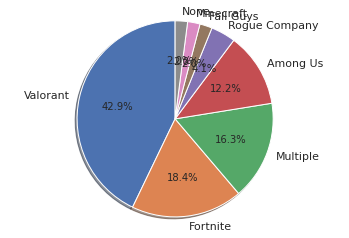

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(ninvid_pie.video_id, labels=ninvid_pie.game, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
print("View breakdown by game:")
ninjaVideos.groupby('game')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

View breakdown by game:


game  view_count
2       Fortnite    15319328
4       Multiple    14952441
7       Valorant    14735870
0       Among Us     7232074
3      Minecraft     2497920
6  Rogue Company     1397466
1      Fall Guys     1087121
5           None      152106

In [ ]:
print("duration breakdown by game:")
ninjaVideos.groupby('game')[['duration_formatted']].sum().reset_index().sort_values(by=['duration_formatted'], ascending = False)

duration breakdown by game:


game duration_formatted
7       Valorant    4 days 15:42:10
2       Fortnite    2 days 17:46:34
4       Multiple    2 days 16:00:51
0       Among Us    1 days 04:02:51
3      Minecraft    0 days 13:32:30
6  Rogue Company    0 days 11:02:18
1      Fall Guys    0 days 04:29:49
5           None    0 days 00:08:41

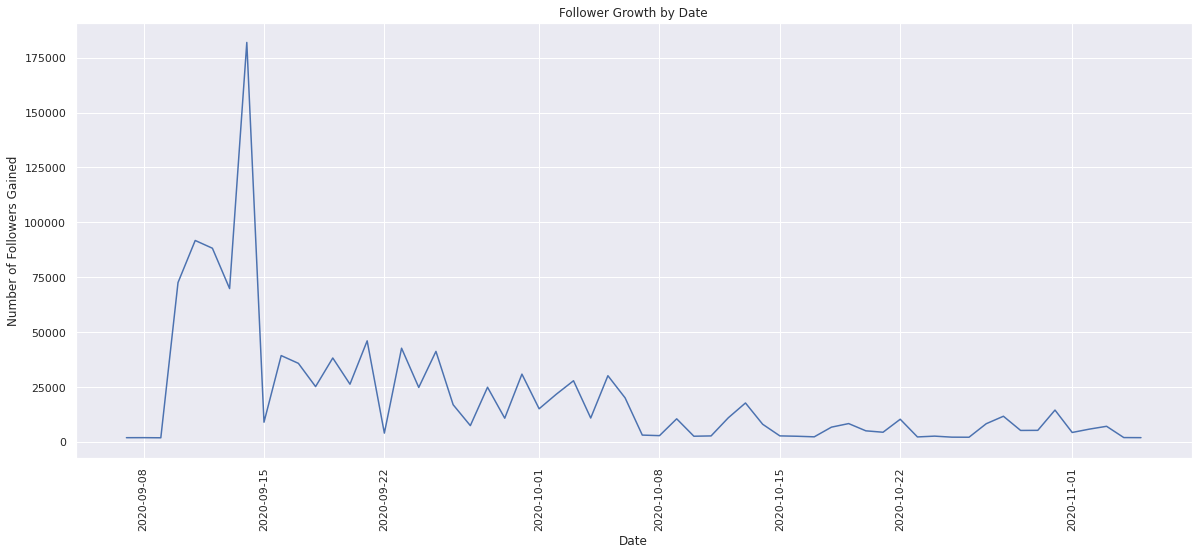

In [ ]:
followers_by_date(ninjaFollowers)

In [ ]:
#Seeing the follower count by day for the outlier above
print("Percentage of biggest follower growth on 9/14 to all:",181930/len(ninjaFollowers)*100)
print("Percentage of biggest follower growth on 9/14 to runner up on 9/11:",(181930/91738)*100)
ninjaFollowers.groupby('date')[['to_id']].count().sort_values(by='to_id', ascending=False)

Percentage of biggest follower growth on 9/14 to all: 14.72455698046627
Percentage of biggest follower growth on 9/14 to runner up on 9/11: 198.3147659639408


to_id
date              
2020-09-14  181930
2020-09-11   91738
2020-09-12   88200
2020-09-10   72570
2020-09-13   69832
2020-09-21   46027
2020-09-23   42674
2020-09-25   41226
2020-09-16   39313
2020-09-19   38215
2020-09-17   35781
2020-09-30   30864
2020-10-05   30247
2020-10-03   27855
2020-09-20   26284
2020-09-18   25184
2020-09-28   24889
2020-09-24   24806
2020-10-02   21721
2020-10-06   20056
2020-10-13   17725
2020-09-26   16934
2020-10-01   15089
2020-10-31   14495
2020-10-28   11682
2020-10-12   10973
2020-10-04   10875
2020-09-29   10790
2020-10-09   10517
2020-10-22   10318
2020-09-15    8971
2020-10-19    8344
2020-10-27    8279
2020-10-14    8039
2020-09-27    7415
2020-11-03    7108
2020-10-18    6720
2020-11-02    5822
2020-10-30    5265
2020-10-29    5224
2020-10-20    5044
2020-10-21    4401
2020-11-01    4297
2020-09-22    4001
2020-10-07    3102
2020-10-08    2850
2020-10-15    2738
2020-10-11    2725
2020-10-10    2684
2020-10-24    2628
2020-10-16    2575
2020-10-17    2312
2020-10-23    2266
2020-10-25    2163
2020-10-26    2127
2020-11-04    1974
2020-11-05    1939
2020-09-08    1935
2020-09-07    1920
2020-09-09    1877

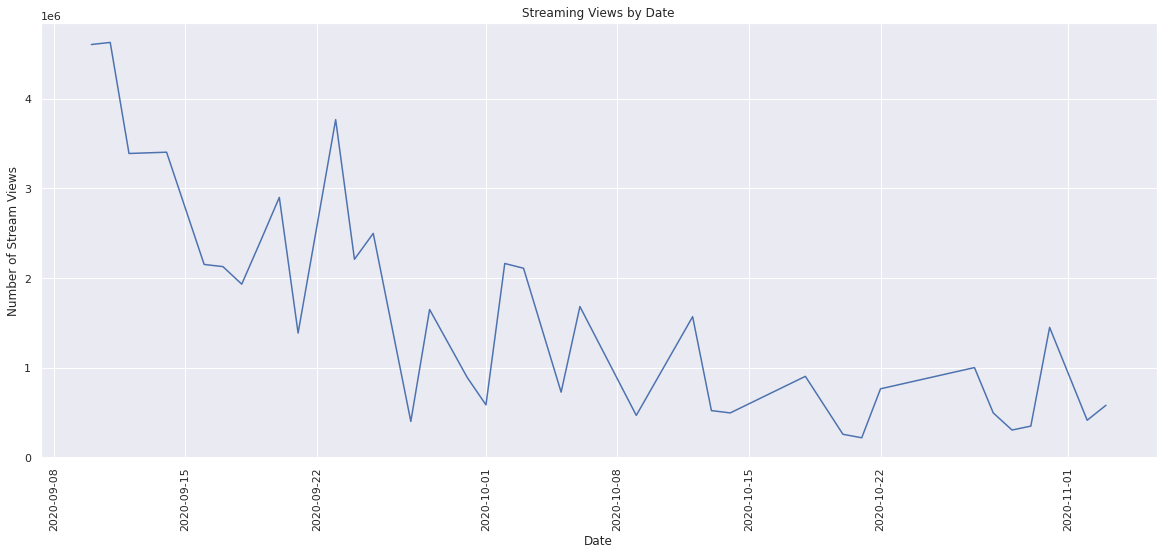

In [ ]:
views_by_date(ninjaVideos)

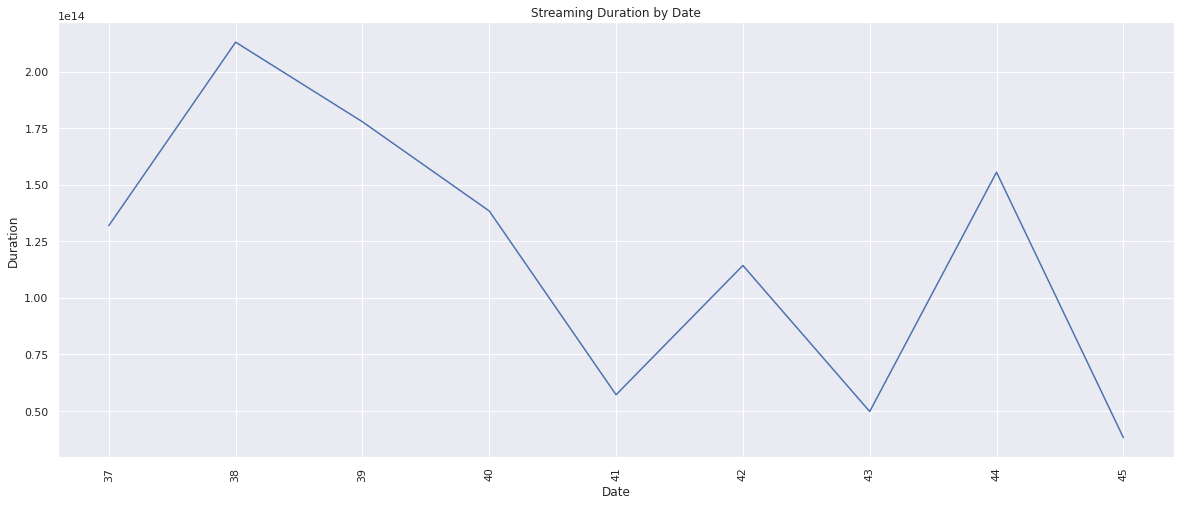

In [ ]:
duration_by_week(ninjaVideos)

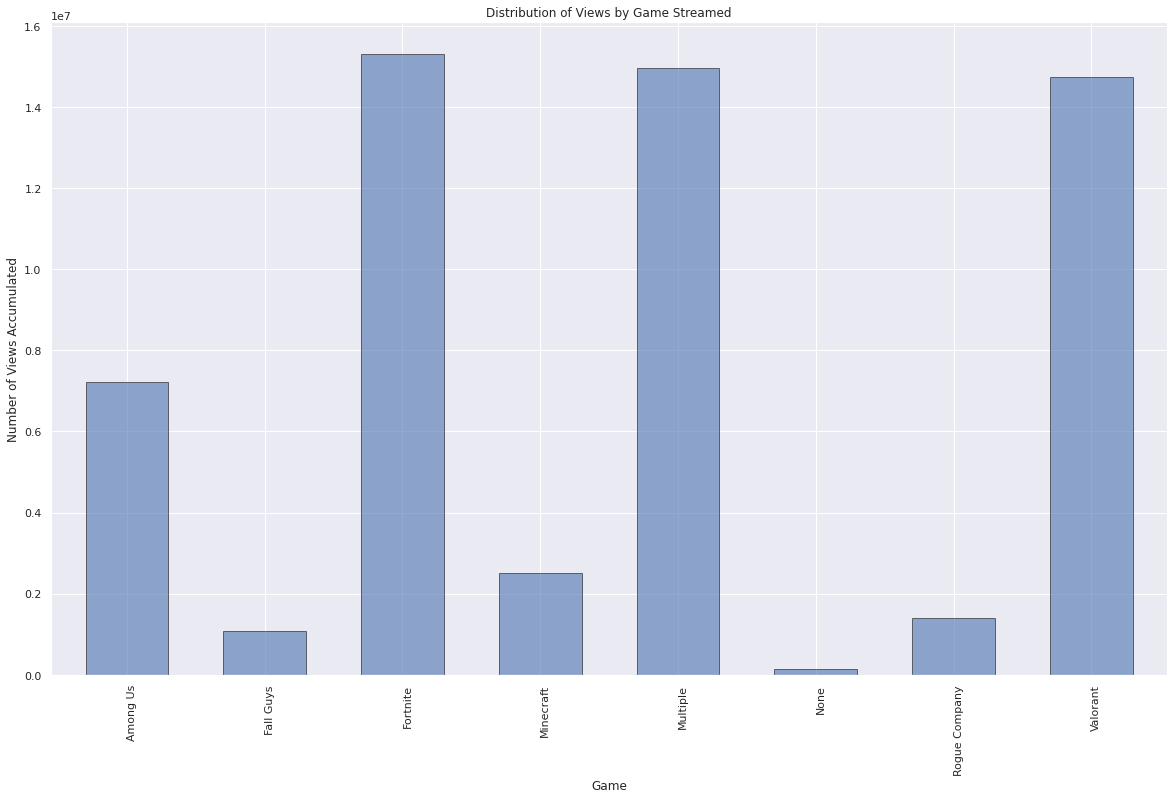

In [ ]:
view_dist_by_game(ninjaVideos)

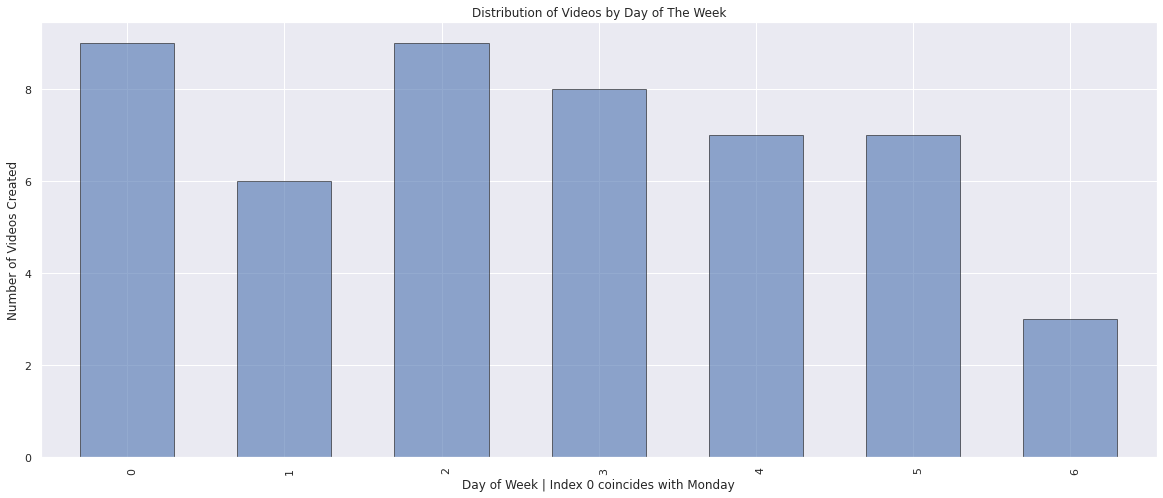

In [ ]:
video_dist_by_dow(ninjaVideos)

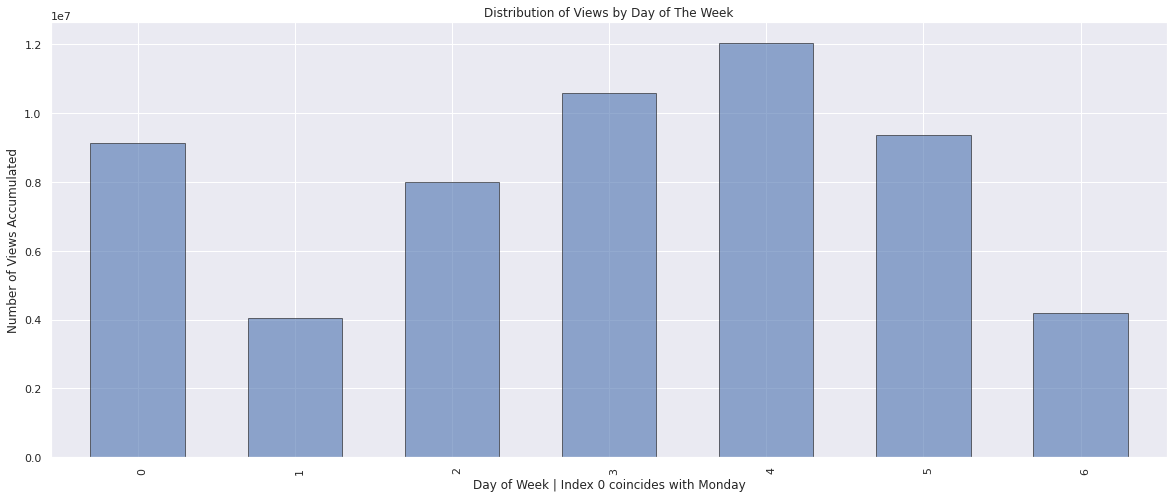

In [ ]:
view_dist_by_day(ninjaVideos)

In [ ]:
ninja_views_pie_week = ninjaVideos.copy()
ninja_views_pie_week = ninja_views_pie_week.groupby('week')[['view_count']].sum().reset_index()

In [ ]:
ninja_follows_pie_week = ninjaFollowers.copy()
ninja_follows_pie_week = ninja_follows_pie_week.groupby('week')[['to_id']].count().reset_index()
ninja_follows_pie_week

week   to_id
0    37  328072
1    38  355678
2    39  183083
3    40  142083
4    41   72181
5    42   51082
6    43   35164
7    44   51369
8    45   16843

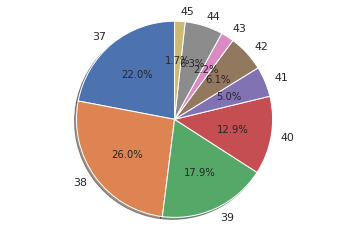

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(ninja_views_pie_week.view_count, labels=ninja_views_pie_week.week, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

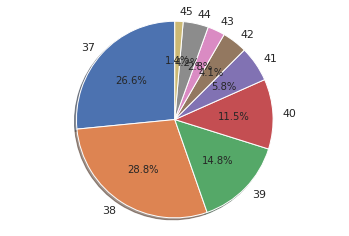

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(ninja_follows_pie_week.to_id, labels=ninja_follows_pie_week.week, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
#Quick investigation into week 38 and why is was as successful as it was.
ninjaVideosweek38 = ninjaVideos.copy() 
ninjaVideosweek38['thirtyeight'] = (ninjaVideosweek38['week'] == 38)
ninjaVideosweek38 = ninjaVideosweek38[ninjaVideosweek38.thirtyeight==True]
ninjaVideosweek38

video_id   user_id user_name  ... ninja  upper thirtyeight
411  747170890  19571641     Ninja  ...  True  False        True
424  745961472  19571641     Ninja  ...  True  False        True
434  744807298  19571641     Ninja  ...  True  False        True
448  743804140  19571641     Ninja  ...  True  False        True
459  742961856  19571641     Ninja  ...  True  False        True
463  742402058  19571641     Ninja  ...  True  False        True
475  741122145  19571641     Ninja  ...  True  False        True
478  740702381  19571641     Ninja  ...  True  False        True
479  740494122  19571641     Ninja  ...  True  False        True

[9 rows x 23 columns]

In [ ]:
ninjaVideos.groupby(['week','game'])[['user_name']].count().reset_index()

week           game  user_name
0     37       Multiple          2
1     37           None          1
2     37       Valorant          2
3     38       Among Us          2
4     38      Fall Guys          1
5     38       Fortnite          3
6     38       Multiple          1
7     38       Valorant          2
8     39       Among Us          2
9     39       Fortnite          2
10    39      Minecraft          1
11    39       Valorant          1
12    40       Among Us          1
13    40       Fortnite          3
14    40       Multiple          2
15    40  Rogue Company          2
16    41       Among Us          1
17    41       Fortnite          1
18    41       Multiple          2
19    42       Valorant          5
20    43       Valorant          4
21    44       Multiple          1
22    44       Valorant          5
23    45       Valorant          2

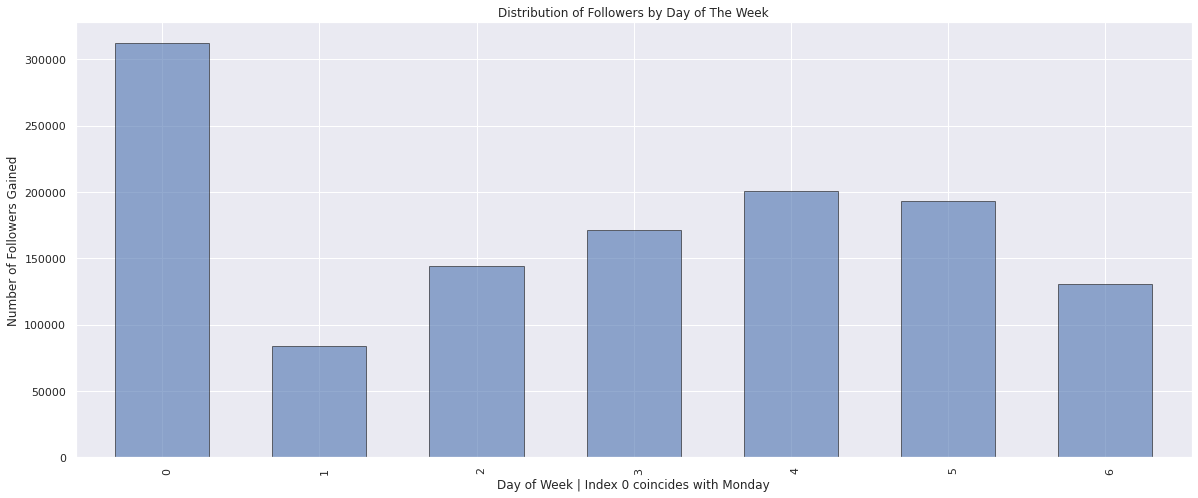

In [ ]:
follower_dist_by_day(ninjaFollowers)

Note: scope begins on week 37 - 09/07/2020


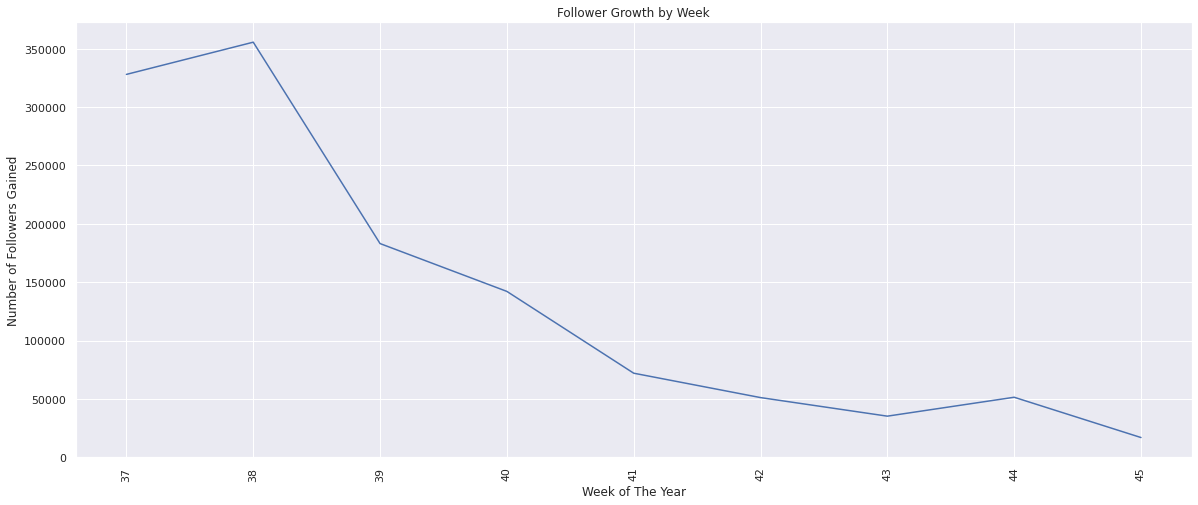

In [ ]:
followers_by_week(ninjaFollowers)

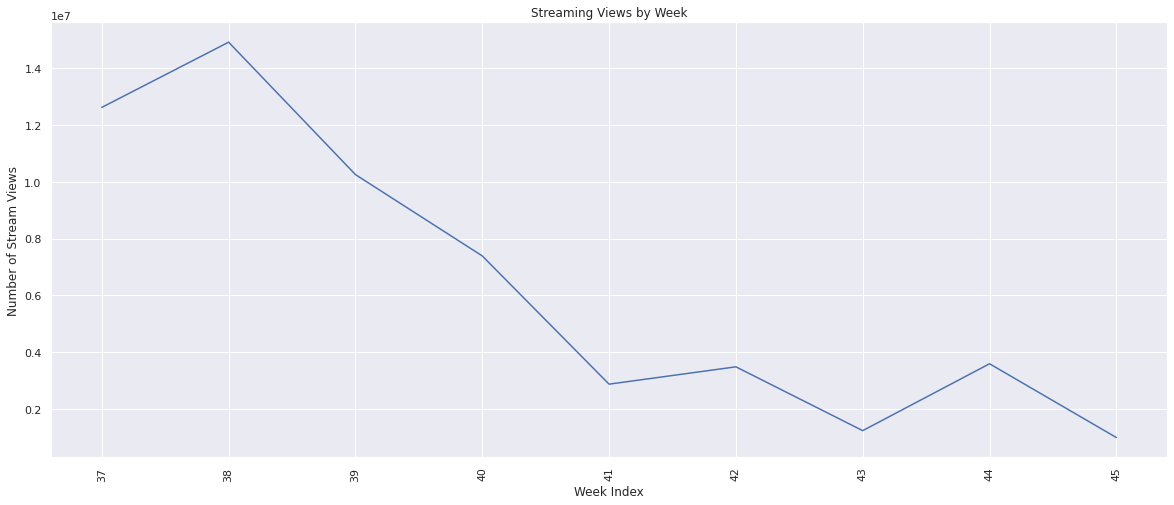

In [ ]:
views_by_week(ninjaVideos)

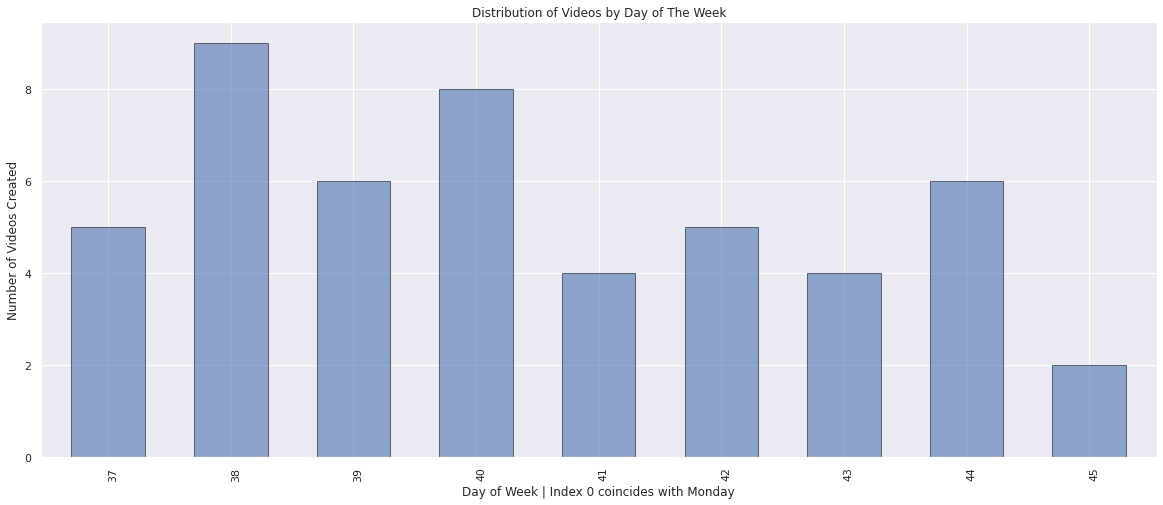

In [ ]:
video_dist_by_week(ninjaVideos)

In [ ]:
print("Over the last 2 months, Ninja's average Monday follower count increased on average by:", (312179/len(ninjaFollowers))*100)
print("Over the last 2 months, Ninja's average Tuesday follower count increased on average by:", (83909/len(ninjaFollowers))*100)
print("Over the last 2 months, Ninja's average Wednesday follower count increased on average by:", (143926/len(ninjaFollowers))*100)
print("Over the last 2 months, Ninja's average Thursday follower count increased on average by:", (171315/len(ninjaFollowers))*100)
print("Over the last 2 months, Ninja's average Friday follower count increased on average by:", (200492/len(ninjaFollowers))*100)
print("Over the last 2 months, Ninja's average Saturday follower count increased on average by:", (193223/len(ninjaFollowers))*100)
print("Over the last 2 months, Ninja's average Sunday follower count increased on average by:", (130311/len(ninjaFollowers))*100)
ninjaFollowers.groupby('day')[['to_name']].count()

Over the last 2 months, Ninja's average Monday follower count increased on average by: 25.266297331968225
Over the last 2 months, Ninja's average Tuesday follower count increased on average by: 6.791199096762184
Over the last 2 months, Ninja's average Wednesday follower count increased on average by: 11.648692288081065
Over the last 2 months, Ninja's average Thursday follower count increased on average by: 13.865428896325943
Over the last 2 months, Ninja's average Friday follower count increased on average by: 16.226877799855124
Over the last 2 months, Ninja's average Saturday follower count increased on average by: 15.638559189999635
Over the last 2 months, Ninja's average Sunday follower count increased on average by: 10.546758339369756


to_name
day         
0     312179
1      83909
2     143926
3     171315
4     200492
5     193223
6     130311

In [ ]:
nf = ninjaFollowers.copy()
nf = nf.groupby('date')[['to_name']].count().reset_index()
nf = nf.rename(columns={'to_name':'count_followers'})
nf.head()

date  count_followers
0 2020-09-07             1920
1 2020-09-08             1935
2 2020-09-09             1877
3 2020-09-10            72570
4 2020-09-11            91738

In [ ]:
nv = ninjaVideos.copy()
nv = nv.groupby('date')[['view_count']].sum().reset_index()
nv.head()

date  view_count
0 2020-09-10     4606854
1 2020-09-11     4629860
2 2020-09-12     3390101
3 2020-09-14     3404447
4 2020-09-16     2151247

In [ ]:
ng = ninjaVideos.copy()
ng = ng.groupby(['date','game'])[['video_id']].count().reset_index()
ng.head()

date      game  video_id
0 2020-09-10  Multiple         1
1 2020-09-10      None         1
2 2020-09-11  Valorant         2
3 2020-09-12  Multiple         1
4 2020-09-14  Among Us         1

In [ ]:
nvnf = pd.merge(nf,nv)
nvnf

date  count_followers  view_count
0  2020-09-10            72570     4606854
1  2020-09-11            91738     4629860
2  2020-09-12            88200     3390101
3  2020-09-14           181930     3404447
4  2020-09-16            39313     2151247
5  2020-09-17            35781     2127017
6  2020-09-18            25184     1931204
7  2020-09-19            38215     2410616
8  2020-09-20            26284     2900043
9  2020-09-21            46027     1385187
10 2020-09-23            42674     3767993
11 2020-09-24            24806     2208956
12 2020-09-25            41226     2497920
13 2020-09-27             7415      398723
14 2020-09-28            24889     1648018
15 2020-09-30            30864      890345
16 2020-10-01            15089      583038
17 2020-10-02            21721     2161964
18 2020-10-03            27855     2108871
19 2020-10-05            30147      725167
20 2020-10-06            20056     1681137
21 2020-10-09            10517      466039
22 2020-10-12            10973     1567973
23 2020-10-13            17725      519618
24 2020-10-14             8039      493569
25 2020-10-18             6720      902032
26 2020-10-20             5044      255164
27 2020-10-21             4401      216040
28 2020-10-22            10318      762885
29 2020-10-27             8279      999864
30 2020-10-28            11682      493813
31 2020-10-29             5224      302440
32 2020-10-30             5265      346455
33 2020-10-31            14495     1448555
34 2020-11-02             5822      411963
35 2020-11-03             7108      579208

In [ ]:
nfng = pd.merge(nf,ng)
nfngnv = pd.merge(nfng,nv)
nfngnv['sum_follow_view'] = nfngnv.apply(lambda x: x['count_followers'] + x['view_count'], axis=1)
nfngnv.sort_values(by='sum_follow_view', ascending = False)

date  count_followers  ... view_count  sum_follow_view
2  2020-09-11            91738  ...    4629860          4721598
0  2020-09-10            72570  ...    4606854          4679424
1  2020-09-10            72570  ...    4606854          4679424
14 2020-09-23            42674  ...    3767993          3810667
13 2020-09-23            42674  ...    3767993          3810667
4  2020-09-14           181930  ...    3404447          3586377
5  2020-09-14           181930  ...    3404447          3586377
3  2020-09-12            88200  ...    3390101          3478301
11 2020-09-20            26284  ...    2900043          2926327
16 2020-09-25            41226  ...    2497920          2539146
10 2020-09-19            38215  ...    2410616          2448831
15 2020-09-24            24806  ...    2208956          2233762
6  2020-09-16            39313  ...    2151247          2190560
7  2020-09-16            39313  ...    2151247          2190560
22 2020-10-02            21721  ...    2161964          2183685
8  2020-09-17            35781  ...    2127017          2162798
23 2020-10-03            27855  ...    2108871          2136726
24 2020-10-03            27855  ...    2108871          2136726
9  2020-09-18            25184  ...    1931204          1956388
26 2020-10-06            20056  ...    1681137          1701193
27 2020-10-06            20056  ...    1681137          1701193
18 2020-09-28            24889  ...    1648018          1672907
19 2020-09-28            24889  ...    1648018          1672907
29 2020-10-12            10973  ...    1567973          1578946
41 2020-10-31            14495  ...    1448555          1463050
40 2020-10-31            14495  ...    1448555          1463050
12 2020-09-21            46027  ...    1385187          1431214
36 2020-10-27             8279  ...     999864          1008143
20 2020-09-30            30864  ...     890345           921209
32 2020-10-18             6720  ...     902032           908752
35 2020-10-22            10318  ...     762885           773203
25 2020-10-05            30147  ...     725167           755314
21 2020-10-01            15089  ...     583038           598127
43 2020-11-03             7108  ...     579208           586316
30 2020-10-13            17725  ...     519618           537343
37 2020-10-28            11682  ...     493813           505495
31 2020-10-14             8039  ...     493569           501608
28 2020-10-09            10517  ...     466039           476556
42 2020-11-02             5822  ...     411963           417785
17 2020-09-27             7415  ...     398723           406138
39 2020-10-30             5265  ...     346455           351720
38 2020-10-29             5224  ...     302440           307664
33 2020-10-20             5044  ...     255164           260208
34 2020-10-21             4401  ...     216040           220441

[44 rows x 6 columns]

In [ ]:
ninjaVideos

video_id   user_id user_name  ... duration_formatted  ninja  upper
24   790788404  19571641     Ninja  ...    0 days 06:19:34   True  False
34   789876877  19571641     Ninja  ...    0 days 04:16:08   True  False
46   787713259  19571641     Ninja  ...    0 days 10:56:23   True  False
47   787251138  19571641     Ninja  ...    0 days 06:20:57   True   True
52   786598936  19571641     Ninja  ...    0 days 03:54:26   True  False
60   785616221  19571641     Ninja  ...    0 days 04:12:03   True   True
71   784485886  19571641     Ninja  ...    0 days 05:41:44   True  False
77   783533649  19571641     Ninja  ...    0 days 12:05:52   True  False
112  778348380  19571641     Ninja  ...    0 days 04:46:49   True  False
114  777867596  19571641     Ninja  ...    0 days 03:43:33   True  False
121  777434983  19571641     Ninja  ...    0 days 02:36:43   True  False
131  776459254  19571641     Ninja  ...    0 days 02:40:34   True  False
145  774570654  19571641     Ninja  ...    0 days 09:39:59   True  False
178  770371728  19571641     Ninja  ...    0 days 02:50:31   True  False
182  770219355  19571641     Ninja  ...    0 days 02:42:45   True  False
186  769305202  19571641     Ninja  ...    0 days 04:36:11   True   True
201  768362760  19571641     Ninja  ...    0 days 11:54:29   True  False
218  765328652  19571641     Ninja  ...    0 days 03:10:46   True  False
246  762496839  19571641     Ninja  ...    0 days 03:48:44   True   True
252  762031605  19571641     Ninja  ...    0 days 05:07:21   True  False
255  761604882  19571641     Ninja  ...    0 days 03:44:04   True  False
266  759946150  19571641     Ninja  ...    0 days 06:40:40   True  False
267  759673101  19571641     Ninja  ...    0 days 03:32:35   True  False
269  759548777  19571641     Ninja  ...    0 days 02:06:29   True  False
282  758521595  19571641     Ninja  ...    0 days 10:35:03   True  False
292  757523458  19571641     Ninja  ...    0 days 04:21:38   True  False
310  756199483  19571641     Ninja  ...    0 days 04:23:17   True  False
325  754676504  19571641     Ninja  ...    0 days 04:53:34   True   True
330  754183365  19571641     Ninja  ...    0 days 01:52:10   True  False
336  753807977  19571641     Ninja  ...    0 days 02:33:39   True  False
351  751677625  19571641     Ninja  ...    0 days 13:32:30   True  False
363  750817018  19571641     Ninja  ...    0 days 12:28:24   True  False
377  749763049  19571641     Ninja  ...    0 days 11:34:10   True   True
389  749258429  19571641     Ninja  ...    0 days 05:12:36   True  False
403  747967820  19571641     Ninja  ...    0 days 04:01:52   True  False
411  747170890  19571641     Ninja  ...    0 days 12:28:05   True  False
424  745961472  19571641     Ninja  ...    0 days 08:45:17   True  False
434  744807298  19571641     Ninja  ...    0 days 10:10:45   True  False
448  743804140  19571641     Ninja  ...    0 days 06:09:16   True  False
459  742961856  19571641     Ninja  ...    0 days 04:29:49   True  False
463  742402058  19571641     Ninja  ...    0 days 04:32:19   True  False
475  741122145  19571641     Ninja  ...    0 days 04:34:27   True  False
478  740702381  19571641     Ninja  ...    0 days 00:43:17   True  False
479  740494122  19571641     Ninja  ...    0 days 07:16:33   True  False
487  739404068  19571641     Ninja  ...    0 days 11:07:15   True  False
500  738103227  19571641     Ninja  ...    0 days 15:15:21   True  False
505  737664072  19571641     Ninja  ...    0 days 00:13:08   True  False
513  737151651  19571641     Ninja  ...    0 days 09:53:18   True  False
514  737143551  19571641     Ninja  ...    0 days 00:08:41   True  False

[49 rows x 22 columns]

[]

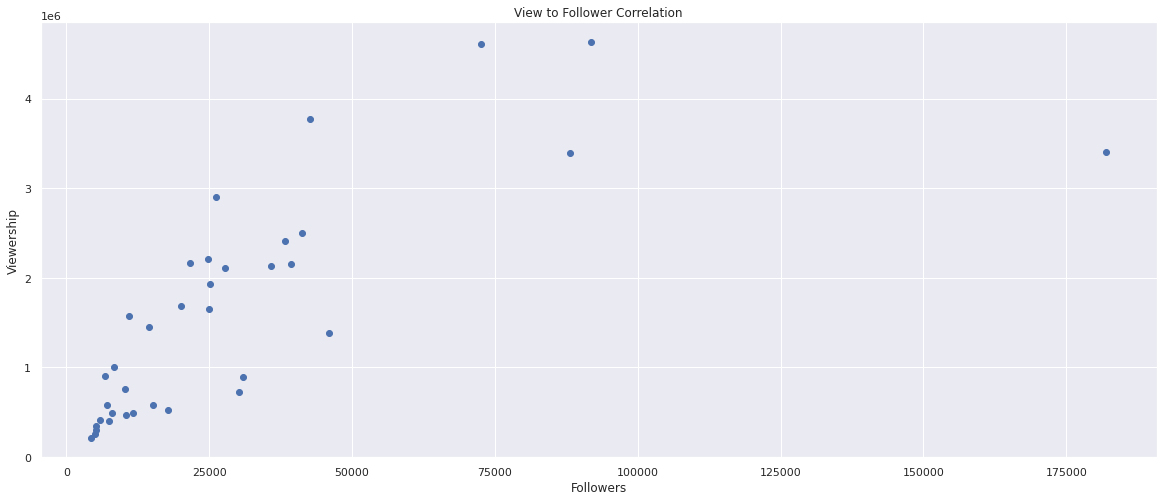

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(data=nvnf, x="count_followers", y="view_count")
plt.xlabel("Followers")
plt.ylabel("Viewership")
plt.title("View to Follower Correlation")
plt.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data, kind. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


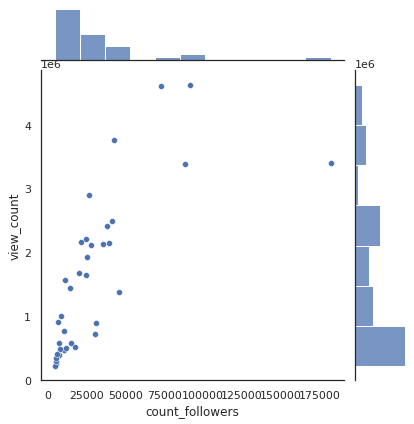

In [ ]:
follower_view_joint_scatter_bydate(nvnf)

# image.pngSypherPK's Twitch Performance Analysis

**SypherPK's Twitch Performance Analysis**

In [ ]:
sypherPKUser = twitchUsers.copy() 
sypherPKUser['sypherPK'] = (sypherPKUser['display_name'] == 'SypherPK')
sypherPKUser = sypherPKUser[sypherPKUser.sypherPK==True]
sypherPKUser

id display_name  ... highlight_videos sypherPK
2  32140000     SypherPK  ...              199     True

[1 rows x 11 columns]

In [ ]:
sypherPKVideos = userVideos.copy() 
sypherPKVideos['sypherPK'] = (sypherPKVideos['user_name'] == 'SypherPK')
sypherPKVideos = sypherPKVideos[sypherPKVideos.sypherPK==True]
sypherPKVideos['arch'] = (sypherPKVideos['type'] == 'archive')
sypherPKVideos.head()

video_id   user_id user_name  ... duration_formatted  sypherPK   arch
2   792935198  32140000  SypherPK  ...    0 days 00:24:49      True  False
11  791793374  32140000  SypherPK  ...    0 days 09:35:56      True   True
12  791362116  32140000  SypherPK  ...    0 days 00:12:37      True  False
13  791295714  32140000  SypherPK  ...    0 days 00:10:24      True  False
15  791142445  32140000  SypherPK  ...    0 days 00:16:06      True  False

[5 rows x 22 columns]

In [ ]:
print("SypherPK's follower growth percentage over the span of the scope is:", (sypherPKUser.gained_followers.sum()/sypherPKUser.starting_followers.sum())*100)

SypherPK's follower growth percentage over the span of the scope is: 5.788531438181523


In [ ]:
sypherPKVideos['upper'] = sypherPKVideos['title'].str.isupper()
sypherPKVideos.groupby('upper')[['view_count']].sum().reset_index().sort_values(by='view_count',ascending=False)

upper  view_count
0  False    10630175
1   True         967

In [ ]:
sypherPKVideos.groupby('upper')[['user_id']].count().reset_index().sort_values(by='user_id',ascending=False)

upper  user_id
0  False      237
1   True       17

In [ ]:
print("the view to video ratio for videos where the title is NOT ENTIRELY upper case is:", 10630175/237)
print("the view to video ratio for videos where the title is ENTIRELY upper case is:", 967/17)

the view to video ratio for videos where the title is NOT ENTIRELY upper case is: 44853.05907172996
the view to video ratio for videos where the title is ENTIRELY upper case is: 56.88235294117647


In [ ]:
#However, Sypher has 0 archive videos all caps if we look at the streams only, meaning only 17 of 
#his 199 or so highlight videos are in caps which makes sense why the ratio is so low
sypherPKVideos_arch = sypherPKVideos.copy()
sypherPKVideos_arch = sypherPKVideos_arch[sypherPKVideos.arch==True]
sypherPKVideos_arch['upper'] = sypherPKVideos['title'].str.isupper()
sypherPKVideos_arch.groupby('upper')[['view_count']].sum().reset_index().sort_values(by='view_count',ascending=False)

upper  view_count
0  False    10605080

In [ ]:
print("Followers breakdown by dow:")
sypherFollowers.groupby('day')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by dow:


day  to_id
2    2  42589
1    1  38170
3    3  34313
6    6  30397
5    5  26226
4    4  21175
0    0  20530

In [ ]:
print("Followers breakdown by week:")
sypherFollowers.groupby('week')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by week:


week  to_id
6    43  33529
2    39  30246
1    38  26823
5    42  24305
3    40  23315
0    37  21955
8    45  20411
7    44  16437
4    41  16379

In [ ]:
print("Sum of views across all videos for SypherPK:",sypherPKVideos.view_count.sum())
sypherPKVideos.groupby('type')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Sum of views across all videos for SypherPK: 10631142


type  view_count
0    archive    10605080
1  highlight       26062

In [ ]:
print("All video views breakdown by dow:")
sypherPKVideos.groupby('day')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

All video views breakdown by dow:


day  view_count
2    2     2222340
1    1     2167014
3    3     1703118
6    6     1464007
5    5     1156566
4    4     1127683
0    0      790414

In [ ]:
print("Streaming view breakdown by dow:")
sypherPKVideos_arch.groupby('day')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Streaming view breakdown by dow:


day  view_count
2    2     2217980
1    1     2163186
3    3     1698271
6    6     1459881
5    5     1152637
4    4     1124551
0    0      788574

In [ ]:
print("Video view breakdown by week:")
sypherPKVideos.groupby('week')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by week:


week  view_count
6    43     1874942
2    39     1606779
1    38     1293366
0    37     1261232
5    42     1134129
8    45     1052405
3    40     1015317
4    41      710831
7    44      682141

In [ ]:
print("Streaming view breakdown by week:")
sypherPKVideos_arch.groupby('week')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Streaming view breakdown by week:


week  view_count
6    43     1871927
2    39     1603398
1    38     1290415
0    37     1257212
5    42     1131306
8    45     1050971
3    40     1012191
4    41      708320
7    44      679340

In [ ]:
print("Average view count per video", ((10605080+26062)/199+55))
print("Average view count per highlight", (26062/199))
print("Average view count per stream", (10605080/55))

Average view count per video 53477.824120603014
Average view count per highlight 130.96482412060303
Average view count per stream 192819.63636363635


In [ ]:
print("Video breakdown by type:")
sypherPKVideos.groupby('type')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by type:


video_id
type               
highlight       199
archive          55

In [ ]:
print("Video breakdown by dow:")
sypherPKVideos.groupby('day')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by dow:


video_id
day          
2          51
3          50
1          45
4          31
5          30
6          30
0          17

In [ ]:
print("Streaming breakdown by dow:")
sypherPKVideos_arch.groupby('day')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Streaming breakdown by dow:


video_id
day          
1          11
2           9
3           9
6           8
0           6
4           6
5           6

In [ ]:
print("Video breakdown by week:")
sypherPKVideos.groupby('week')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by week:


video_id
week          
39          43
37          38
40          36
38          33
43          29
42          26
44          17
45          17
41          15

In [ ]:
print("Streaming breakdown by week:")
sypherPKVideos_arch.groupby('week')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Streaming breakdown by week:


video_id
week          
43           9
37           8
39           7
38           6
42           6
44           6
40           5
41           4
45           4

In [ ]:
print("Video duration breakdown by type:")
sypherPKVideos.groupby('type')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by type:


duration_formatted
type                        
archive     13 days 18:02:45
highlight    3 days 10:07:04

In [ ]:
print("Video duration breakdown by day:")
sypherPKVideos.groupby('day')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by day:


duration_formatted
day                   
1      3 days 10:17:17
2      3 days 04:18:41
3      3 days 00:24:31
6      2 days 08:43:48
4      2 days 01:10:30
5      1 days 19:37:22
0      1 days 07:37:40

In [ ]:
print("Streaming duration breakdown by day:")
sypherPKVideos_arch.groupby('day')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Streaming duration breakdown by day:


duration_formatted
day                   
1      2 days 15:56:14
2      2 days 15:07:49
3      2 days 06:13:53
6      1 days 20:14:56
4      1 days 17:22:15
5      1 days 11:17:15
0      1 days 03:50:23

In [ ]:
print("Video duration breakdown by week:")
sypherPKVideos.groupby('week')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by week:


duration_formatted
week                   
39      2 days 19:59:35
43      2 days 11:07:41
38      2 days 07:39:43
37      2 days 01:17:13
42      1 days 19:16:57
45      1 days 19:00:43
40      1 days 18:40:16
41      1 days 02:11:10
44      1 days 00:56:31

In [ ]:
print("Streaming duration breakdown by week:")
sypherPKVideos_arch.groupby('week')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Streaming duration breakdown by week:


duration_formatted
week                   
43      2 days 04:59:08
39      2 days 00:40:15
38      1 days 22:13:56
37      1 days 16:12:25
42      1 days 10:07:26
40      1 days 09:03:09
45      1 days 08:20:01
44      0 days 21:18:52
41      0 days 21:07:33

In [ ]:
print("Video breakdown by game:")
sypherPKVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)

Video breakdown by game:


game  video_id
2              Fortnite        37
3              Multiple        11
0              Among Us         5
1  Call of Duty Warzone         2

In [ ]:
sypie = sypherPKVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)

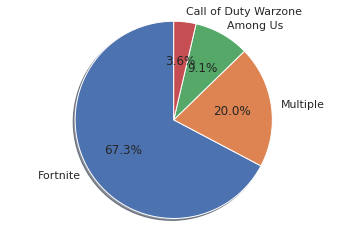

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(sypie.video_id, labels=sypie.game, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
print("Video breakdown by game:")
sypherPKVideos.groupby('game')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video breakdown by game:


game  view_count
2              Fortnite     7369187
3              Multiple     2099755
0              Among Us      960097
1  Call of Duty Warzone      176041

In [ ]:
print("Video breakdown by game:")
sypherPKVideos.groupby('game')[['duration_formatted']].sum().reset_index().sort_values(by=['duration_formatted'], ascending = False)

Video breakdown by game:


game duration_formatted
2              Fortnite    9 days 08:14:16
3              Multiple    2 days 22:28:31
0              Among Us    1 days 01:35:03
1  Call of Duty Warzone    0 days 09:44:55

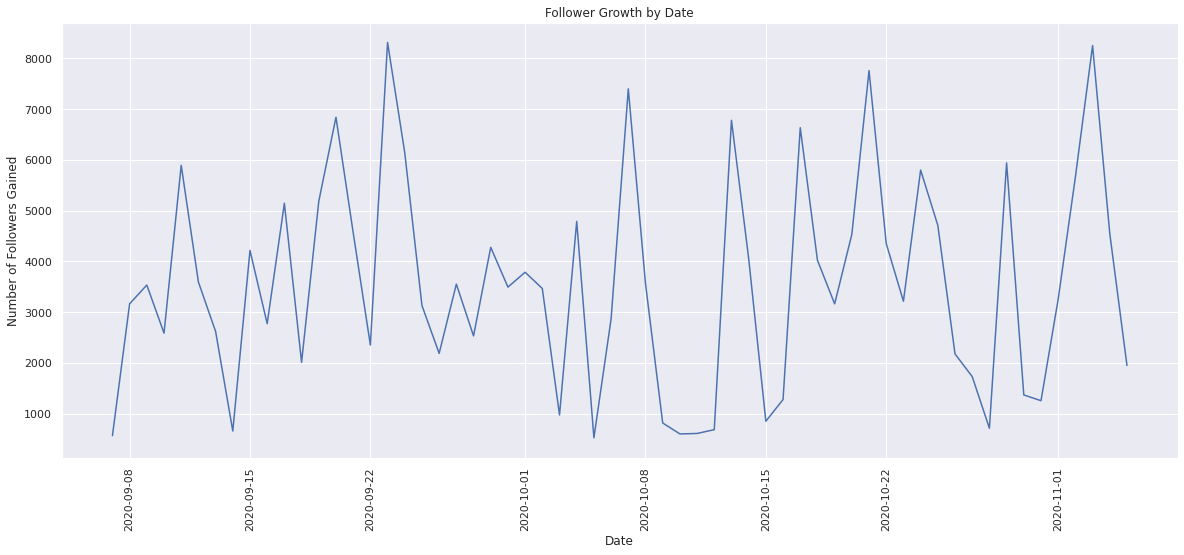

In [ ]:
followers_by_date(sypherFollowers)

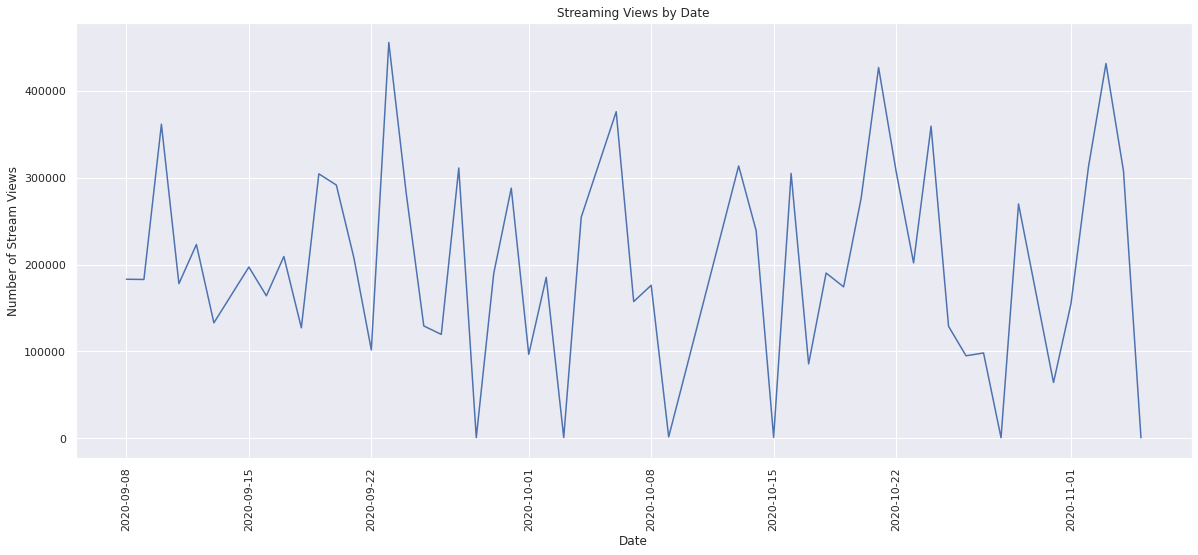

In [ ]:
views_by_date(sypherPKVideos)

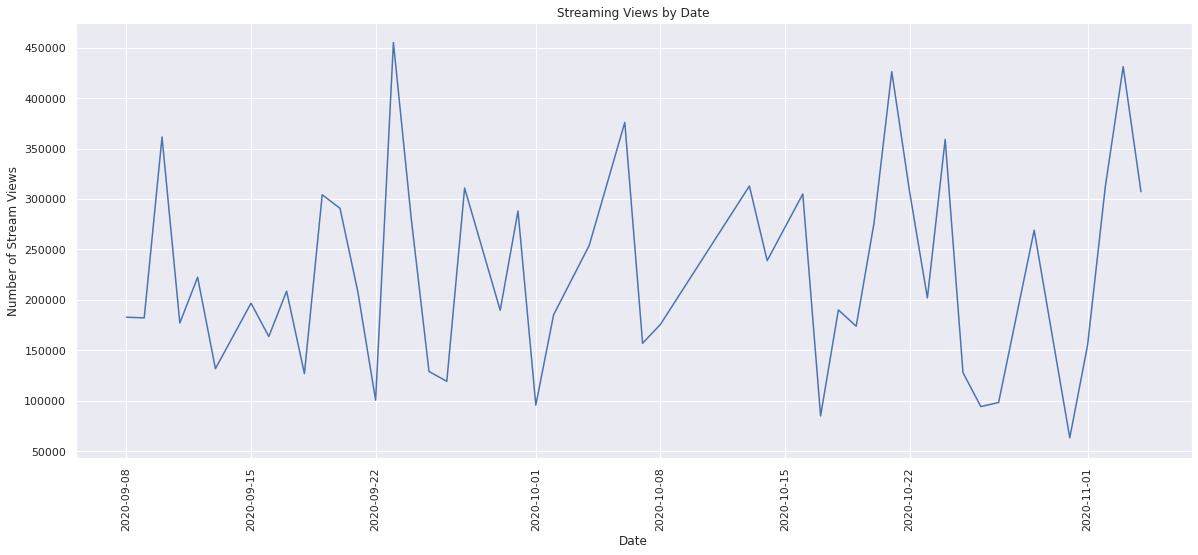

In [ ]:
views_by_date(sypherPKVideos_arch)

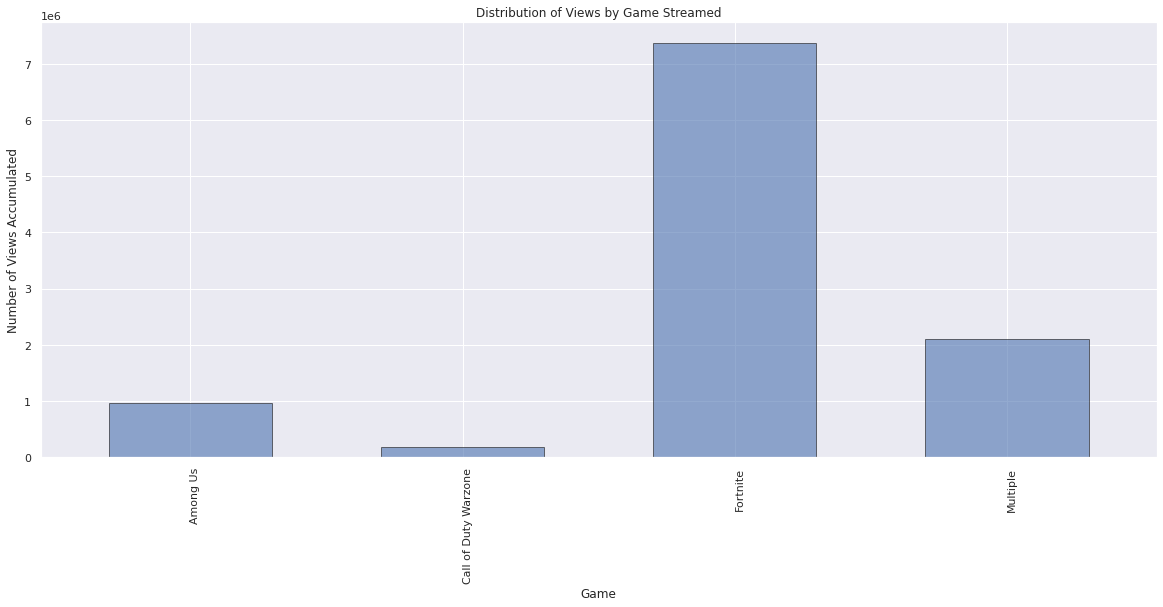

In [ ]:
view_dist_by_game(sypherPKVideos)

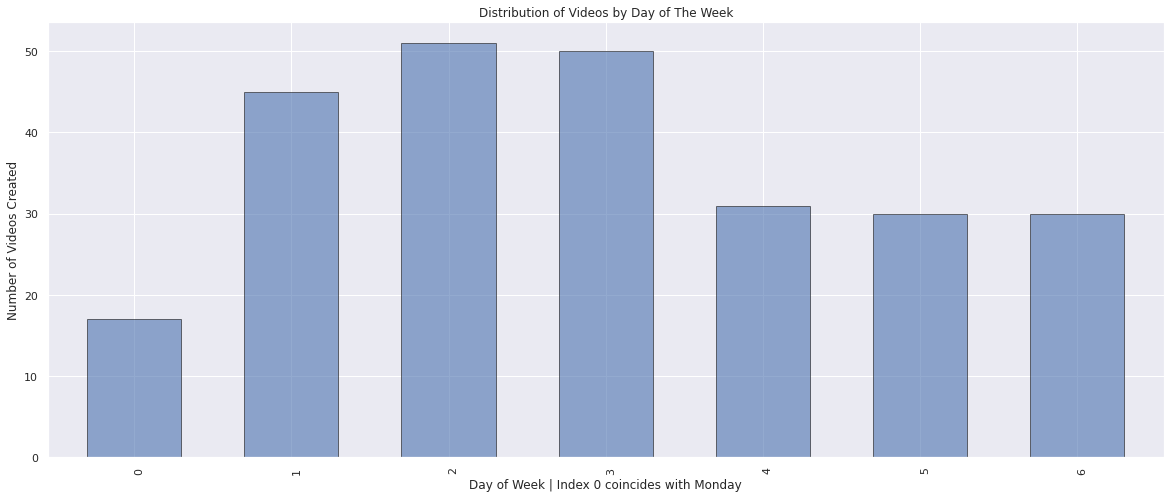

In [ ]:
video_dist_by_dow(sypherPKVideos)

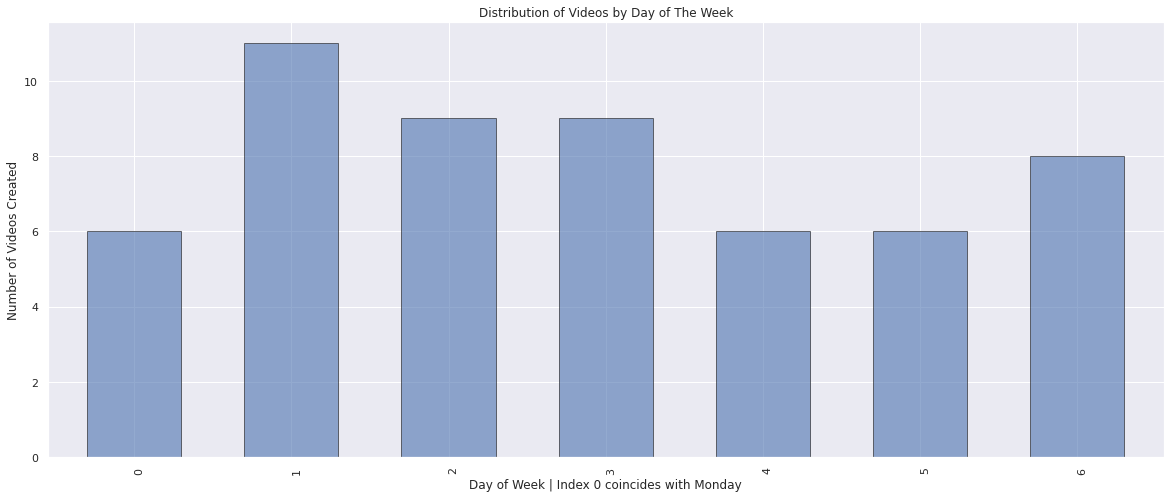

In [ ]:
video_dist_by_dow(sypherPKVideos_arch)

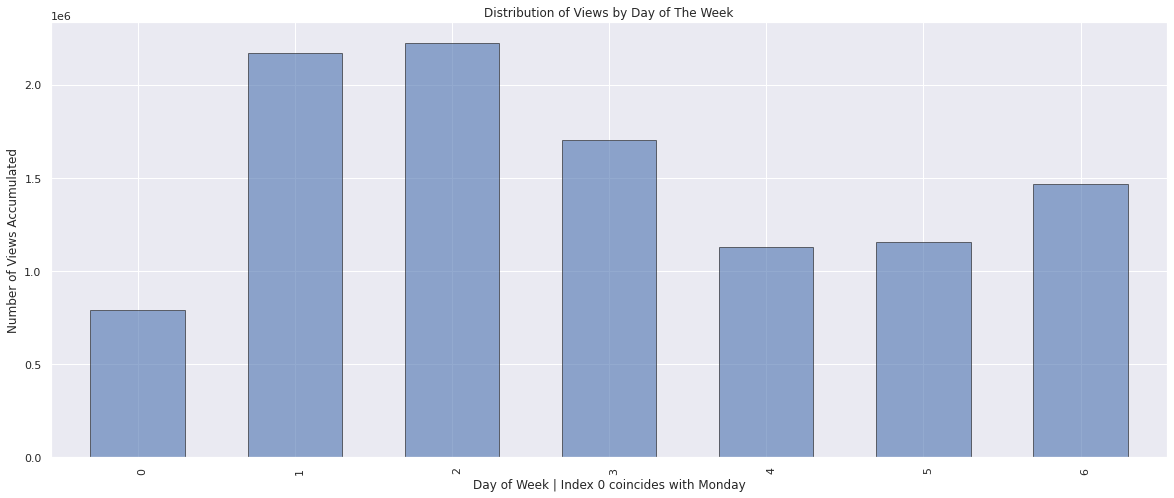

In [ ]:
view_dist_by_day(sypherPKVideos)

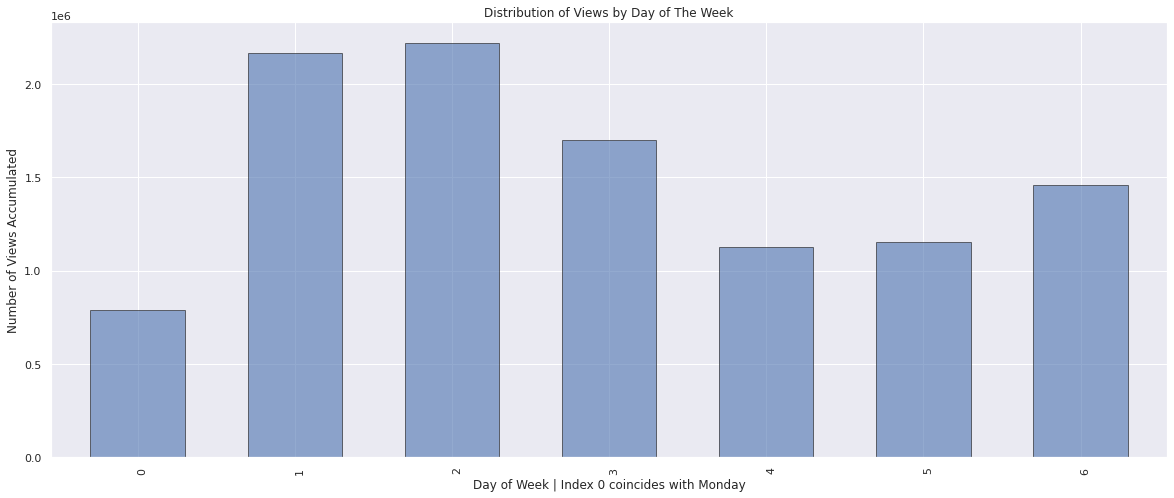

In [ ]:
view_dist_by_day(sypherPKVideos_arch)

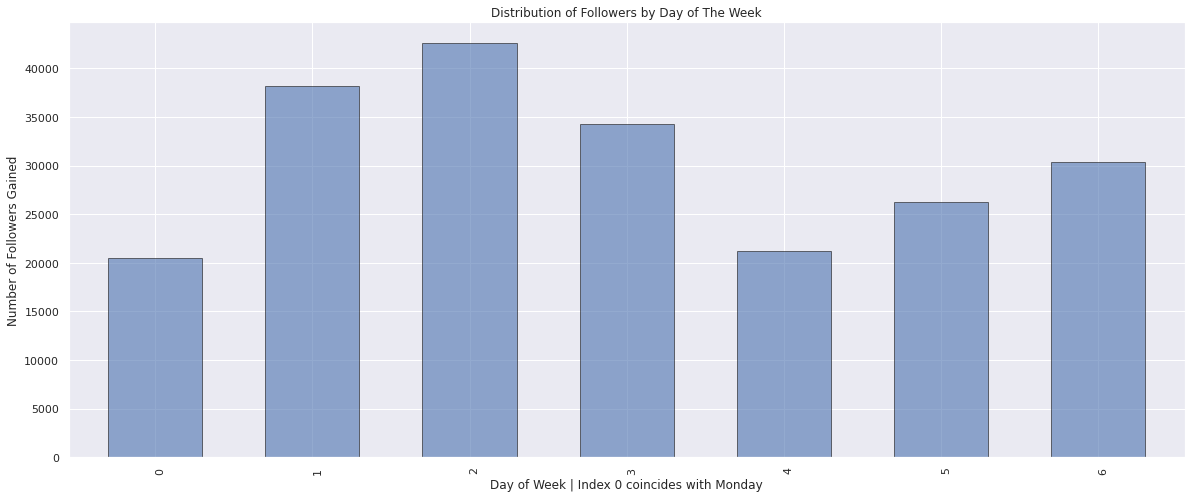

In [ ]:
follower_dist_by_day(sypherFollowers)

Note: scope begins on week 37 - 09/07/2020


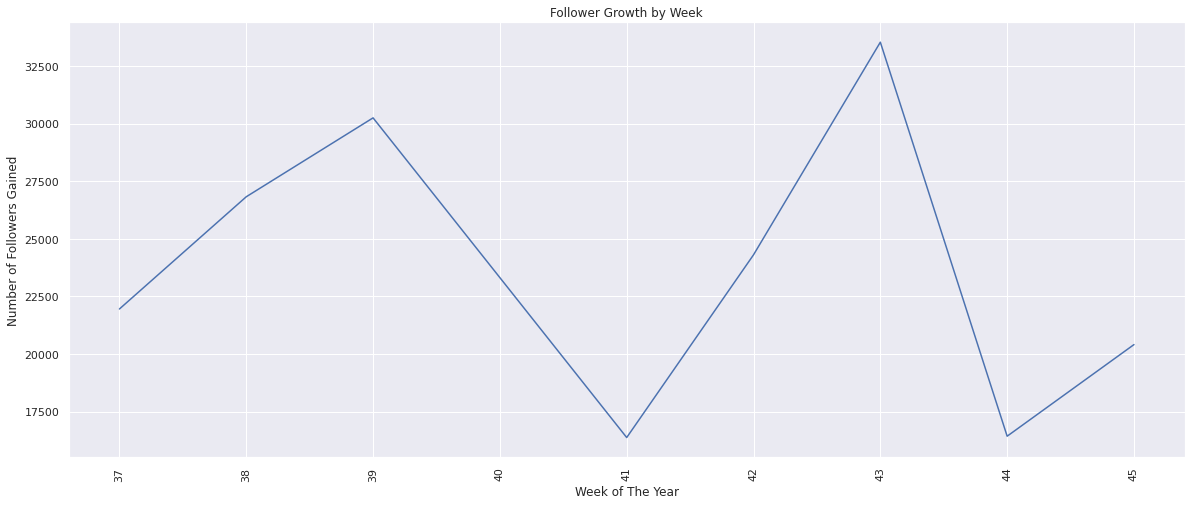

SypherPK wasn't doing anything too different for week 41, didn't stream that weekend but also played Call of Duty and Among Us instead of all Fortnite.


In [ ]:
followers_by_week(sypherFollowers)
print("SypherPK wasn't doing anything too different for week 41, didn't stream that weekend but also played Call of Duty and Among Us instead of all Fortnite.")

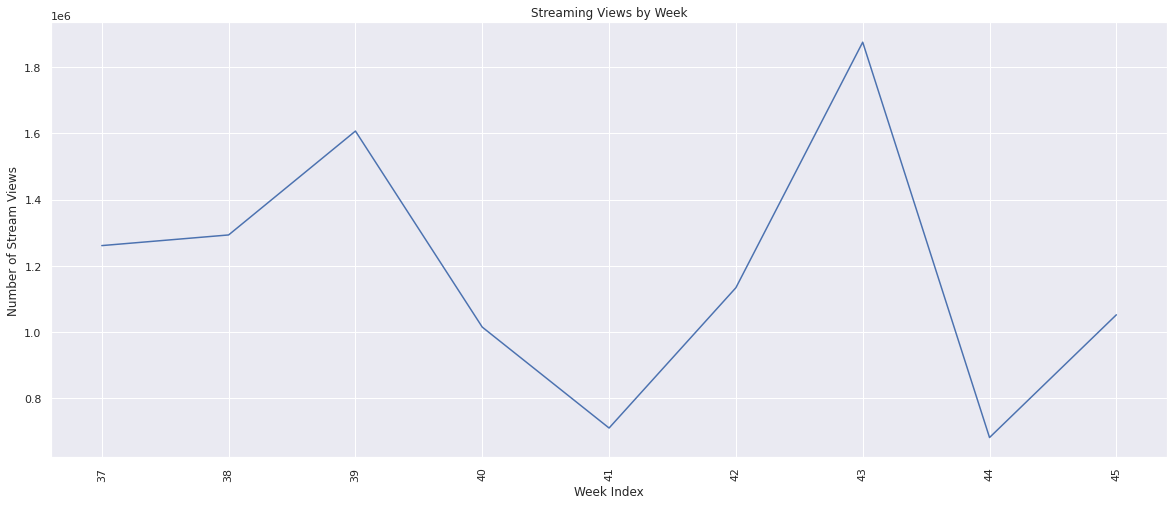

In [ ]:
views_by_week(sypherPKVideos)

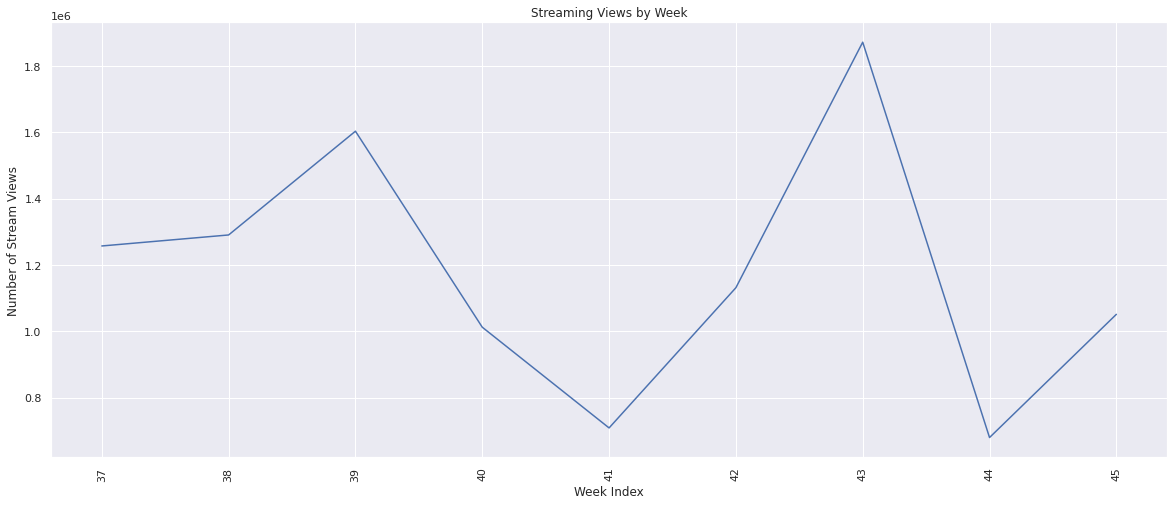

In [ ]:
views_by_week(sypherPKVideos_arch)

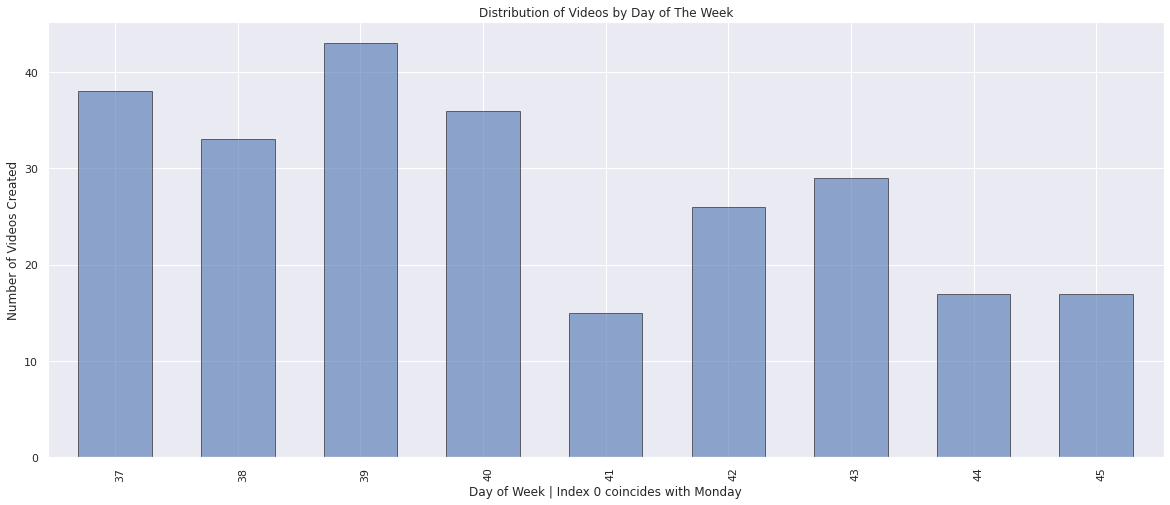

In [ ]:
video_dist_by_week(sypherPKVideos)

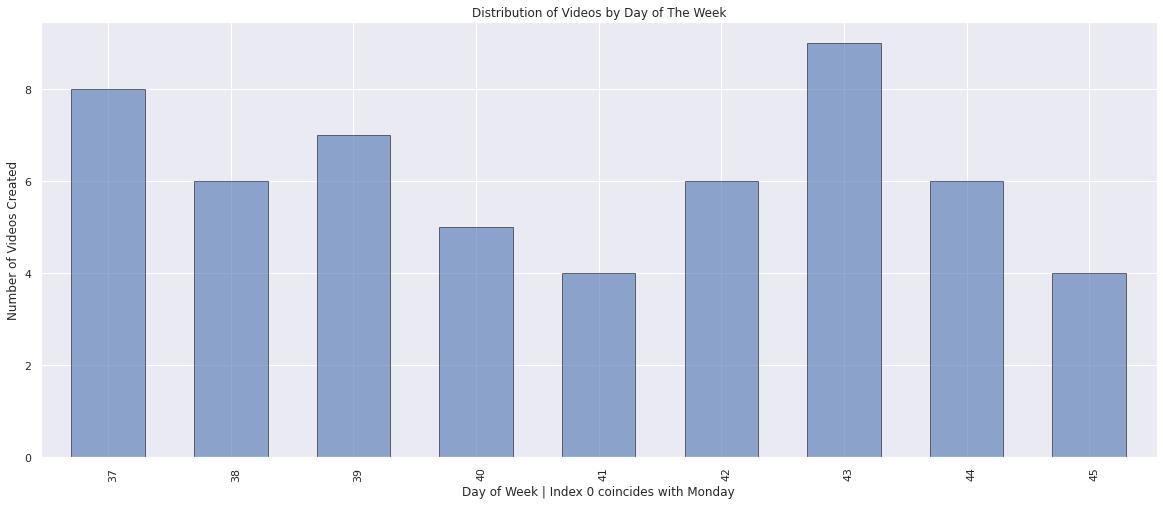

In [ ]:
video_dist_by_week(sypherPKVideos_arch)

In [ ]:
print("Over the last 2 months, SypherPK's average Monday follower count increased on average by:", (20530/len(sypherFollowers))*100)
print("Over the last 2 months, SypherPK's average Tuesday follower count increased on average by:", (38170/len(sypherFollowers))*100)
print("Over the last 2 months, SypherPK's average Wednesday follower count increased on average by:", (42589/len(sypherFollowers))*100)
print("Over the last 2 months, SypherPK's average Thursday follower count increased on average by:", (34313/len(sypherFollowers))*100)
print("Over the last 2 months, SypherPK's average Friday follower count increased on average by:", (21175/len(sypherFollowers))*100)
print("Over the last 2 months, SypherPK's average Saturday follower count increased on average by:", (26226/len(sypherFollowers))*100)
print("Over the last 2 months, SypherPK's average Sunday follower count increased on average by:", (30397/len(sypherFollowers))*100)
sypherFollowers.groupby('day')[['to_name']].count()

Over the last 2 months, SypherPK's average Monday follower count increased on average by: 9.620431115276476
Over the last 2 months, SypherPK's average Tuesday follower count increased on average by: 17.88659793814433
Over the last 2 months, SypherPK's average Wednesday follower count increased on average by: 19.957357075913777
Over the last 2 months, SypherPK's average Thursday follower count increased on average by: 16.079194001874413
Over the last 2 months, SypherPK's average Friday follower count increased on average by: 9.922680412371134
Over the last 2 months, SypherPK's average Saturday follower count increased on average by: 12.289597000937206
Over the last 2 months, SypherPK's average Sunday follower count increased on average by: 14.244142455482661


to_name
day         
0      20530
1      38170
2      42589
3      34313
4      21175
5      26226
6      30397

In [ ]:
#take followers copy & views copy and merge together by dow/week index then do chart below to look at correlation
spkf = sypherFollowers.copy()
spkf = spkf.groupby('date')[['to_name']].count().reset_index()
spkf = spkf.rename(columns={'to_name':'count_followers'})
spkf.head()

date  count_followers
0 2020-09-07              565
1 2020-09-08             3164
2 2020-09-09             3534
3 2020-09-10             2586
4 2020-09-11             5893

In [ ]:
spkv = sypherPKVideos.copy()
spkv = spkv.groupby('date')[['view_count']].sum().reset_index()
spkv.head()

date  view_count
0 2020-09-08      183030
1 2020-09-09      182775
2 2020-09-10      361614
3 2020-09-11      177924
4 2020-09-12      223091

In [ ]:
spkg = sypherPKVideos.copy()
spkg = spkg.groupby(['date','game'])[['video_id']].count().reset_index()
spkg.head()

date      game  video_id
0 2020-09-08  Fortnite         1
1 2020-09-09  Fortnite         2
2 2020-09-10  Fortnite         2
3 2020-09-11  Fortnite         1
4 2020-09-12  Multiple         1

In [ ]:
spkvspkf = pd.merge(spkf,spkv)
spkvspkf

date  count_followers  view_count
0  2020-09-08             3164      183030
1  2020-09-09             3534      182775
2  2020-09-10             2586      361614
3  2020-09-11             5893      177924
4  2020-09-12             3594      223091
5  2020-09-13             2619      132798
6  2020-09-15             4215      197109
7  2020-09-16             2773      163978
8  2020-09-17             5145      209190
9  2020-09-18             2010      127074
10 2020-09-19             5183      304457
11 2020-09-20             6840      291558
12 2020-09-21             4569      208056
13 2020-09-22             2351      101638
14 2020-09-23             8314      455878
15 2020-09-24             6142      281294
16 2020-09-25             3131      129232
17 2020-09-26             2187      119470
18 2020-09-27             3552      311211
19 2020-09-28             2531         602
20 2020-09-29             4277      189836
21 2020-09-30             3493      287997
22 2020-10-01             3786       96456
23 2020-10-02             3465      185248
24 2020-10-03              974         660
25 2020-10-04             4789      254518
26 2020-10-06             2867      376041
27 2020-10-07             7399      157297
28 2020-10-08             3564      176112
29 2020-10-09              816        1381
30 2020-10-13             6780      313599
31 2020-10-14             4057      239132
32 2020-10-15              850         813
33 2020-10-16             1278      304913
34 2020-10-17             6634       85486
35 2020-10-18             4022      190186
36 2020-10-19             3163      174285
37 2020-10-20             4533      276083
38 2020-10-21             7759      426988
39 2020-10-22             4351      307519
40 2020-10-23             3214      201911
41 2020-10-24             5799      359370
42 2020-10-25             4710      128786
43 2020-10-26             2176       94847
44 2020-10-27             1730       98102
45 2020-10-28              712         456
46 2020-10-29             5940      269754
47 2020-10-31             1255       64032
48 2020-11-01             3256      154950
49 2020-11-02             5661      312624
50 2020-11-03             8253      431576
51 2020-11-04             4548      307839
52 2020-11-05             1949         366

In [ ]:
spkfspkg = pd.merge(spkf,spkg)
spkfspkgspkv = pd.merge(spkfspkg,spkv)
spkfspkgspkv['sum_follow_view'] = spkfspkgspkv.apply(lambda x: x['count_followers'] + x['view_count'], axis=1)
spkfspkgspkv.sort_values(by='sum_follow_view', ascending = False)

date  count_followers  ... view_count  sum_follow_view
14 2020-09-23             8314  ...     455878           464192
50 2020-11-03             8253  ...     431576           439829
37 2020-10-21             7759  ...     426988           434747
25 2020-10-06             2867  ...     376041           378908
24 2020-10-06             2867  ...     376041           378908
40 2020-10-24             5799  ...     359370           365169
2  2020-09-10             2586  ...     361614           364200
29 2020-10-13             6780  ...     313599           320379
28 2020-10-13             6780  ...     313599           320379
49 2020-11-02             5661  ...     312624           318285
48 2020-11-02             5661  ...     312624           318285
18 2020-09-27             3552  ...     311211           314763
51 2020-11-04             4548  ...     307839           312387
38 2020-10-22             4351  ...     307519           311870
10 2020-09-19             5183  ...     304457           309640
31 2020-10-16             1278  ...     304913           306191
11 2020-09-20             6840  ...     291558           298398
20 2020-09-30             3493  ...     287997           291490
15 2020-09-24             6142  ...     281294           287436
36 2020-10-20             4533  ...     276083           280616
44 2020-10-29             5940  ...     269754           275694
23 2020-10-04             4789  ...     254518           259307
30 2020-10-14             4057  ...     239132           243189
4  2020-09-12             3594  ...     223091           226685
8  2020-09-17             5145  ...     209190           214335
12 2020-09-21             4569  ...     208056           212625
39 2020-10-23             3214  ...     201911           205125
6  2020-09-15             4215  ...     197109           201324
33 2020-10-18             4022  ...     190186           194208
19 2020-09-29             4277  ...     189836           194113
22 2020-10-02             3465  ...     185248           188713
1  2020-09-09             3534  ...     182775           186309
0  2020-09-08             3164  ...     183030           186194
3  2020-09-11             5893  ...     177924           183817
27 2020-10-08             3564  ...     176112           179676
35 2020-10-19             3163  ...     174285           177448
34 2020-10-19             3163  ...     174285           177448
7  2020-09-16             2773  ...     163978           166751
26 2020-10-07             7399  ...     157297           164696
46 2020-11-01             3256  ...     154950           158206
47 2020-11-01             3256  ...     154950           158206
5  2020-09-13             2619  ...     132798           135417
41 2020-10-25             4710  ...     128786           133496
16 2020-09-25             3131  ...     129232           132363
9  2020-09-18             2010  ...     127074           129084
17 2020-09-26             2187  ...     119470           121657
13 2020-09-22             2351  ...     101638           103989
21 2020-10-01             3786  ...      96456           100242
43 2020-10-27             1730  ...      98102            99832
42 2020-10-26             2176  ...      94847            97023
32 2020-10-17             6634  ...      85486            92120
45 2020-10-31             1255  ...      64032            65287

[52 rows x 6 columns]

[]

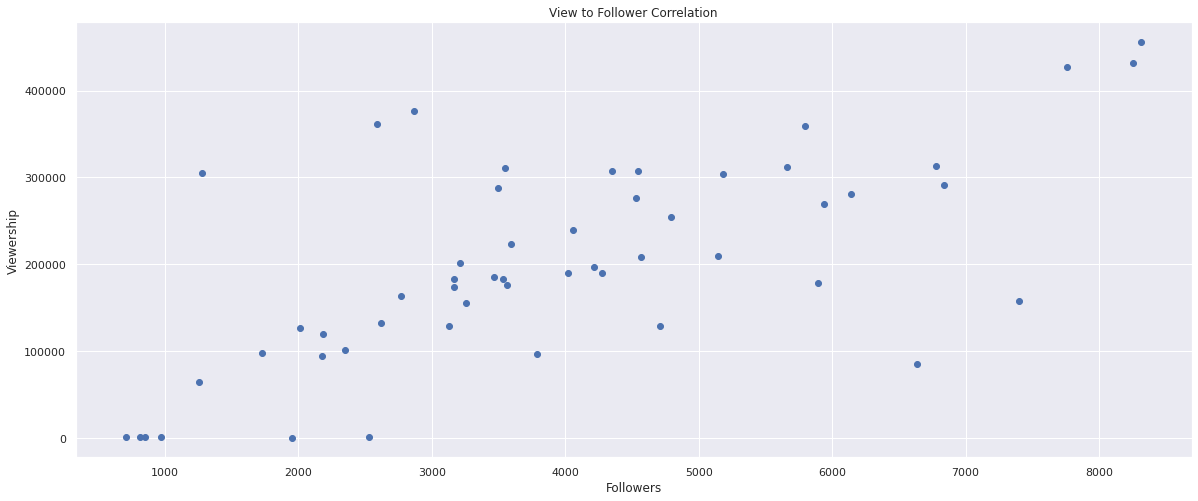

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(data=spkvspkf, x="count_followers", y="view_count")
plt.xlabel("Followers")
plt.ylabel("Viewership")
plt.title("View to Follower Correlation")
plt.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data, kind. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


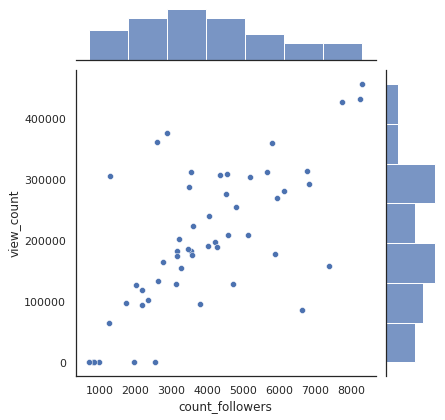

In [ ]:
follower_view_joint_scatter_bydate(spkvspkf)

# image.pngSykkuno's Twitch Performance Analysis

**Sykkuno's Twitch Performance Analysis**

In [ ]:
sykkunoUser = twitchUsers.copy() 
sykkunoUser['sykkuno'] = (sykkunoUser['display_name'] == 'Sykkuno')
sykkunoUser = sykkunoUser[sykkunoUser.sykkuno==True]
sykkunoUser

id display_name  ... highlight_videos sykkuno
3  26154978      Sykkuno  ...                3    True

[1 rows x 11 columns]

In [ ]:
sykkunoVideos = userVideos.copy() 
sykkunoVideos['sykkuno'] = (sykkunoVideos['user_name'] == 'Sykkuno')
sykkunoVideos = sykkunoVideos[sykkunoVideos.sykkuno==True]
sykkunoVideos.head()

video_id   user_id user_name  ...  ss  duration_formatted sykkuno
0   793151603  26154978   Sykkuno  ...  24     0 days 05:00:24    True
1   793014095  26154978   Sykkuno  ...  07     0 days 02:23:07    True
7   792247413  26154978   Sykkuno  ...  40     0 days 05:32:40    True
14  791214525  26154978   Sykkuno  ...  32     0 days 06:18:32    True
30  790230730  26154978   Sykkuno  ...  46     0 days 05:01:46    True

[5 rows x 21 columns]

In [ ]:
sykkunoFollowers.head()

from_id      from_name       to_id  ...       date  day  week
0  591508553.0         Z2tone  26154978.0  ... 2020-11-05  3.0  45.0
1  517944270.0   hai1_st0rm07  26154978.0  ... 2020-11-05  3.0  45.0
2  601569502.0     elamhal000  26154978.0  ... 2020-11-05  3.0  45.0
3  603935185.0     jannie_duh  26154978.0  ... 2020-11-05  3.0  45.0
4  585759539.0  suhhstephanie  26154978.0  ... 2020-11-05  3.0  45.0

[5 rows x 8 columns]

In [ ]:
print("Sykkuno's follower growth percentage over the span of the scope is:", (sykkunoUser.gained_followers.sum()/sykkunoUser.starting_followers.sum())*100)

Sykkuno's follower growth percentage over the span of the scope is: 231.616834272465


In [ ]:
sykkunoVideos['upper'] = sykkunoVideos['title'].str.isupper() 
sykkunoVideos.groupby('upper')[['view_count']].sum().reset_index().sort_values(by='view_count',ascending=False)

upper  view_count
0  False    29561714
1   True     1401394

In [ ]:
sykkunoVideos.groupby('upper')[['user_id']].count().reset_index().sort_values(by='user_id',ascending=False)

upper  user_id
0  False       55
1   True        2

In [ ]:
print("the view to video ratio for videos where the title is NOT ENTIRELY upper case is:", 29561714/55)
print("the view to video ratio for videos where the title is ENTIRELY upper case is:",1401394/2)
print(700697-537485.71)

the view to video ratio for videos where the title is NOT ENTIRELY upper case is: 537485.7090909091
the view to video ratio for videos where the title is ENTIRELY upper case is: 700697.0
163211.29000000004


In [ ]:
print("Followers breakdown by dow:")
sykkunoFollowers.groupby('day')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by dow:


day   to_id
3  3.0  196243
2  2.0  153131
1  1.0  122221
0  0.0  120125
6  6.0  118721
4  4.0   87720
5  5.0   60929

In [ ]:
print("Followers breakdown by week:")
sykkunoFollowers.groupby('week')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by week:


week   to_id
7  44.0  153246
6  43.0  151358
5  42.0  129570
8  45.0  121315
4  41.0   85746
2  39.0   70678
3  40.0   59159
1  38.0   48191
0  37.0   39827

In [ ]:
print("Sum of views across all videos for Sykkuno:",sykkunoVideos.view_count.sum())
print("Video view breakdown by type:")
sykkunoVideos.groupby('type')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Sum of views across all videos for Sykkuno: 30963108
Video view breakdown by type:


type  view_count
0    archive    30917578
1  highlight       45530

In [ ]:
print("Video view breakdown by dow:")
sykkunoVideos.groupby('day')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by dow:


day  view_count
2    2     6911177
3    3     6336227
0    0     5304419
6    6     4291353
1    1     2958344
5    5     2633636
4    4     2527952

In [ ]:
print("Video view breakdown by week:")
sykkunoVideos.groupby('week')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by week:


week  view_count
8    45     5134383
7    44     4956720
6    43     4745735
4    41     4051226
5    42     3804335
2    39     2313248
3    40     2288505
1    38     1861645
0    37     1807311

In [ ]:
print("Average view count per video", ((30917578+45530)/len(sykkunoVideos)))
print("Average view count per archive", (45530/3))
print("Average view count per stream", (30917578/54))

Average view count per video 543212.4210526316
Average view count per archive 15176.666666666666
Average view count per stream 572547.7407407408


In [ ]:
print("Video breakdown by type:")
sykkunoVideos.groupby('type')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by type:


video_id
type               
archive          54
highlight         3

In [ ]:
print("Video breakdown by day:")
sykkunoVideos.groupby('day')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by day:


video_id
day          
2          14
3          12
0           8
6           8
1           6
4           5
5           4

In [ ]:
print("Video breakdown by week:")
sykkunoVideos.groupby('week')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by week:


video_id
week          
41           9
37           7
38           6
39           6
40           6
42           6
43           6
45           6
44           5

In [ ]:
print("Video duration breakdown by type:")
sykkunoVideos.groupby('type')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by type:


duration_formatted
type                        
archive     12 days 06:47:20
highlight    0 days 00:02:23

In [ ]:
print("Video duration breakdown by day:")
sykkunoVideos.groupby('day')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by day:


duration_formatted
day                   
2      3 days 03:35:20
3      1 days 22:17:08
6      1 days 20:59:38
0      1 days 12:41:48
1      1 days 11:53:52
5      1 days 08:25:05
4      0 days 22:56:52

In [ ]:
print("Video duration breakdown by week:")
sykkunoVideos.groupby('week')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by week:


duration_formatted
week                   
41      1 days 22:07:04
37      1 days 14:31:01
39      1 days 09:05:47
38      1 days 08:51:28
40      1 days 08:05:03
45      1 days 05:18:03
42      1 days 05:16:18
43      1 days 04:17:47
44      1 days 01:17:12

In [ ]:
print("Video breakdown by game:")
print(40/54*100)
sykkunoVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)

Video breakdown by game:
74.07407407407408


game  video_id
0           Among Us        40
4           Multiple         7
5       Plasmophobia         3
1     Genshin Impact         1
2  Marvel's Avengers         1
3          Minecraft         1
6           Valorant         1

In [ ]:
print("Video breakdown by game:")
sypie = sykkunoVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)

Video breakdown by game:


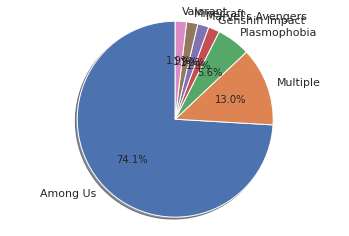

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(sypie.video_id, labels=sypie.game, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
sykkunoVideos.groupby('game')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

game  view_count
0           Among Us    24938832
4           Multiple     3073209
5       Plasmophobia     1268564
3          Minecraft      922380
1     Genshin Impact      262189
2  Marvel's Avengers      261568
6           Valorant      190836

In [ ]:
sykkunoVideos.groupby('game')[['duration_formatted']].sum().reset_index().sort_values(by=['duration_formatted'], ascending = False)

game duration_formatted
0           Among Us    9 days 10:16:12
4           Multiple    1 days 11:16:49
5       Plasmophobia    0 days 18:14:36
3          Minecraft    0 days 06:18:32
1     Genshin Impact    0 days 03:54:30
6           Valorant    0 days 02:46:40
2  Marvel's Avengers    0 days 02:00:01

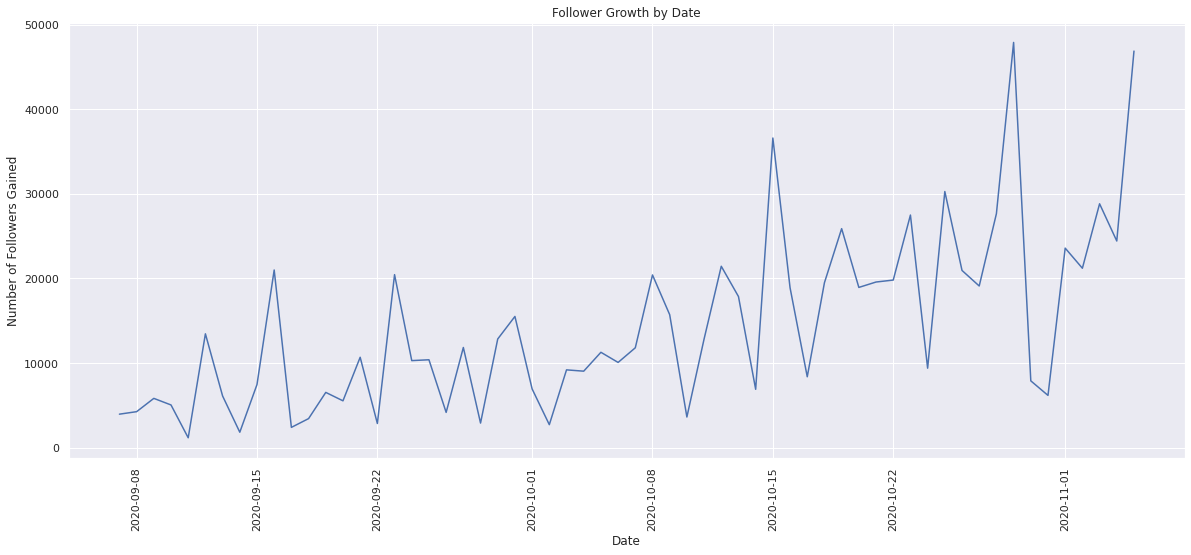

In [ ]:
followers_by_date(sykkunoFollowers)

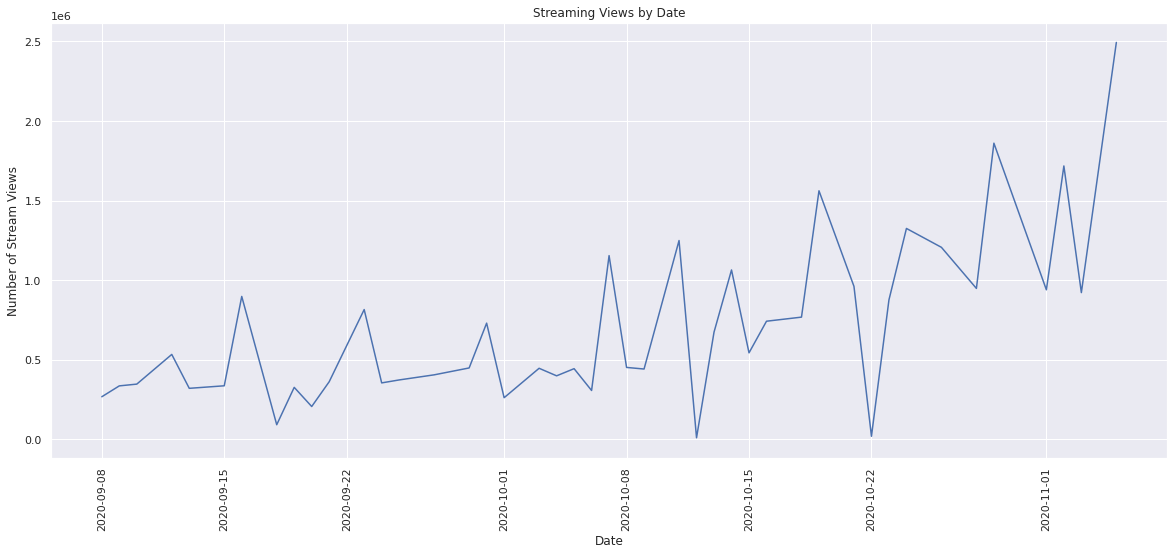

In [ ]:
views_by_date(sykkunoVideos)

In [ ]:
#Checking dips in viewership on 10/22 and around 10/12 > Result of no stream on those dates, just a highlight video
sykkunoVideos

video_id   user_id user_name  ... duration_formatted  sykkuno  upper
0    793151603  26154978   Sykkuno  ...    0 days 05:00:24     True  False
1    793014095  26154978   Sykkuno  ...    0 days 02:23:07     True   True
7    792247413  26154978   Sykkuno  ...    0 days 05:32:40     True  False
14   791214525  26154978   Sykkuno  ...    0 days 06:18:32     True   True
30   790230730  26154978   Sykkuno  ...    0 days 05:01:46     True  False
36   789339805  26154978   Sykkuno  ...    0 days 05:01:34     True  False
42   788330778  26154978   Sykkuno  ...    0 days 05:05:16     True  False
59   785679606  26154978   Sykkuno  ...    0 days 04:11:09     True  False
64   785098032  26154978   Sykkuno  ...    0 days 04:25:46     True  False
73   784134356  26154978   Sykkuno  ...    0 days 04:51:25     True  False
81   782736504  26154978   Sykkuno  ...    0 days 06:43:36     True  False
95   780871742  26154978   Sykkuno  ...    0 days 09:04:09     True  False
106  778806476  26154978   Sykkuno  ...    0 days 04:54:30     True  False
108  778614755  26154978   Sykkuno  ...    0 days 00:00:49     True  False
116  777615870  26154978   Sykkuno  ...    0 days 05:12:38     True  False
138  775555560  26154978   Sykkuno  ...    0 days 06:08:32     True  False
142  774882467  26154978   Sykkuno  ...    0 days 02:57:09     True  False
153  773840571  26154978   Sykkuno  ...    0 days 05:29:19     True  False
166  772369062  26154978   Sykkuno  ...    0 days 05:40:18     True  False
171  771413898  26154978   Sykkuno  ...    0 days 03:45:38     True  False
176  770584760  26154978   Sykkuno  ...    0 days 08:28:56     True  False
196  768805917  26154978   Sykkuno  ...    0 days 05:50:56     True  False
199  768672499  26154978   Sykkuno  ...    0 days 00:01:11     True  False
204  767734188  26154978   Sykkuno  ...    0 days 07:35:30     True  False
206  766830502  26154978   Sykkuno  ...    0 days 04:21:42     True  False
216  765436679  26154978   Sykkuno  ...    0 days 04:34:54     True  False
224  764587571  26154978   Sykkuno  ...    0 days 02:46:40     True  False
227  764372981  26154978   Sykkuno  ...    0 days 02:00:01     True  False
235  763733774  26154978   Sykkuno  ...    0 days 07:36:34     True  False
241  762864962  26154978   Sykkuno  ...    0 days 07:34:40     True  False
251  762065915  26154978   Sykkuno  ...    0 days 04:10:23     True  False
258  761003522  26154978   Sykkuno  ...    0 days 05:26:40     True  False
265  760094042  26154978   Sykkuno  ...    0 days 05:20:32     True  False
271  758956990  26154978   Sykkuno  ...    0 days 07:18:14     True  False
294  757188807  26154978   Sykkuno  ...    0 days 03:54:30     True  False
306  756694243  26154978   Sykkuno  ...    0 days 04:07:14     True  False
312  756118316  26154978   Sykkuno  ...    0 days 05:35:50     True  False
320  755059689  26154978   Sykkuno  ...    0 days 05:48:43     True  False
337  753313458  26154978   Sykkuno  ...    0 days 05:49:09     True  False
345  751803849  26154978   Sykkuno  ...    0 days 05:56:34     True  False
367  750305520  26154978   Sykkuno  ...    0 days 04:49:36     True  False
371  749890272  26154978   Sykkuno  ...    0 days 04:34:21     True  False
387  749338472  26154978   Sykkuno  ...    0 days 06:34:47     True  False
406  747511856  26154978   Sykkuno  ...    0 days 05:21:20     True  False
418  746450212  26154978   Sykkuno  ...    0 days 04:58:12     True  False
426  745342043  26154978   Sykkuno  ...    0 days 06:36:08     True  False
437  744352187  26154978   Sykkuno  ...    0 days 01:50:36     True  False
458  742973649  26154978   Sykkuno  ...    0 days 04:56:26     True  False
464  742390736  26154978   Sykkuno  ...    0 days 08:07:02     True  False
473  741382106  26154978   Sykkuno  ...    0 days 06:23:04     True  False
485  739582870  26154978   Sykkuno  ...    0 days 06:19:58     True  False
496  738434897  26154978   Sykkuno  ...    0 days 09:26:34     True  False
522  736615261  26154978   Sykk

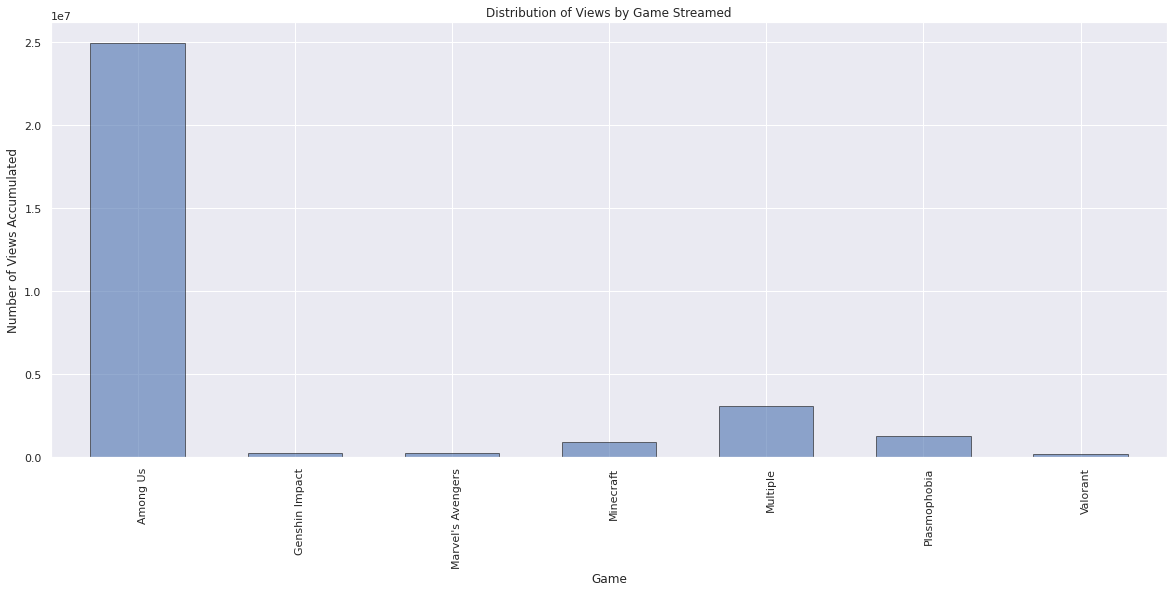

In [ ]:
view_dist_by_game(sykkunoVideos)

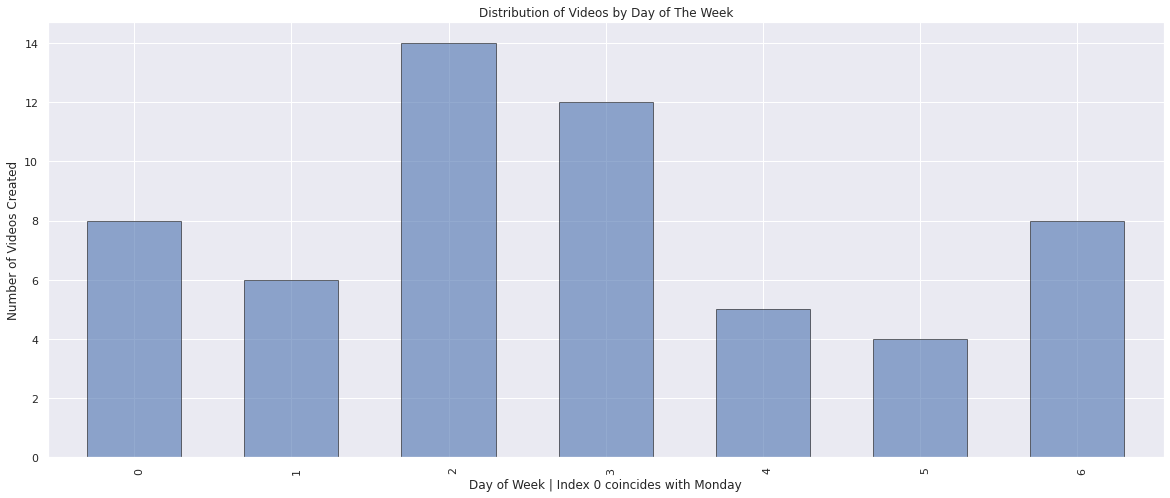

In [ ]:
video_dist_by_dow(sykkunoVideos)

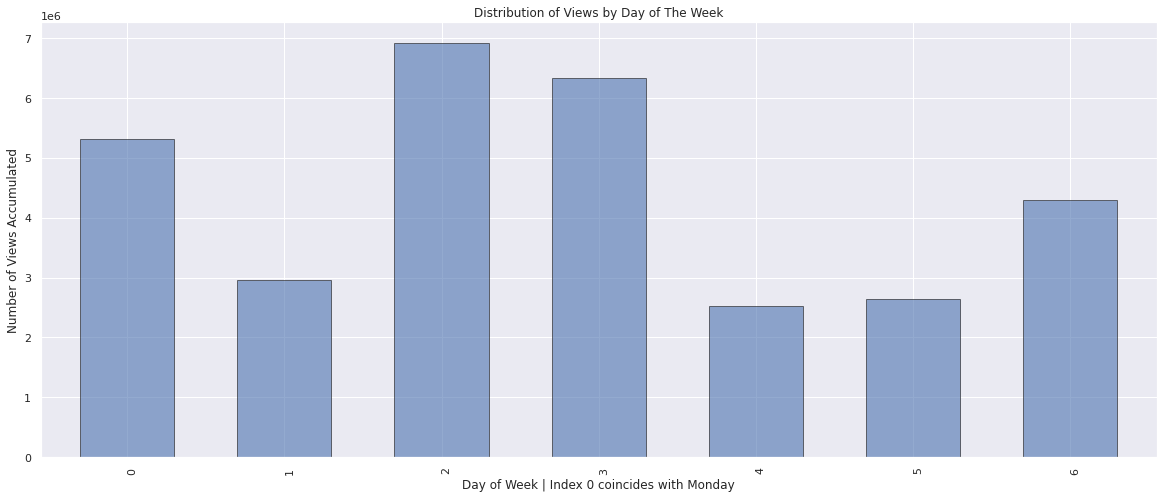

In [ ]:
view_dist_by_day(sykkunoVideos)

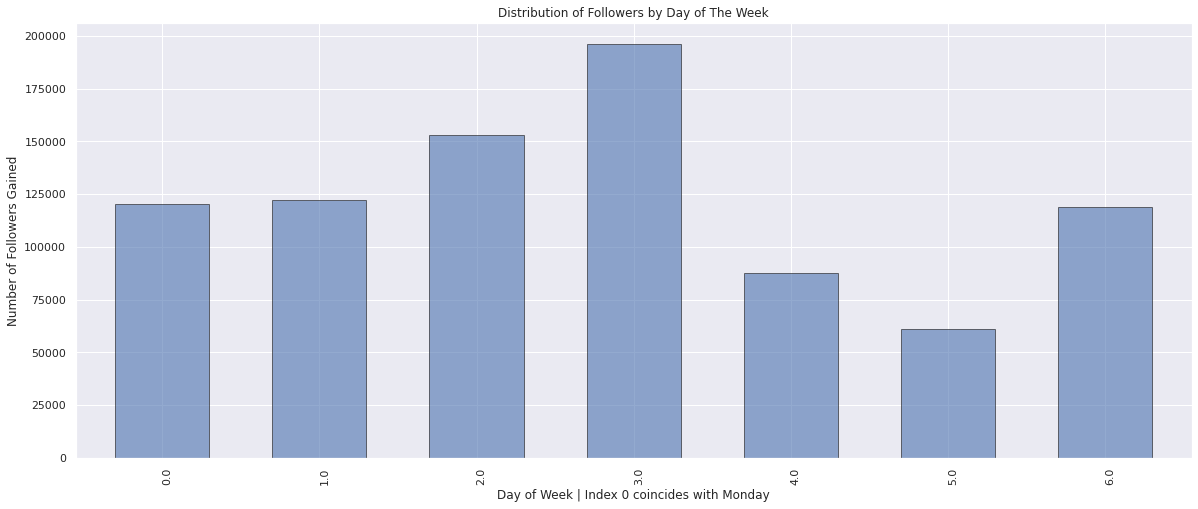

In [ ]:
follower_dist_by_day(sykkunoFollowers)

Note: scope begins on week 37 - 09/07/2020


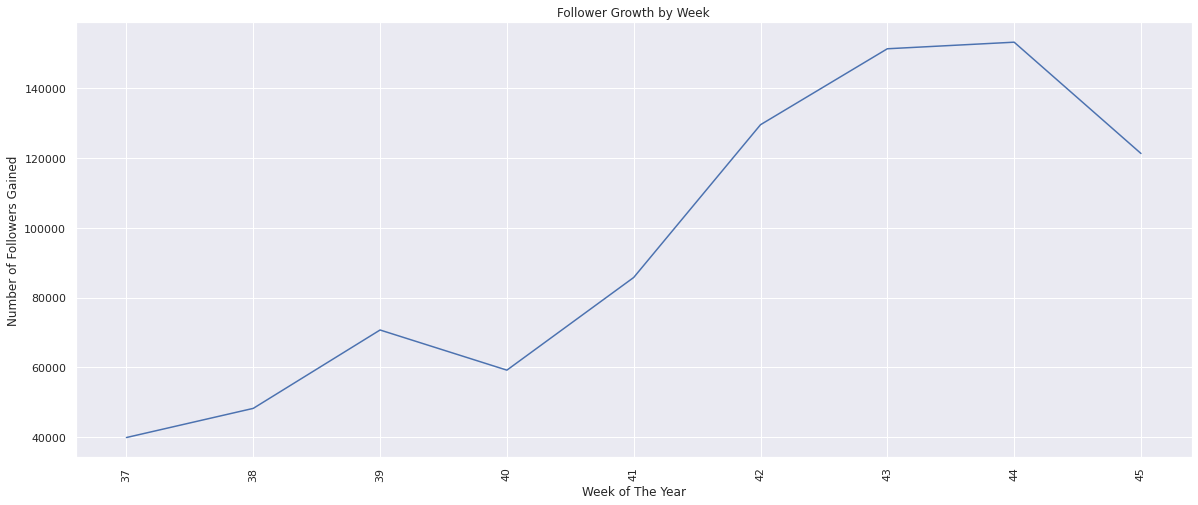

In [ ]:
followers_by_week(sykkunoFollowers)

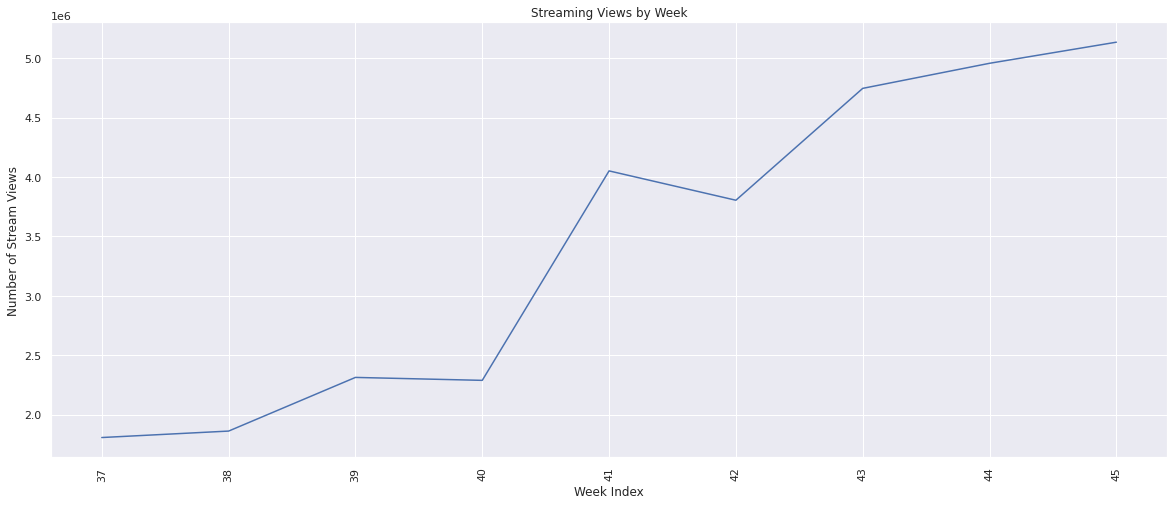

In [ ]:
views_by_week(sykkunoVideos)

In [ ]:
sykkunoVideos

video_id   user_id user_name  ... duration_formatted  sykkuno  upper
0    793151603  26154978   Sykkuno  ...    0 days 05:00:24     True  False
1    793014095  26154978   Sykkuno  ...    0 days 02:23:07     True   True
7    792247413  26154978   Sykkuno  ...    0 days 05:32:40     True  False
14   791214525  26154978   Sykkuno  ...    0 days 06:18:32     True   True
30   790230730  26154978   Sykkuno  ...    0 days 05:01:46     True  False
36   789339805  26154978   Sykkuno  ...    0 days 05:01:34     True  False
42   788330778  26154978   Sykkuno  ...    0 days 05:05:16     True  False
59   785679606  26154978   Sykkuno  ...    0 days 04:11:09     True  False
64   785098032  26154978   Sykkuno  ...    0 days 04:25:46     True  False
73   784134356  26154978   Sykkuno  ...    0 days 04:51:25     True  False
81   782736504  26154978   Sykkuno  ...    0 days 06:43:36     True  False
95   780871742  26154978   Sykkuno  ...    0 days 09:04:09     True  False
106  778806476  26154978   Sykkuno  ...    0 days 04:54:30     True  False
108  778614755  26154978   Sykkuno  ...    0 days 00:00:49     True  False
116  777615870  26154978   Sykkuno  ...    0 days 05:12:38     True  False
138  775555560  26154978   Sykkuno  ...    0 days 06:08:32     True  False
142  774882467  26154978   Sykkuno  ...    0 days 02:57:09     True  False
153  773840571  26154978   Sykkuno  ...    0 days 05:29:19     True  False
166  772369062  26154978   Sykkuno  ...    0 days 05:40:18     True  False
171  771413898  26154978   Sykkuno  ...    0 days 03:45:38     True  False
176  770584760  26154978   Sykkuno  ...    0 days 08:28:56     True  False
196  768805917  26154978   Sykkuno  ...    0 days 05:50:56     True  False
199  768672499  26154978   Sykkuno  ...    0 days 00:01:11     True  False
204  767734188  26154978   Sykkuno  ...    0 days 07:35:30     True  False
206  766830502  26154978   Sykkuno  ...    0 days 04:21:42     True  False
216  765436679  26154978   Sykkuno  ...    0 days 04:34:54     True  False
224  764587571  26154978   Sykkuno  ...    0 days 02:46:40     True  False
227  764372981  26154978   Sykkuno  ...    0 days 02:00:01     True  False
235  763733774  26154978   Sykkuno  ...    0 days 07:36:34     True  False
241  762864962  26154978   Sykkuno  ...    0 days 07:34:40     True  False
251  762065915  26154978   Sykkuno  ...    0 days 04:10:23     True  False
258  761003522  26154978   Sykkuno  ...    0 days 05:26:40     True  False
265  760094042  26154978   Sykkuno  ...    0 days 05:20:32     True  False
271  758956990  26154978   Sykkuno  ...    0 days 07:18:14     True  False
294  757188807  26154978   Sykkuno  ...    0 days 03:54:30     True  False
306  756694243  26154978   Sykkuno  ...    0 days 04:07:14     True  False
312  756118316  26154978   Sykkuno  ...    0 days 05:35:50     True  False
320  755059689  26154978   Sykkuno  ...    0 days 05:48:43     True  False
337  753313458  26154978   Sykkuno  ...    0 days 05:49:09     True  False
345  751803849  26154978   Sykkuno  ...    0 days 05:56:34     True  False
367  750305520  26154978   Sykkuno  ...    0 days 04:49:36     True  False
371  749890272  26154978   Sykkuno  ...    0 days 04:34:21     True  False
387  749338472  26154978   Sykkuno  ...    0 days 06:34:47     True  False
406  747511856  26154978   Sykkuno  ...    0 days 05:21:20     True  False
418  746450212  26154978   Sykkuno  ...    0 days 04:58:12     True  False
426  745342043  26154978   Sykkuno  ...    0 days 06:36:08     True  False
437  744352187  26154978   Sykkuno  ...    0 days 01:50:36     True  False
458  742973649  26154978   Sykkuno  ...    0 days 04:56:26     True  False
464  742390736  26154978   Sykkuno  ...    0 days 08:07:02     True  False
473  741382106  26154978   Sykkuno  ...    0 days 06:23:04     True  False
485  739582870  26154978   Sykkuno  ...    0 days 06:19:58     True  False
496  738434897  26154978   Sykkuno  ...    0 days 09:26:34     True  False
522  736615261  26154978   Sykk

In [ ]:
sykkunoVideos.groupby(['week','game'])[['user_id']].count()

user_id
week game                      
37   Among Us                 6
38   Among Us                 3
     Multiple                 3
39   Among Us                 6
40   Among Us                 2
     Genshin Impact           1
     Plasmophobia             3
41   Among Us                 5
     Marvel's Avengers        1
     Multiple                 2
     Valorant                 1
42   Among Us                 5
43   Among Us                 5
44   Among Us                 4
     Multiple                 1
45   Among Us                 4
     Minecraft                1
     Multiple                 1

In [ ]:
sykkunoVideos.groupby('week')[['user_id']].count()

user_id
week         
37          7
38          6
39          6
40          6
41          9
42          6
43          6
44          5
45          6

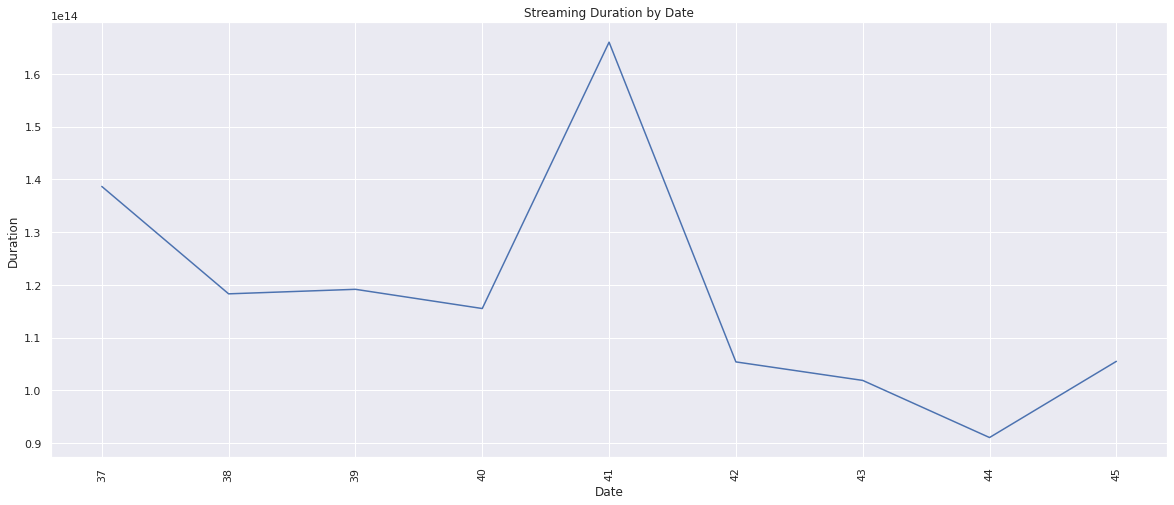

In [ ]:
duration_by_week(sykkunoVideos)

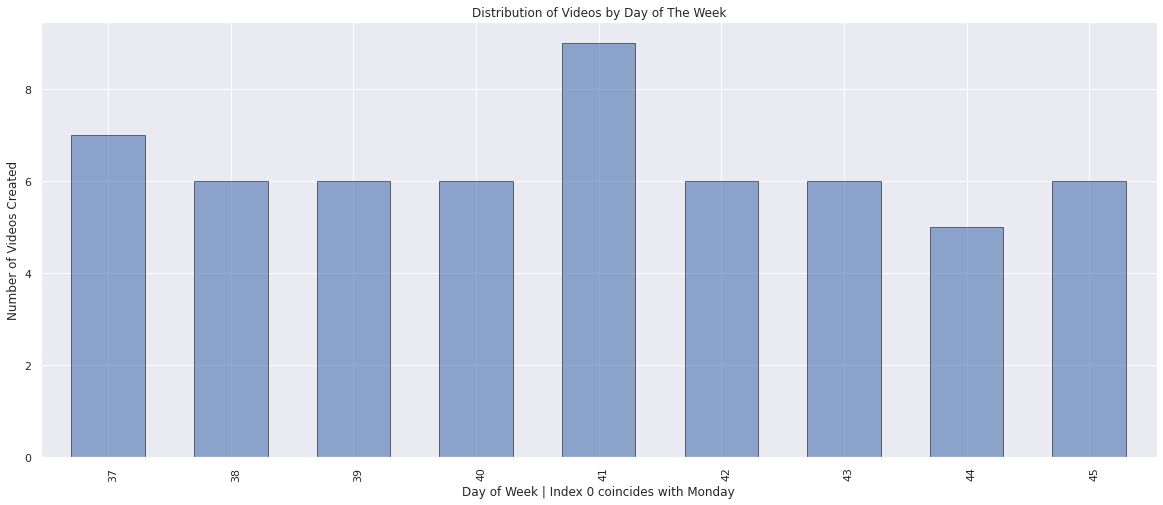

In [ ]:
video_dist_by_week(sykkunoVideos)

In [ ]:
print("Over the last 2 months, Sykkuno's average Monday follower count increased on average by:", (120125/len(sykkunoFollowers))*100)
print("Over the last 2 months, Sykkuno's average Tuesday follower count increased on average by:", (122221/len(sykkunoFollowers))*100)
print("Over the last 2 months, Sykkuno's average Wednesday follower count increased on average by:", (153131/len(sykkunoFollowers))*100)
print("Over the last 2 months, Sykkuno's average Thursday follower count increased on average by:", (196243/len(sykkunoFollowers))*100)
print("Over the last 2 months, Sykkuno's average Friday follower count increased on average by:", (87720/len(sykkunoFollowers))*100)
print("Over the last 2 months, Sykkuno's average Saturday follower count increased on average by:", (60929/len(sykkunoFollowers))*100)
print("Over the last 2 months, Sykkuno's average Sunday follower count increased on average by:", (118721/len(sykkunoFollowers))*100)
sykkunoFollowers.groupby('day')[['to_name']].count()

Over the last 2 months, Sykkuno's average Monday follower count increased on average by: 13.982819029438126
Over the last 2 months, Sykkuno's average Tuesday follower count increased on average by: 14.226798123595898
Over the last 2 months, Sykkuno's average Wednesday follower count increased on average by: 17.824791348985556
Over the last 2 months, Sykkuno's average Thursday follower count increased on average by: 22.843124701719262
Over the last 2 months, Sykkuno's average Friday follower count increased on average by: 10.210804455877732
Over the last 2 months, Sykkuno's average Saturday follower count increased on average by: 7.092272055314345
Over the last 2 months, Sykkuno's average Sunday follower count increased on average by: 13.819390285069085


to_name
day         
0.0   120125
1.0   122221
2.0   153131
3.0   196243
4.0    87720
5.0    60929
6.0   118721

In [ ]:
sf = sykkunoFollowers.copy()
sf = sf.groupby('date')[['to_name']].count().reset_index()
sf = sf.rename(columns={'to_name':'count_followers'})
sf.head()

date  count_followers
0 2020-09-07             3961
1 2020-09-08             4256
2 2020-09-09             5827
3 2020-09-10             5049
4 2020-09-11             1170

In [ ]:
sv = sykkunoVideos.copy()
sv = sv.groupby('date')[['view_count']].sum().reset_index()
sv.head()

date  view_count
0 2020-09-08      268114
1 2020-09-09      336449
2 2020-09-10      347562
3 2020-09-12      534088
4 2020-09-13      321098

In [ ]:
sg = sykkunoVideos.copy()
sg = sg.groupby(['date','game'])[['video_id']].count().reset_index()
sg.head()

date      game  video_id
0 2020-09-08  Among Us         1
1 2020-09-09  Among Us         2
2 2020-09-10  Among Us         1
3 2020-09-12  Among Us         1
4 2020-09-13  Among Us         1

In [ ]:
svsf = pd.merge(sf,sv)
svsf

date  count_followers  view_count
0  2020-09-08             4256      268114
1  2020-09-09             5827      336449
2  2020-09-10             5049      347562
3  2020-09-12            13455      534088
4  2020-09-13             6109      321098
5  2020-09-15             7462      336988
6  2020-09-16            20996      898380
7  2020-09-18             3436       92381
8  2020-09-19             6533      327077
9  2020-09-20             5538      206819
10 2020-09-21            10684      362543
11 2020-09-23            20448      815913
12 2020-09-24            10289      355197
13 2020-09-25            10389      373770
14 2020-09-27            11841      405825
15 2020-09-29            12845      449093
16 2020-09-30            15508      730598
17 2020-10-01             6941      262189
18 2020-10-03             9196      446993
19 2020-10-04             9041      399632
20 2020-10-05            11273      444569
21 2020-10-06            10074      307553
22 2020-10-07            11805     1154776
23 2020-10-08            20413      452404
24 2020-10-09            15716      442360
25 2020-10-11            12841     1249564
26 2020-10-12            21438       10399
27 2020-10-13            17861      674216
28 2020-10-14             6898     1064715
29 2020-10-15            36592      543956
30 2020-10-16            18902      742696
31 2020-10-18            19500      768353
32 2020-10-19            25883     1562053
33 2020-10-21            19576      961629
34 2020-10-22            19807       19830
35 2020-10-23            27490      876745
36 2020-10-24             9394     1325478
37 2020-10-26            20944     1206846
38 2020-10-28            27651      948717
39 2020-10-29            47887     1861095
40 2020-11-01            23581      940062
41 2020-11-02            21206     1718009
42 2020-11-03            28821      922380
43 2020-11-05            46866     2493994

In [ ]:
sfsg = pd.merge(sf,sg)
sfsgsv = pd.merge(sfsg,sv)
sfsgsv['sum_follow_view'] = sfsgsv.apply(lambda x: x['count_followers'] + x['view_count'], axis=1)
sfsgsv.sort_values(by='sum_follow_view', ascending = False)

date  count_followers  ... view_count  sum_follow_view
45 2020-11-05            46866  ...    2493994          2540860
40 2020-10-29            47887  ...    1861095          1908982
43 2020-11-02            21206  ...    1718009          1739215
42 2020-11-02            21206  ...    1718009          1739215
34 2020-10-19            25883  ...    1562053          1587936
37 2020-10-24             9394  ...    1325478          1334872
28 2020-10-11            12841  ...    1249564          1262405
38 2020-10-26            20944  ...    1206846          1227790
24 2020-10-07            11805  ...    1154776          1166581
23 2020-10-07            11805  ...    1154776          1166581
30 2020-10-14             6898  ...    1064715          1071613
35 2020-10-21            19576  ...     961629           981205
39 2020-10-28            27651  ...     948717           976368
41 2020-11-01            23581  ...     940062           963643
44 2020-11-03            28821  ...     922380           951201
6  2020-09-16            20996  ...     898380           919376
36 2020-10-23            27490  ...     876745           904235
11 2020-09-23            20448  ...     815913           836361
33 2020-10-18            19500  ...     768353           787853
32 2020-10-16            18902  ...     742696           761598
17 2020-09-30            15508  ...     730598           746106
16 2020-09-30            15508  ...     730598           746106
29 2020-10-13            17861  ...     674216           692077
31 2020-10-15            36592  ...     543956           580548
3  2020-09-12            13455  ...     534088           547543
25 2020-10-08            20413  ...     452404           472817
26 2020-10-08            20413  ...     452404           472817
15 2020-09-29            12845  ...     449093           461938
27 2020-10-09            15716  ...     442360           458076
19 2020-10-03             9196  ...     446993           456189
21 2020-10-05            11273  ...     444569           455842
14 2020-09-27            11841  ...     405825           417666
20 2020-10-04             9041  ...     399632           408673
13 2020-09-25            10389  ...     373770           384159
10 2020-09-21            10684  ...     362543           373227
12 2020-09-24            10289  ...     355197           365486
2  2020-09-10             5049  ...     347562           352611
5  2020-09-15             7462  ...     336988           344450
1  2020-09-09             5827  ...     336449           342276
8  2020-09-19             6533  ...     327077           333610
4  2020-09-13             6109  ...     321098           327207
22 2020-10-06            10074  ...     307553           317627
0  2020-09-08             4256  ...     268114           272370
18 2020-10-01             6941  ...     262189           269130
9  2020-09-20             5538  ...     206819           212357
7  2020-09-18             3436  ...      92381            95817

[46 rows x 6 columns]

In [ ]:
sykkunoVideos.groupby('date')[['duration_formatted']].sum()

duration_formatted
date                         
2020-09-08    0 days 07:22:14
2020-09-09    0 days 07:55:27
2020-09-10    0 days 07:26:48
2020-09-12    0 days 09:26:34
2020-09-13    0 days 06:19:58
2020-09-15    0 days 06:23:04
2020-09-16    0 days 13:03:28
2020-09-18    0 days 01:50:36
2020-09-19    0 days 06:36:08
2020-09-20    0 days 04:58:12
2020-09-21    0 days 05:21:20
2020-09-23    0 days 11:09:08
2020-09-24    0 days 04:49:36
2020-09-25    0 days 05:56:34
2020-09-27    0 days 05:49:09
2020-09-29    0 days 05:48:43
2020-09-30    0 days 09:43:04
2020-10-01    0 days 03:54:30
2020-10-03    0 days 07:18:14
2020-10-04    0 days 05:20:32
2020-10-05    0 days 05:26:40
2020-10-06    0 days 04:10:23
2020-10-07    0 days 15:11:14
2020-10-08    0 days 04:46:41
2020-10-09    0 days 04:34:54
2020-10-11    0 days 11:57:12
2020-10-12    0 days 00:01:11
2020-10-13    0 days 05:50:56
2020-10-14    0 days 08:28:56
2020-10-15    0 days 03:45:38
2020-10-16    0 days 05:40:18
2020-10-18    0 days 05:29:19
2020-10-19    0 days 09:05:41
2020-10-21    0 days 05:12:38
2020-10-22    0 days 00:00:49
2020-10-23    0 days 04:54:30
2020-10-24    0 days 09:04:09
2020-10-26    0 days 06:43:36
2020-10-28    0 days 04:51:25
2020-10-29    0 days 08:36:55
2020-11-01    0 days 05:05:16
2020-11-02    0 days 10:03:20
2020-11-03    0 days 06:18:32
2020-11-05    0 days 12:56:11

[]

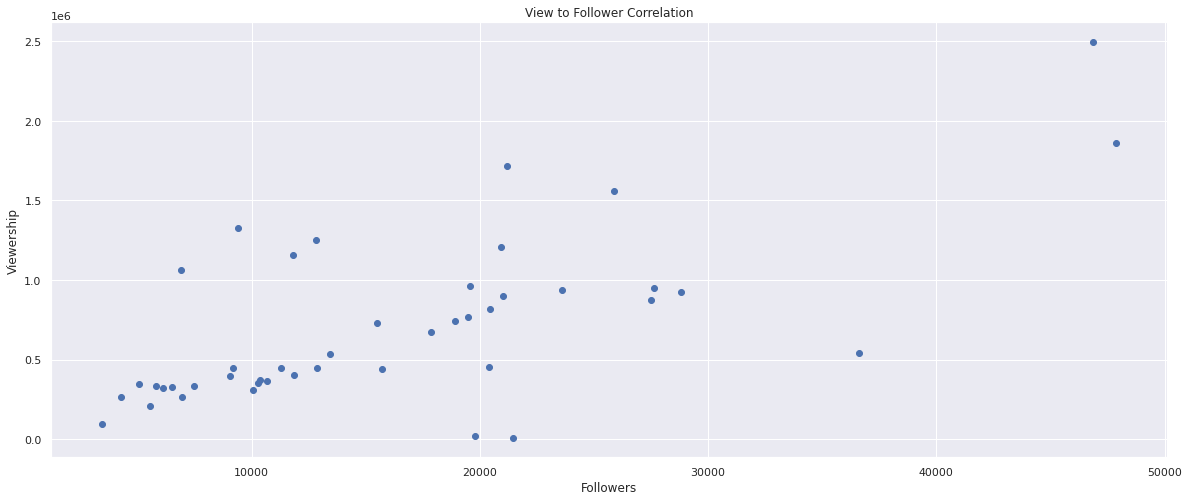

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(data=svsf, x="count_followers", y="view_count")
plt.xlabel("Followers")
plt.ylabel("Viewership")
plt.title("View to Follower Correlation")
plt.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data, kind. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


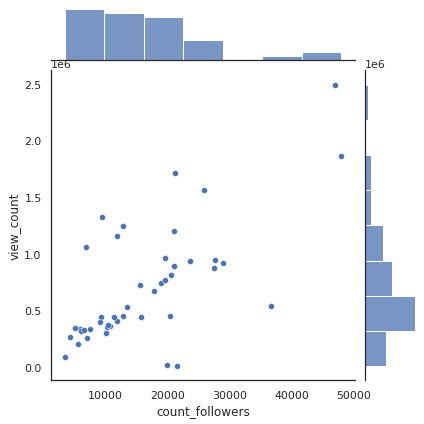

In [ ]:
follower_view_joint_scatter_bydate(svsf)

# HasanAbi's Twitch Performance Analysis

**HasanAbi's Twitch Performance Analysis**

In [ ]:
HasanAbiUser = twitchUsers.copy() 
HasanAbiUser['HasanAbi'] = (HasanAbiUser['display_name'] == 'HasanAbi')
HasanAbiUser = HasanAbiUser[HasanAbiUser.HasanAbi==True]
HasanAbiUser

id display_name  ... highlight_videos HasanAbi
4  207813352     HasanAbi  ...                1     True

[1 rows x 11 columns]

In [ ]:
hasanabiVideos = userVideos.copy() 
hasanabiVideos['hasan'] = (hasanabiVideos['user_name'] == 'HasanAbi')
hasanabiVideos = hasanabiVideos[hasanabiVideos.hasan==True]
hasanabiVideos['arch'] = (hasanabiVideos['type'] == 'archive')
hasanabiVideos.head()

video_id    user_id user_name  ... duration_formatted  hasan  arch
3   792929082  207813352  HasanAbi  ...    0 days 12:49:26   True  True
8   791917048  207813352  HasanAbi  ...    0 days 11:52:06   True  True
20  790951798  207813352  HasanAbi  ...    0 days 16:01:35   True  True
31  789942541  207813352  HasanAbi  ...    0 days 11:35:18   True  True
38  789029762  207813352  HasanAbi  ...    0 days 10:45:54   True  True

[5 rows x 22 columns]

In [ ]:
hasanabiFollowers.head()

from_id     from_name      to_id  ...       date day week
0  122460735     leodasher  207813352  ... 2020-11-05   3   45
1  139788573       alex_74  207813352  ... 2020-11-05   3   45
2   32053694       Russiah  207813352  ... 2020-11-05   3   45
3   37809193       CasMen7  207813352  ... 2020-11-05   3   45
4  128966461  vaibrazilean  207813352  ... 2020-11-05   3   45

[5 rows x 8 columns]

In [ ]:
print("HasanAbi's follower growth percentage over the span of the scope is:", (HasanAbiUser.gained_followers.sum()/HasanAbiUser.starting_followers.sum())*100)

HasanAbi's follower growth percentage over the span of the scope is: 54.16015733829177


In [ ]:
hasanabiVideos['upper'] = hasanabiVideos['title'].str.isupper()
hasanabiVideos.groupby('upper')[['view_count']].sum().reset_index().sort_values(by='view_count',ascending=False)

upper  view_count
1   True    34696790
0  False     3020699

In [ ]:
hasanabiVideos.groupby('upper')[['user_id']].count().reset_index().sort_values(by='user_id',ascending=False)

upper  user_id
1   True       60
0  False        3

In [ ]:
print("the view to video ratio for videos where the title is ENTIRELY upper case is:", 34696790/60)
print("the view to video ratio for videos where the title is NOT ENTIRELY upper case is:",3020699/3)
print(1006899.66-578279.83)

the view to video ratio for videos where the title is ENTIRELY upper case is: 578279.8333333334
the view to video ratio for videos where the title is NOT ENTIRELY upper case is: 1006899.6666666666
428619.8300000001


In [ ]:
print("Followers breakdown by dow:")
hasanabiFollowers.groupby('day')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by dow:


day  to_id
2    2  97760
3    3  46181
1    1  35691
4    4  27752
0    0  22147
5    5  16939
6    6  15969

In [ ]:
print("Followers breakdown by week:")
hasanabiFollowers.groupby('week')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by week:


week   to_id
8    45  103039
6    43   46164
3    40   31524
4    41   20121
7    44   18162
1    38   11731
5    42   11605
2    39   11015
0    37    9078

In [ ]:
print("Sum of views across all videos for HasanAbi:",hasanabiVideos.view_count.sum())
print("Video view breakdown by type:")
hasanabiVideos.groupby('type')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Sum of views across all videos for HasanAbi: 37717489
Video view breakdown by type:


type  view_count
0    archive    37712607
1  highlight        4882

In [ ]:
print("Video view breakdown by dow:")
hasanabiVideos.groupby('day')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by dow:


day  view_count
1    1     9325989
2    2     6743486
3    3     6172691
4    4     4829346
0    0     4086789
5    5     3418921
6    6     3140267

In [ ]:
print("Video view breakdown by week:")
hasanabiVideos.groupby('week')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by week:


week  view_count
8    45    11187370
6    43     6522919
3    40     3945320
4    41     3590539
7    44     3201676
5    42     2647811
0    37     2257171
2    39     2187545
1    38     2177138

In [ ]:
print("Average view count per video", ((37712607+4882)/63))
print("Average view count per highlight", (4882/1))
print("Average view count per stream", (37712607/62))

Average view count per video 598690.3015873015
Average view count per highlight 4882.0
Average view count per stream 608267.8548387097


In [ ]:
print("Video breakdown by type:")
hasanabiVideos.groupby('type')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by type:


video_id
type               
archive          62
highlight         1

In [ ]:
print("Video breakdown by dow:")
hasanabiVideos.groupby('day')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by dow:


video_id
day          
0          10
1          10
5          10
2           9
3           8
4           8
6           8

In [ ]:
print("Video breakdown by week:")
hasanabiVideos.groupby('week')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by week:


video_id
week          
41           9
37           8
39           8
38           7
40           7
42           7
43           7
44           6
45           4

In [ ]:
print("Video duration breakdown by type:")
hasanabiVideos.groupby('type')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by type:


duration_formatted
type                        
archive     24 days 15:45:34
highlight    0 days 02:55:02

In [ ]:
print("Video duration breakdown by day:")
hasanabiVideos.groupby('day')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by day:


duration_formatted
day                   
1      4 days 01:59:01
2      3 days 20:49:47
0      3 days 15:18:29
3      3 days 09:47:00
4      3 days 09:42:12
5      3 days 08:39:54
6      3 days 00:24:13

In [ ]:
print("Video duration breakdown by day:")
hasanabiVideos.groupby('week')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by day:


duration_formatted
week                   
37      3 days 02:17:36
38      2 days 21:56:47
43      2 days 21:45:26
40      2 days 20:49:39
42      2 days 18:20:42
41      2 days 17:57:07
39      2 days 17:35:08
44      2 days 13:39:46
45      2 days 04:18:25

In [ ]:
print("Video breakdown by game:")
hasanabiVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)

Video breakdown by game:


game  video_id
3                     Just Chatting        52
4                          Multiple         5
2                          Election         3
0                          Among Us         1
1  Call of Duty: Black Ops Cold War         1

In [ ]:
hasanpie = hasanabiVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)

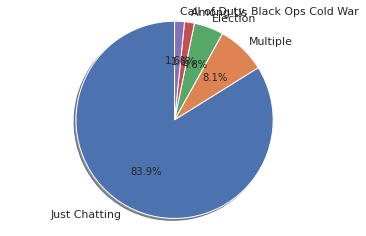

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(hasanpie.video_id, labels=hasanpie.game, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
print("Video breakdown by game:")
hasanabiVideos.groupby('game')[['duration_formatted']].sum().reset_index().sort_values(by=['duration_formatted'], ascending = False)

Video breakdown by game:


game duration_formatted
3                     Just Chatting   20 days 03:37:26
4                          Multiple    1 days 22:16:29
2                          Election    1 days 16:43:07
0                          Among Us    0 days 11:32:39
1  Call of Duty: Black Ops Cold War    0 days 09:35:53

In [ ]:
print("Video breakdown by game:")
hasanabiVideos.groupby('game')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video breakdown by game:


game  view_count
3                     Just Chatting    24040248
2                          Election    10287534
4                          Multiple     1741452
0                          Among Us     1307092
1  Call of Duty: Black Ops Cold War      336281

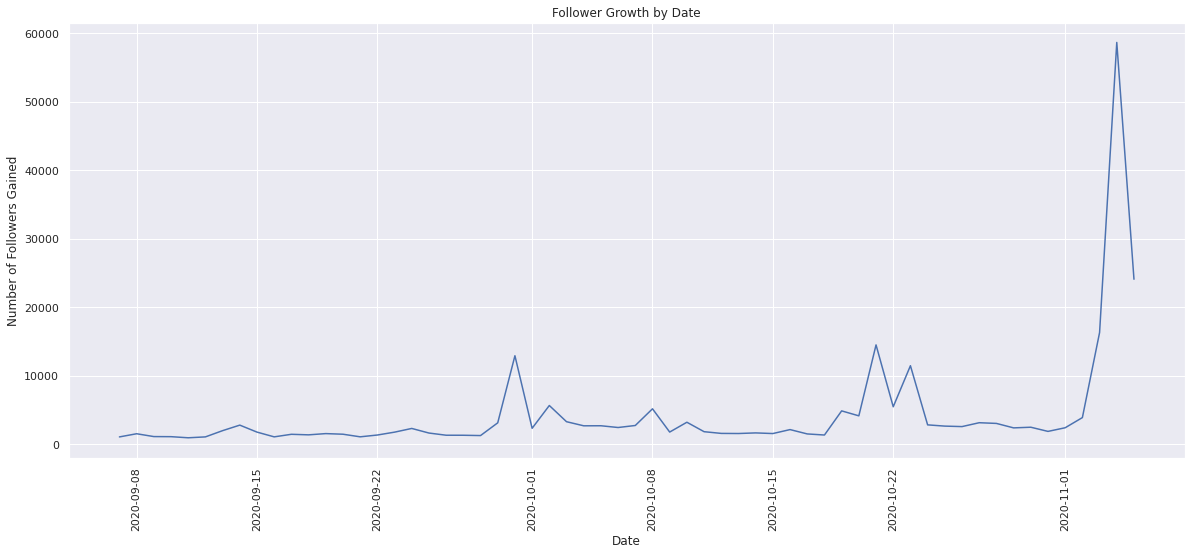

In [ ]:
followers_by_date(hasanabiFollowers)

In [ ]:
hasanabiFollowers.groupby('date')[['to_id']].count()

to_id
date             
2020-09-07   1106
2020-09-08   1568
2020-09-09   1155
2020-09-10   1141
2020-09-11    979
2020-09-12   1109
2020-09-13   2020
2020-09-14   2826
2020-09-15   1807
2020-09-16   1114
2020-09-17   1488
2020-09-18   1408
2020-09-19   1589
2020-09-20   1499
2020-09-21   1119
2020-09-22   1382
2020-09-23   1801
2020-09-24   2342
2020-09-25   1671
2020-09-26   1352
2020-09-27   1348
2020-09-28   1303
2020-09-29   3162
2020-09-30  12952
2020-10-01   2365
2020-10-02   5689
2020-10-03   3326
2020-10-04   2727
2020-10-05   2734
2020-10-06   2478
2020-10-07   2773
2020-10-08   5207
2020-10-09   1814
2020-10-10   3247
2020-10-11   1868
2020-10-12   1618
2020-10-13   1602
2020-10-14   1690
2020-10-15   1597
2020-10-16   2175
2020-10-17   1541
2020-10-18   1382
2020-10-19   4904
2020-10-20   4181
2020-10-21  14533
2020-10-22   5504
2020-10-23  11496
2020-10-24   2864
2020-10-25   2682
2020-10-26   2612
2020-10-27   3177
2020-10-28   3075
2020-10-29   2424
2020-10-30   2520
2020-10-31   1911
2020-11-01   2443
2020-11-02   3925
2020-11-03  16334
2020-11-04  58667
2020-11-05  24113

In [ ]:
print((16334+58667+24113)/len(hasanabiFollowers)* 100)

37.76649049874447


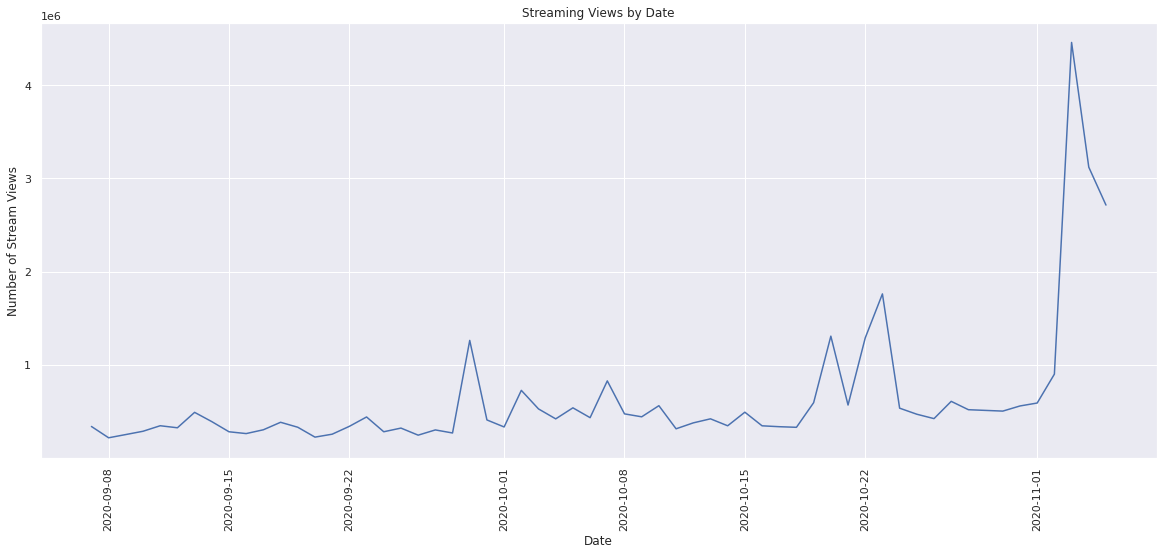

In [ ]:
views_by_date(hasanabiVideos)

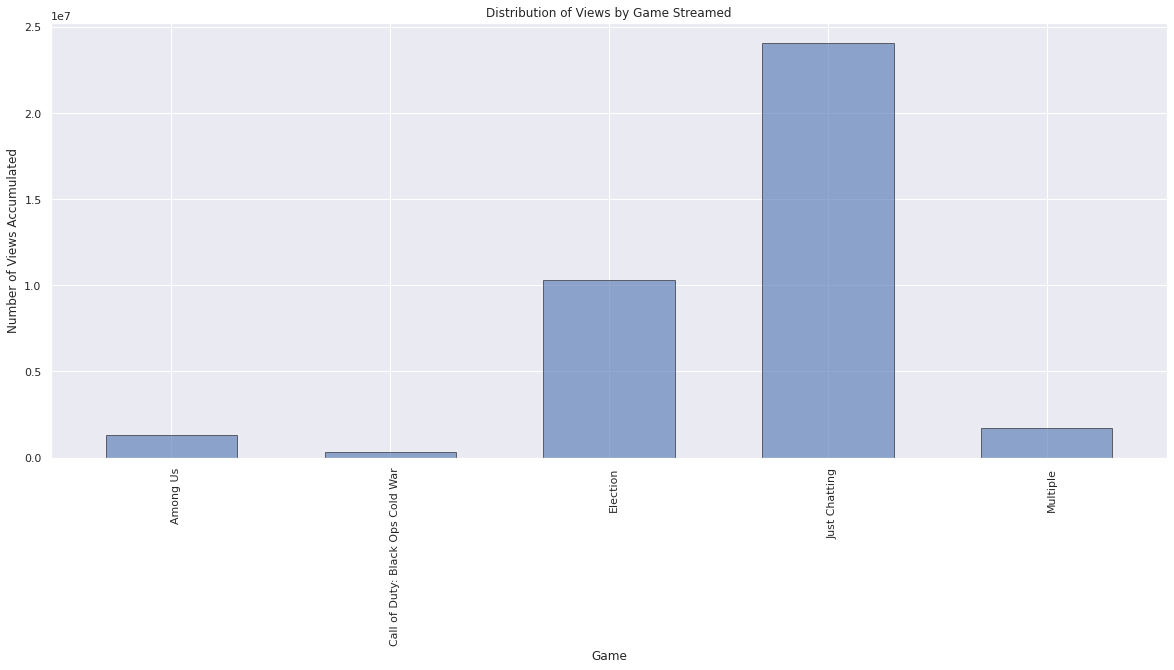

In [ ]:
view_dist_by_game(hasanabiVideos)

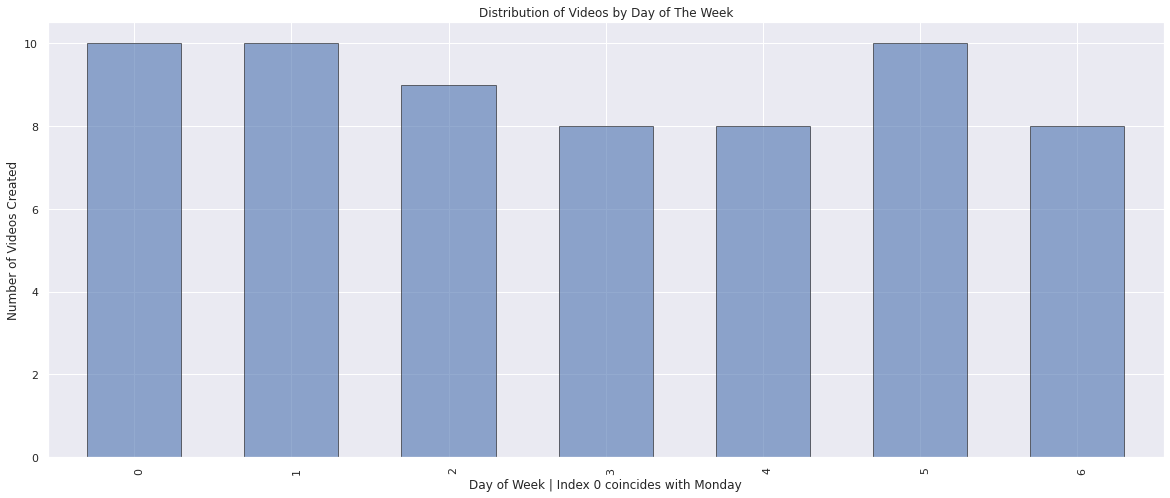

In [ ]:
video_dist_by_dow(hasanabiVideos)

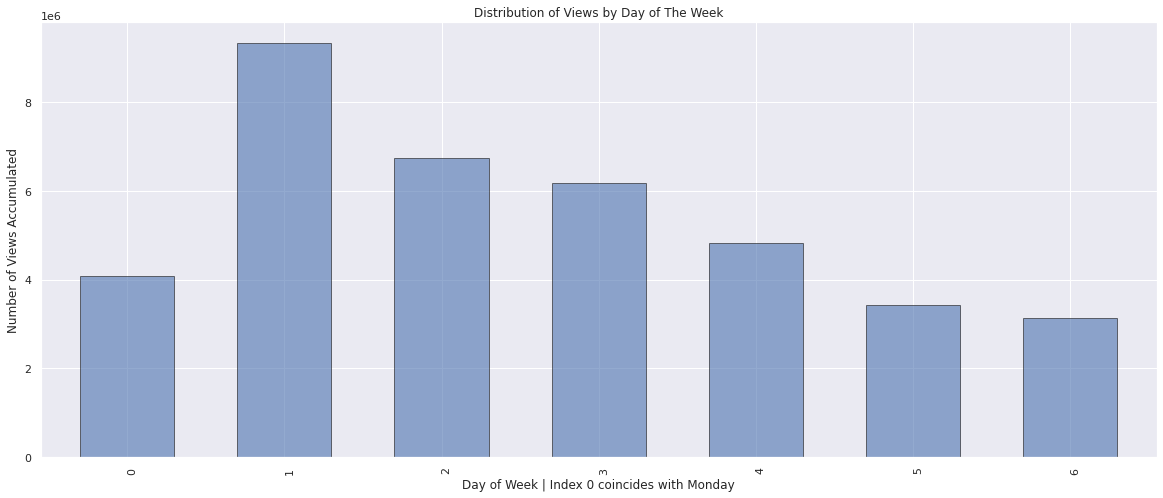

In [ ]:
view_dist_by_day(hasanabiVideos)

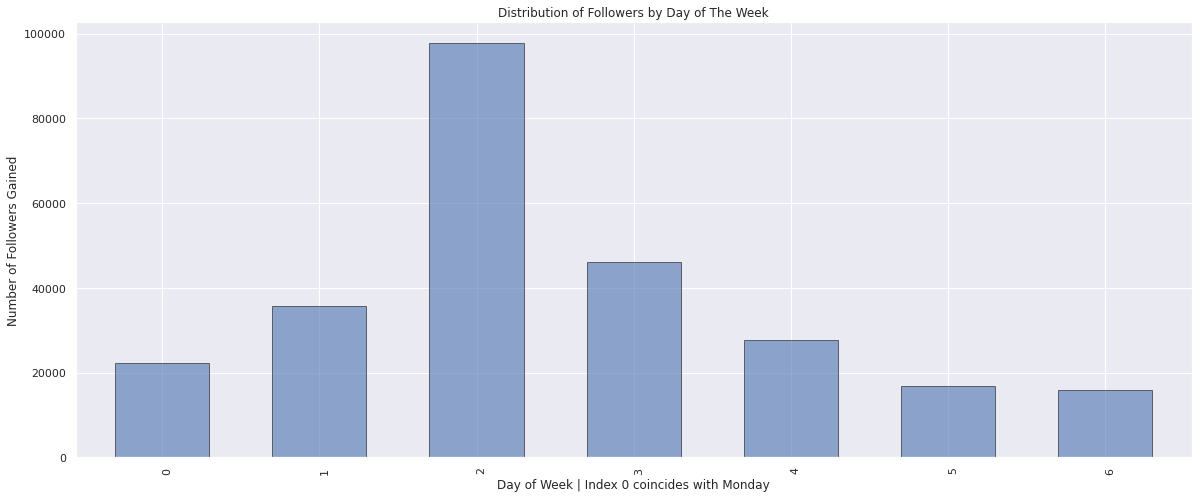

In [ ]:
follower_dist_by_day(hasanabiFollowers)

Note: scope begins on week 37 - 09/07/2020


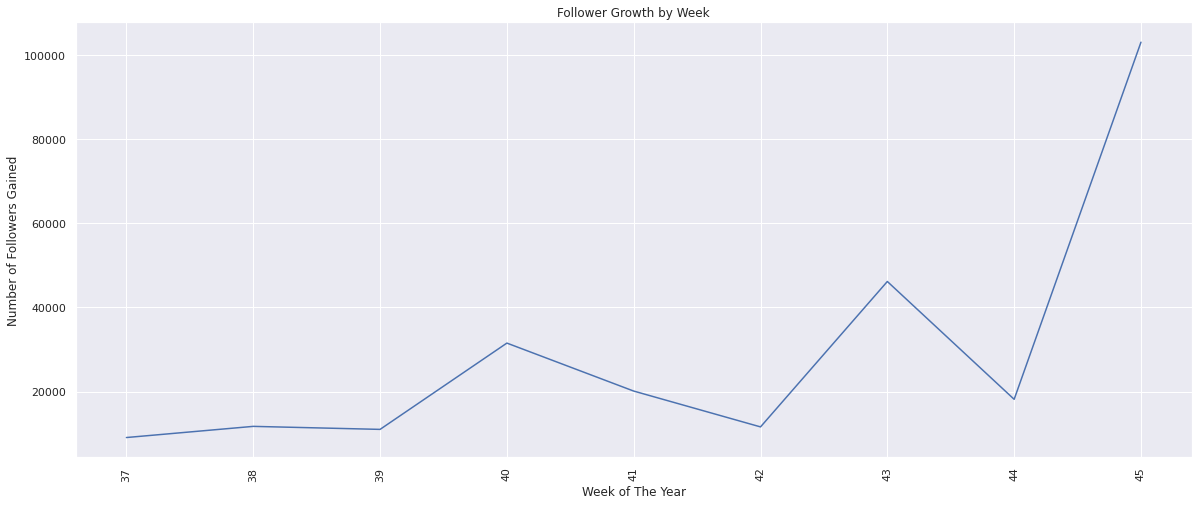

In [ ]:
followers_by_week(hasanabiFollowers)

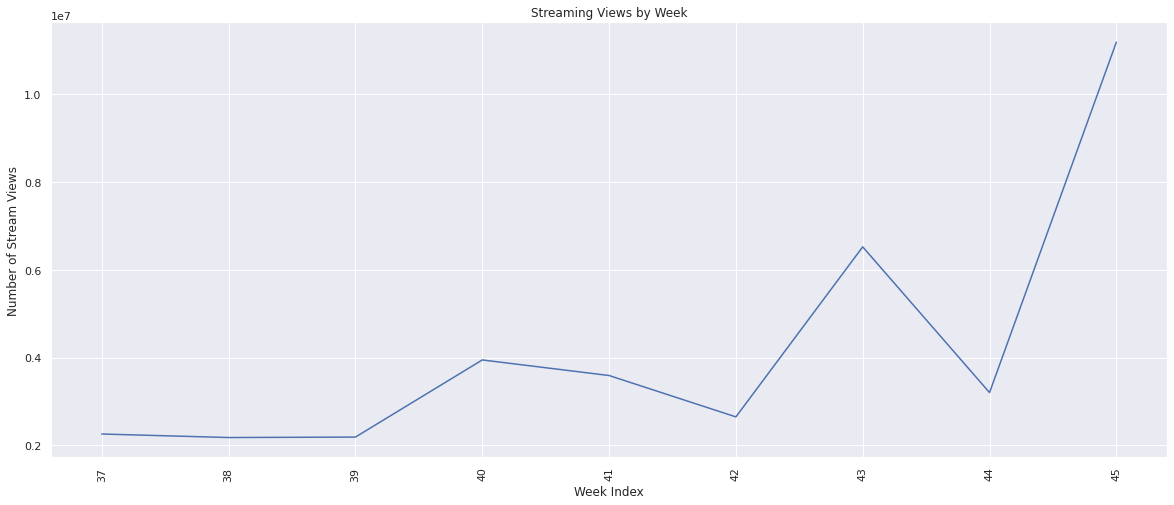

In [ ]:
views_by_week(hasanabiVideos)

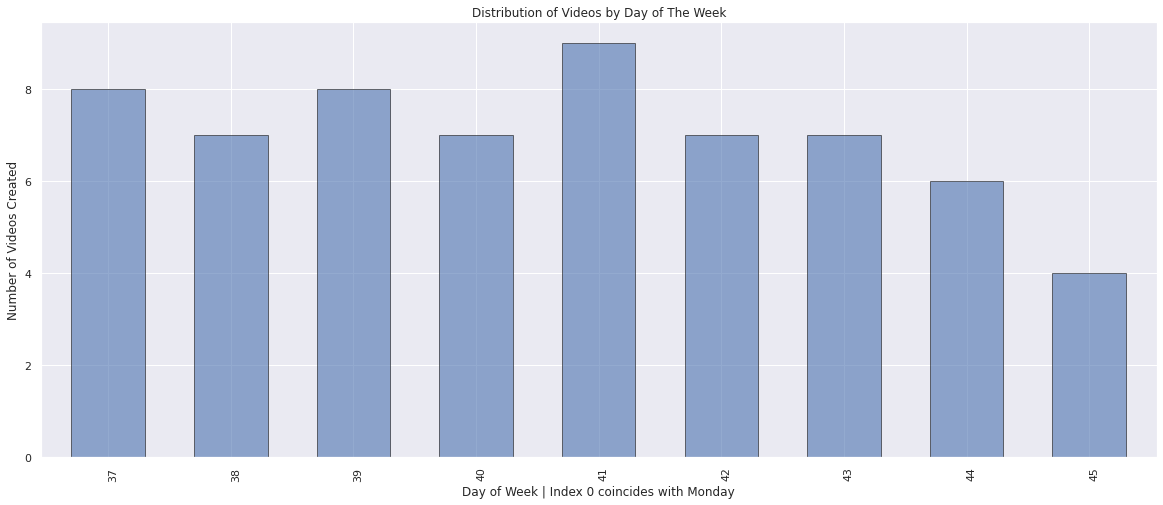

In [ ]:
video_dist_by_week(hasanabiVideos)

In [ ]:
print("Over the last 2 months, HasanAbi's average Monday follower count increased on average by:", (22147/len(hasanabiFollowers))*100)
print("Over the last 2 months, HasanAbi's average Tuesday follower count increased on average by:", (35691/len(hasanabiFollowers))*100)
print("Over the last 2 months, HasanAbi's average Wednesday follower count increased on average by:", (97760/len(hasanabiFollowers))*100)
print("Over the last 2 months, HasanAbi's average Thursday follower count increased on average by:", (46181/len(hasanabiFollowers))*100)
print("Over the last 2 months, HasanAbi's average Friday follower count increased on average by:", (27752/len(hasanabiFollowers))*100)
print("Over the last 2 months, HasanAbi's average Saturday follower count increased on average by:", (16939/len(hasanabiFollowers))*100)
print("Over the last 2 months, HasanAbi's average Sunday follower count increased on average by:", (15969/len(hasanabiFollowers))*100)
hasanabiFollowers.groupby('day')[['to_name']].count()

Over the last 2 months, HasanAbi's average Monday follower count increased on average by: 8.438913423690838
Over the last 2 months, HasanAbi's average Tuesday follower count increased on average by: 13.599731747186967
Over the last 2 months, HasanAbi's average Wednesday follower count increased on average by: 37.2505610827659
Over the last 2 months, HasanAbi's average Thursday follower count increased on average by: 17.596851077774264
Over the last 2 months, HasanAbi's average Friday follower count increased on average by: 10.57464782292266
Over the last 2 months, HasanAbi's average Saturday follower count increased on average by: 6.454452272718612
Over the last 2 months, HasanAbi's average Sunday follower count increased on average by: 6.08484257294076


to_name
day         
0      22147
1      35691
2      97760
3      46181
4      27752
5      16939
6      15969

In [ ]:
haf = hasanabiFollowers.copy()
haf = haf.groupby('date')[['to_name']].count().reset_index()
haf = haf.rename(columns={'to_name':'count_followers'})
haf.head()

date  count_followers
0 2020-09-07             1106
1 2020-09-08             1568
2 2020-09-09             1155
3 2020-09-10             1141
4 2020-09-11              979

In [ ]:
hav = hasanabiVideos.copy()
hav = hav.groupby('date')[['view_count']].sum().reset_index()
hav.head()

date  view_count
0 2020-09-07      338722
1 2020-09-08      217457
2 2020-09-09      252188
3 2020-09-10      287412
4 2020-09-11      346577

In [ ]:
hag = hasanabiVideos.copy()
hag = hag.groupby(['date','game'])[['video_id']].count().reset_index()
hag.head()

date           game  video_id
0 2020-09-07  Just Chatting         1
1 2020-09-08  Just Chatting         1
2 2020-09-09  Just Chatting         1
3 2020-09-10  Just Chatting         1
4 2020-09-11  Just Chatting         1

In [ ]:
havhaf = pd.merge(haf,hav)
havhaf

date  count_followers  view_count
0  2020-09-07             1106      338722
1  2020-09-08             1568      217457
2  2020-09-09             1155      252188
3  2020-09-10             1141      287412
4  2020-09-11              979      346577
5  2020-09-12             1109      324735
6  2020-09-13             2020      490080
7  2020-09-14             2826      390730
8  2020-09-15             1807      281919
9  2020-09-16             1114      262504
10 2020-09-17             1488      303356
11 2020-09-18             1408      383670
12 2020-09-19             1589      330434
13 2020-09-20             1499      224525
14 2020-09-21             1119      255918
15 2020-09-22             1382      340203
16 2020-09-23             1801      440617
17 2020-09-24             2342      282060
18 2020-09-25             1671      321441
19 2020-09-26             1352      245608
20 2020-09-27             1348      301698
21 2020-09-28             1303      268885
22 2020-09-29             3162     1261382
23 2020-09-30            12952      408784
24 2020-10-01             2365      333397
25 2020-10-02             5689      725857
26 2020-10-03             3326      526757
27 2020-10-04             2727      420258
28 2020-10-05             2734      538532
29 2020-10-06             2478      433117
30 2020-10-07             2773      827352
31 2020-10-08             5207      473852
32 2020-10-09             1814      442337
33 2020-10-10             3247      561580
34 2020-10-11             1868      313769
35 2020-10-12             1618      377260
36 2020-10-13             1602      420700
37 2020-10-14             1690      346088
38 2020-10-15             1597      491841
39 2020-10-16             2175      345860
40 2020-10-17             1541      336281
41 2020-10-18             1382      329781
42 2020-10-19             4904      594004
43 2020-10-20             4181     1307092
44 2020-10-21            14533      568482
45 2020-10-22             5504     1288312
46 2020-10-23            11496     1760101
47 2020-10-24             2864      534906
48 2020-10-25             2682      470022
49 2020-10-26             2612      422902
50 2020-10-27             3177      608012
51 2020-10-28             3075      518505
52 2020-10-30             2520      503503
53 2020-10-31             1911      558620
54 2020-11-01             2443      590134
55 2020-11-02             3925      899836
56 2020-11-03            16334     4456107
57 2020-11-04            58667     3118966
58 2020-11-05            24113     2712461

In [ ]:
hafhag = pd.merge(haf,hag)
hafhaghav = pd.merge(hafhag,hav)
hafhaghav['sum_follow_view'] = hafhaghav.apply(lambda x: x['count_followers'] + x['view_count'], axis=1)
hafhaghav.sort_values(by='sum_follow_view', ascending = False)

date  count_followers  ... view_count  sum_follow_view
56 2020-11-03            16334  ...    4456107          4472441
57 2020-11-04            58667  ...    3118966          3177633
58 2020-11-05            24113  ...    2712461          2736574
46 2020-10-23            11496  ...    1760101          1771597
43 2020-10-20             4181  ...    1307092          1311273
45 2020-10-22             5504  ...    1288312          1293816
22 2020-09-29             3162  ...    1261382          1264544
55 2020-11-02             3925  ...     899836           903761
30 2020-10-07             2773  ...     827352           830125
25 2020-10-02             5689  ...     725857           731546
50 2020-10-27             3177  ...     608012           611189
42 2020-10-19             4904  ...     594004           598908
54 2020-11-01             2443  ...     590134           592577
44 2020-10-21            14533  ...     568482           583015
33 2020-10-10             3247  ...     561580           564827
53 2020-10-31             1911  ...     558620           560531
28 2020-10-05             2734  ...     538532           541266
47 2020-10-24             2864  ...     534906           537770
26 2020-10-03             3326  ...     526757           530083
51 2020-10-28             3075  ...     518505           521580
52 2020-10-30             2520  ...     503503           506023
38 2020-10-15             1597  ...     491841           493438
6  2020-09-13             2020  ...     490080           492100
31 2020-10-08             5207  ...     473852           479059
48 2020-10-25             2682  ...     470022           472704
32 2020-10-09             1814  ...     442337           444151
16 2020-09-23             1801  ...     440617           442418
29 2020-10-06             2478  ...     433117           435595
49 2020-10-26             2612  ...     422902           425514
27 2020-10-04             2727  ...     420258           422985
36 2020-10-13             1602  ...     420700           422302
23 2020-09-30            12952  ...     408784           421736
7  2020-09-14             2826  ...     390730           393556
11 2020-09-18             1408  ...     383670           385078
35 2020-10-12             1618  ...     377260           378878
39 2020-10-16             2175  ...     345860           348035
37 2020-10-14             1690  ...     346088           347778
4  2020-09-11              979  ...     346577           347556
15 2020-09-22             1382  ...     340203           341585
0  2020-09-07             1106  ...     338722           339828
40 2020-10-17             1541  ...     336281           337822
24 2020-10-01             2365  ...     333397           335762
12 2020-09-19             1589  ...     330434           332023
41 2020-10-18             1382  ...     329781           331163
5  2020-09-12             1109  ...     324735           325844
18 2020-09-25             1671  ...     321441           323112
34 2020-10-11             1868  ...     313769           315637
10 2020-09-17             1488  ...     303356           304844
20 2020-09-27             1348  ...     301698           303046
3  2020-09-10             1141  ...     287412           288553
17 2020-09-24             2342  ...     282060           284402
8  2020-09-15             1807  ...     281919           283726
21 2020-09-28             1303  ...     268885           270188
9  2020-09-16             1114  ...     262504           263618
14 2020-09-21             1119  ...     255918           257037
2  2020-09-09             1155  ...     252188           253343
19 2020-09-26             1352  ...     245608           246960
13 2020-09-20             1499  ...     224525           226024
1  2020-09-08             1568  ...     217457           219025

[59 rows x 6 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data, kind. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


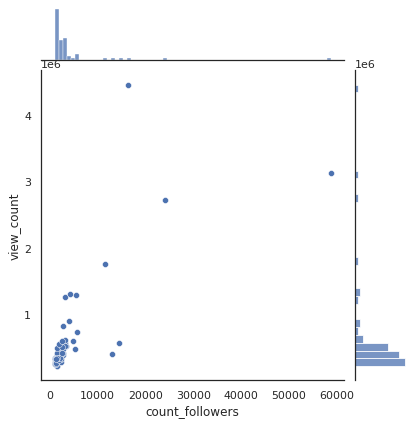

In [ ]:
follower_view_joint_scatter_bydate(havhaf)

Burak Work

In [ ]:
a = hasanabiFollowers.groupby(['followed_at','day']).size().reset_index(name='Count')
a.sort_values(ascending=False,by='followed_at',inplace=True)
a.head(3)

followed_at  day  Count
216253 2020-11-05 23:59:59+00:00    3      1
216252 2020-11-05 23:59:58+00:00    3      2
216251 2020-11-05 23:59:56+00:00    3      1

In [ ]:
hasanabiFollowers.value_counts('day')

day
2    97760
3    46181
1    35691
4    27752
0    22147
5    16939
6    15969
dtype: int64

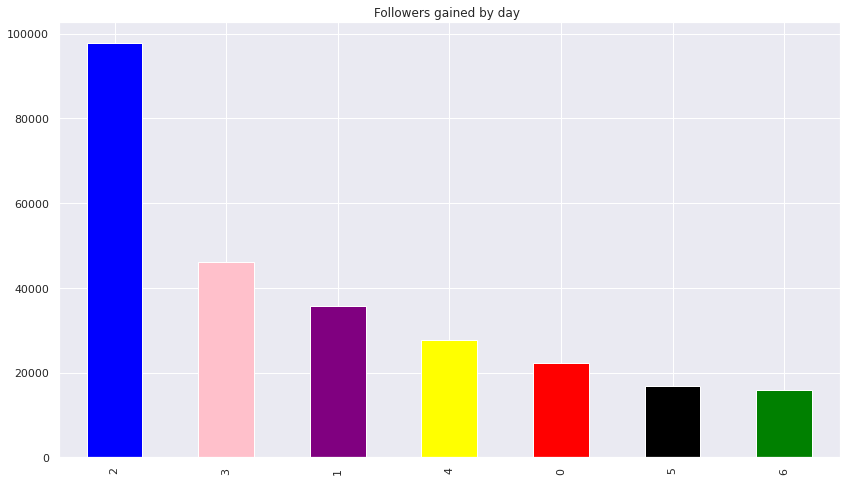

In [ ]:
color = ['blue', 'pink', 'purple', 'yellow','red','black','green']
hasanabiFollowers['day'].value_counts().plot(kind='bar', figsize=(14,8), color = color, title='Followers gained by day ')

The most followers are gained on the day 2.

In [ ]:
hasanabiFollowers.value_counts('week')

week
45    103039
43     46164
40     31524
41     20121
44     18162
38     11731
42     11605
39     11015
37      9078
dtype: int64

The most followers are gained in the 45th week.

Note: scope begins on week 37 - 09/07/2020


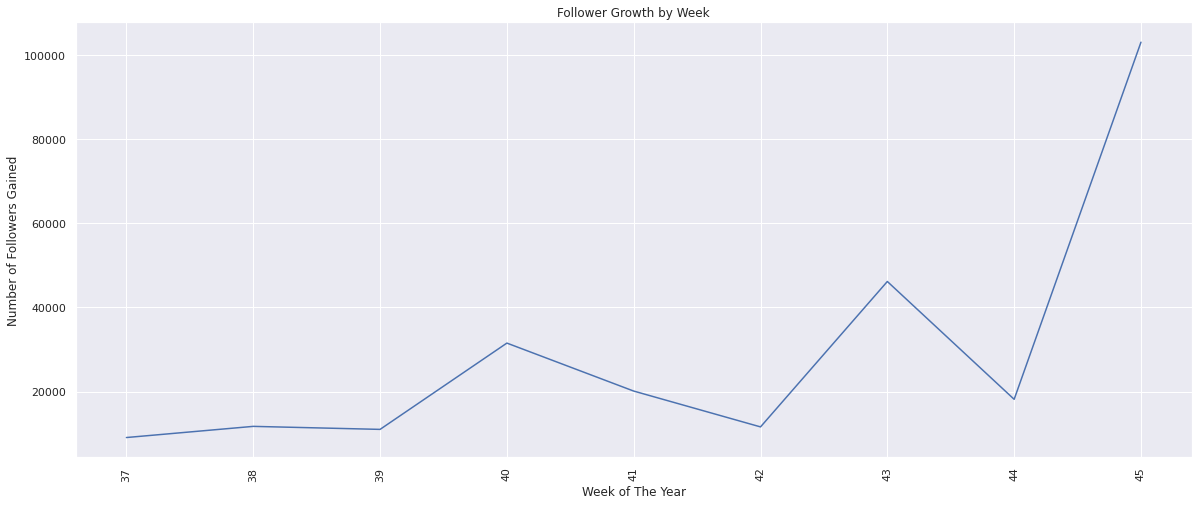

In [ ]:
followers_by_week(hasanabiFollowers)

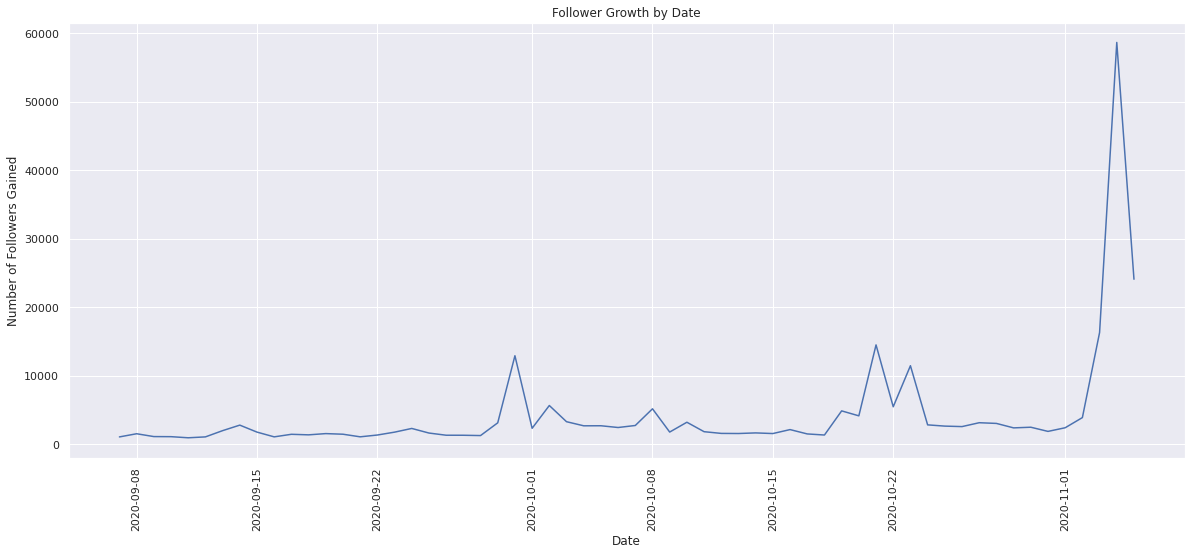

In [ ]:
followers_by_date(hasanabiFollowers)

In [ ]:
HasanAbiVideos = userVideos.copy() 
HasanAbiVideos['HasanAbi'] = (HasanAbiVideos['user_name'] == 'HasanAbi')
HasanAbiVideos = HasanAbiVideos[HasanAbiVideos.HasanAbi==True]
HasanAbiVideos.head()

video_id    user_id user_name  ...  ss  duration_formatted HasanAbi
3   792929082  207813352  HasanAbi  ...  26     0 days 12:49:26     True
8   791917048  207813352  HasanAbi  ...  06     0 days 11:52:06     True
20  790951798  207813352  HasanAbi  ...  35     0 days 16:01:35     True
31  789942541  207813352  HasanAbi  ...  18     0 days 11:35:18     True
38  789029762  207813352  HasanAbi  ...  54     0 days 10:45:54     True

[5 rows x 21 columns]

In [ ]:
HasanAbiVideos[['title','url','date','view_count','duration_formatted']].sort_values(by='date', ascending= False)[:12]

title  ... duration_formatted
3   2020 US PRESIDENTIAL ELECTION - BEDLAM- DAY 3 ...  ...    0 days 12:49:26
8              2020 US PRESIDENTIAL ELECTION - BEDLAM  ...    0 days 11:52:06
20  2020 US PRESIDENTIAL ELECTION - BEDLAM IS UPON...  ...    0 days 16:01:35
31                              24 HOURS UNTIL BEDLAM  ...    0 days 11:35:18
38                                2 DAYS UNTIL BEDLAM  ...    0 days 10:45:54
43      3 DAYS UNTIL BEDLAM (HALLOWEEN SCARY GAME TN)  ...    0 days 11:16:44
51                                4 DAYS UNTIL BEDLAM  ...    0 days 09:32:14
68                               6 DAYS UNTIL THE END  ...    0 days 10:50:10
76  TUESDAY: DEMOCRACY IS DYIING THE ANIMALS ARE L...  ...    0 days 10:59:56
82  MONDAY BACK TO THE NEWS (RUNNING A BIT LATE SE...  ...    0 days 08:14:48
90                             SUNDAY FUNDAY POGGGGGG  ...    0 days 08:36:04
97                    JOE ROGAN KANYE CONTENT BONANZA  ...    0 days 09:03:47

[12 rows x 5 columns]

In [ ]:
print("Over the last 2 months, hasanabi's average Monday follower count increased on average by:", (22147/len(hasanabiFollowers))*100)
print("Over the last 2 months, hasanabi's average Tuesday follower count increased on average by:", (35691/len(hasanabiFollowers))*100)
print("Over the last 2 months, hasanabi's average Wednesday follower count increased on average by:", (97760/len(hasanabiFollowers))*100)
print("Over the last 2 months, hasanabi's average Thursday follower count increased on average by:", (46181/len(hasanabiFollowers))*100)
print("Over the last 2 months, hasanabi's average Friday follower count increased on average by:", (27752/len(hasanabiFollowers))*100)
print("Over the last 2 months, hasanabi's average Saturday follower count increased on average by:", (16939/len(hasanabiFollowers))*100)
print("Over the last 2 months, hasanabi's average Sunday follower count increased on average by:", (15969/len(hasanabiFollowers))*100)
hasanabiFollowers.groupby('day')[['to_name']].count()

Over the last 2 months, hasanabi's average Monday follower count increased on average by: 8.438913423690838
Over the last 2 months, hasanabi's average Tuesday follower count increased on average by: 13.599731747186967
Over the last 2 months, hasanabi's average Wednesday follower count increased on average by: 37.2505610827659
Over the last 2 months, hasanabi's average Thursday follower count increased on average by: 17.596851077774264
Over the last 2 months, hasanabi's average Friday follower count increased on average by: 10.57464782292266
Over the last 2 months, hasanabi's average Saturday follower count increased on average by: 6.454452272718612
Over the last 2 months, hasanabi's average Sunday follower count increased on average by: 6.08484257294076


to_name
day         
0      22147
1      35691
2      97760
3      46181
4      27752
5      16939
6      15969

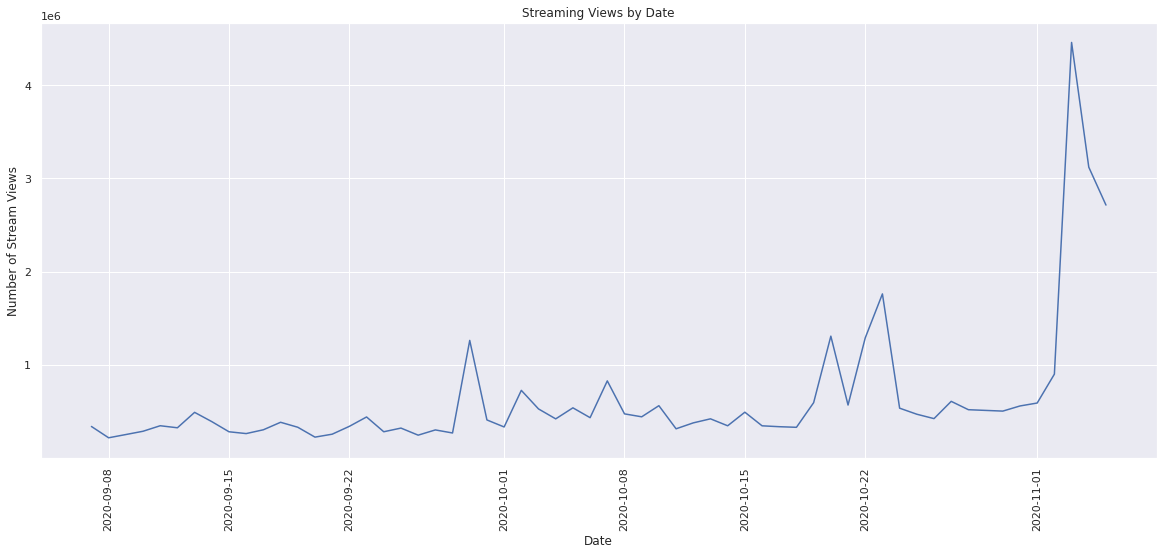

In [ ]:
views_by_date(HasanAbiVideos)

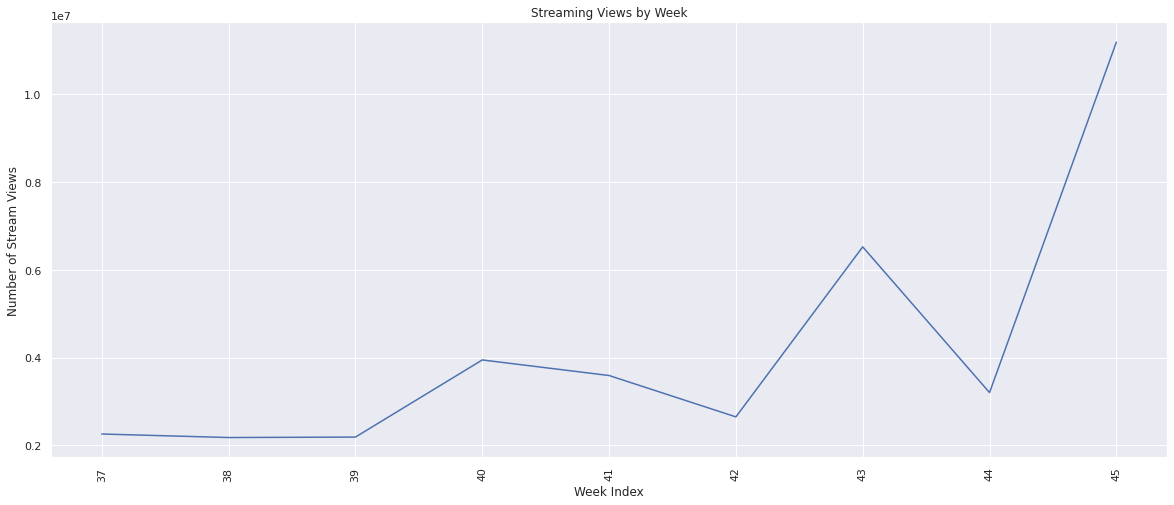

In [ ]:
views_by_week(HasanAbiVideos)

In [ ]:
a = HasanAbiVideos.groupby(['view_count','created_at']).size().reset_index(name='Count')
a.sort_values(ascending=False,by='view_count',inplace=True)
a.head()

view_count                created_at  Count
62     4456107 2020-11-03 19:02:38+00:00      1
61     3118966 2020-11-04 19:01:31+00:00      1
60     2712461 2020-11-05 19:03:01+00:00      1
59     1760101 2020-10-23 18:32:47+00:00      1
58     1307092 2020-10-20 18:28:51+00:00      1

In [ ]:
a["created_at"] = pd.to_datetime(a["created_at"], format='%Y-%m-%d %H:%M:%S')
a["intervals"] = a["created_at"].apply(lambda x:str(x.hour)+"-"+str(x.hour+1))
a.head(10)

view_count                created_at  Count intervals
62     4456107 2020-11-03 19:02:38+00:00      1     19-20
61     3118966 2020-11-04 19:01:31+00:00      1     19-20
60     2712461 2020-11-05 19:03:01+00:00      1     19-20
59     1760101 2020-10-23 18:32:47+00:00      1     18-19
58     1307092 2020-10-20 18:28:51+00:00      1     18-19
57     1288312 2020-10-22 18:23:22+00:00      1     18-19
56     1261382 2020-09-29 18:01:06+00:00      1     18-19
55      899836 2020-11-02 18:53:48+00:00      1     18-19
54      827352 2020-10-07 18:04:55+00:00      1     18-19
53      725857 2020-10-02 17:52:36+00:00      1     17-18

In [ ]:
a.value_counts('intervals')

intervals
18-19    41
17-18    10
19-20     7
21-22     2
20-21     2
23-24     1
dtype: int64

In [ ]:
a['view_count'].loc[a['intervals'] == "17-18"].sum()

4130126

In [ ]:
# view count average of 17-18
4130126 / 10

413012.6

In [ ]:
a['view_count'].loc[a['intervals'] == "18-19"].sum()

20852280

In [ ]:
# view count average of 18-19
20852280 / 41

508592.1951219512

In [ ]:
a['view_count'].loc[a['intervals'] == "19-20"].sum()

11945353

In [ ]:
# view count average of 19-20
11945353/7

1706479.0

In [ ]:
a['view_count'].loc[a['intervals'] == "20-21"].sum()

437118

In [ ]:
# view count average of 20-21
437118/2

218559.0

In [ ]:
a['view_count'].loc[a['intervals'] == "21-22"].sum()

217457

In [ ]:
# view count average of 21-22
217457/2

108728.5

In [ ]:
a['view_count'].loc[a['intervals'] == "23-24"].sum()

135155

In [ ]:
# view count average of 23-24
135155/1

135155.0

According to the averages, we can say that it gets the most watch between 19-20.


In [ ]:
b = HasanAbiVideos.groupby(['view_count','created_at','day']).size().reset_index(name='Count')
b.sort_values(ascending=False,by='view_count',inplace=True)
b.head(10)

view_count                created_at  day  Count
62     4456107 2020-11-03 19:02:38+00:00    1      1
61     3118966 2020-11-04 19:01:31+00:00    2      1
60     2712461 2020-11-05 19:03:01+00:00    3      1
59     1760101 2020-10-23 18:32:47+00:00    4      1
58     1307092 2020-10-20 18:28:51+00:00    1      1
57     1288312 2020-10-22 18:23:22+00:00    3      1
56     1261382 2020-09-29 18:01:06+00:00    1      1
55      899836 2020-11-02 18:53:48+00:00    0      1
54      827352 2020-10-07 18:04:55+00:00    2      1
53      725857 2020-10-02 17:52:36+00:00    4      1

In [ ]:
HasanAbiVideos.value_counts('type')

type
archive      62
highlight     1
dtype: int64

In [ ]:
HasanAbiVideos.groupby('type')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending=False)

duration_formatted
type                        
archive     24 days 15:45:34
highlight    0 days 02:55:02

In [ ]:
HasanAbiVideos.duration_formatted.sum()

Timedelta('24 days 18:40:36')

In [ ]:
HasanAbiVideos.groupby('type')[['view_count']].sum().sort_values(by=['view_count'], ascending=False)

view_count
type                 
archive      37712607
highlight        4882

In [ ]:
#take followers copy & views copy and merge together by dow/week index then do chart below to look at correlation
hf = hasanabiFollowers.copy()
hf = hf.groupby('date')[['to_name']].count().reset_index()
hf = hf.rename(columns={'to_name':'count_followers'})
hf.head()

date  count_followers
0 2020-09-07             1106
1 2020-09-08             1568
2 2020-09-09             1155
3 2020-09-10             1141
4 2020-09-11              979

In [ ]:
hv = hasanabiVideos.copy()
hv = hv.groupby('date')[['view_count']].sum().reset_index()
hv.head()

date  view_count
0 2020-09-07      338722
1 2020-09-08      217457
2 2020-09-09      252188
3 2020-09-10      287412
4 2020-09-11      346577

In [ ]:
hvhf = pd.merge(hf,hv)
hvhf

date  count_followers  view_count
0  2020-09-07             1106      338722
1  2020-09-08             1568      217457
2  2020-09-09             1155      252188
3  2020-09-10             1141      287412
4  2020-09-11              979      346577
5  2020-09-12             1109      324735
6  2020-09-13             2020      490080
7  2020-09-14             2826      390730
8  2020-09-15             1807      281919
9  2020-09-16             1114      262504
10 2020-09-17             1488      303356
11 2020-09-18             1408      383670
12 2020-09-19             1589      330434
13 2020-09-20             1499      224525
14 2020-09-21             1119      255918
15 2020-09-22             1382      340203
16 2020-09-23             1801      440617
17 2020-09-24             2342      282060
18 2020-09-25             1671      321441
19 2020-09-26             1352      245608
20 2020-09-27             1348      301698
21 2020-09-28             1303      268885
22 2020-09-29             3162     1261382
23 2020-09-30            12952      408784
24 2020-10-01             2365      333397
25 2020-10-02             5689      725857
26 2020-10-03             3326      526757
27 2020-10-04             2727      420258
28 2020-10-05             2734      538532
29 2020-10-06             2478      433117
30 2020-10-07             2773      827352
31 2020-10-08             5207      473852
32 2020-10-09             1814      442337
33 2020-10-10             3247      561580
34 2020-10-11             1868      313769
35 2020-10-12             1618      377260
36 2020-10-13             1602      420700
37 2020-10-14             1690      346088
38 2020-10-15             1597      491841
39 2020-10-16             2175      345860
40 2020-10-17             1541      336281
41 2020-10-18             1382      329781
42 2020-10-19             4904      594004
43 2020-10-20             4181     1307092
44 2020-10-21            14533      568482
45 2020-10-22             5504     1288312
46 2020-10-23            11496     1760101
47 2020-10-24             2864      534906
48 2020-10-25             2682      470022
49 2020-10-26             2612      422902
50 2020-10-27             3177      608012
51 2020-10-28             3075      518505
52 2020-10-30             2520      503503
53 2020-10-31             1911      558620
54 2020-11-01             2443      590134
55 2020-11-02             3925      899836
56 2020-11-03            16334     4456107
57 2020-11-04            58667     3118966
58 2020-11-05            24113     2712461

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data, kind. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


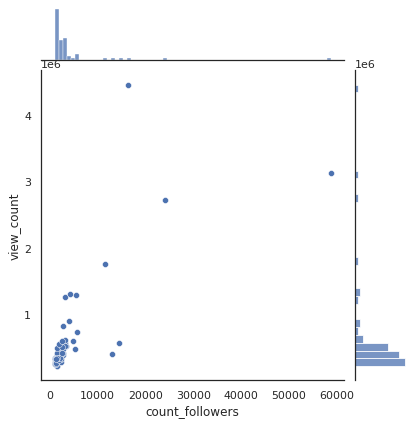

In [ ]:
follower_view_joint_scatter_bydate(hvhf)

[]

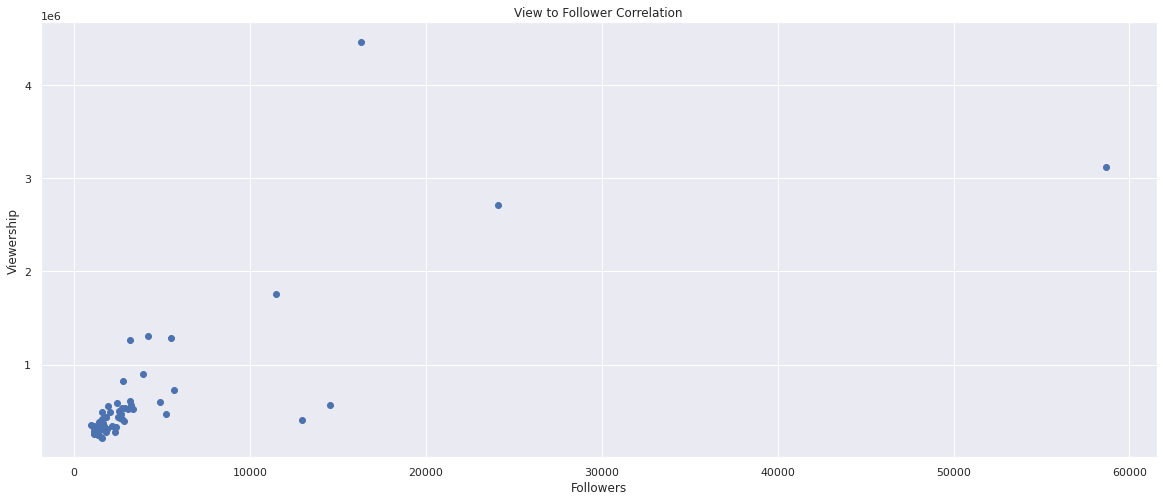

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(data=hvhf, x="count_followers", y="view_count")
plt.xlabel("Followers")
plt.ylabel("Viewership")
plt.title("View to Follower Correlation")
plt.plot()

# ChocoTaco's Twitch Performance Analysis

**ChocoTaco's Twitch Performance Analysis**

In [ ]:
chocoTacoUser = twitchUsers.copy() 
chocoTacoUser['chocoTaco'] = (chocoTacoUser['display_name'] == 'chocoTaco')
chocoTacoUser = chocoTacoUser[chocoTacoUser.chocoTaco==True]
chocoTacoUser.head()

id display_name  ... highlight_videos chocoTaco
5  69906737    chocoTaco  ...                1      True

[1 rows x 11 columns]

In [ ]:
chocotacoVideos = userVideos.copy() 
chocotacoVideos['chocoTaco'] = (chocotacoVideos['user_name'] == 'chocoTaco')
chocotacoVideos = chocotacoVideos[chocotacoVideos.chocoTaco==True]
chocotacoVideos.head()

video_id   user_id  user_name  ...  ss  duration_formatted chocoTaco
4   792823103  69906737  chocoTaco  ...  32     0 days 04:52:32      True
6   792266429  69906737  chocoTaco  ...  16     0 days 05:59:16      True
9   791809645  69906737  chocoTaco  ...  59     0 days 05:04:59      True
23  790838136  69906737  chocoTaco  ...  08     0 days 05:44:08      True
32  789931723  69906737  chocoTaco  ...  32     0 days 11:20:32      True

[5 rows x 21 columns]

In [ ]:
chocotacoFollowers.head()

from_id           from_name     to_id  ...       date day week
0  425162977         FEREZENDETV  69906737  ... 2020-11-05   3   45
1  604117837          remitrom92  69906737  ... 2020-11-05   3   45
2  577627354  sacredturkishpizza  69906737  ... 2020-11-05   3   45
3  601437799          redwan2610  69906737  ... 2020-11-05   3   45
4  404559583           by_murdok  69906737  ... 2020-11-05   3   45

[5 rows x 8 columns]

In [ ]:
print("chocoTaco's follower growth percentage over the span of the scope is:", (chocoTacoUser.gained_followers.sum()/chocoTacoUser.starting_followers.sum())*100)

chocoTaco's follower growth percentage over the span of the scope is: 2.7169199408604907


In [ ]:
chocotacoVideos['upper'] = chocotacoVideos['title'].str.isupper()
chocotacoVideos.groupby('upper')[['view_count']].sum().reset_index().sort_values(by='view_count',ascending=False)

upper  view_count
0  False     5275366

In [ ]:
chocotacoVideos.groupby('upper')[['user_id']].count().reset_index().sort_values(by='user_id',ascending=False)

upper  user_id
0  False       77

In [ ]:
print("the view to video ratio for videos where the title is NOT ENTIRELY upper case is:", 5275366/77)

the view to video ratio for videos where the title is NOT ENTIRELY upper case is: 68511.24675324676


In [ ]:
print("Followers breakdown by dow:")
chocotacoFollowers.groupby('day')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by dow:


day  to_id
1    1   5788
3    3   5576
4    4   5068
2    2   4942
0    0   4835
5    5   2840
6    6   1713

In [ ]:
print("Followers breakdown by week:")
chocotacoFollowers.groupby('week')[['to_id']].count().reset_index().sort_values(by='to_id',ascending=False)

Followers breakdown by week:


week  to_id
2    39   4628
0    37   4338
1    38   3961
3    40   3403
4    41   3276
6    43   3126
5    42   3074
7    44   2967
8    45   1989

In [ ]:
print("Sum of views across all videos for chocotaco:",chocotacoVideos.view_count.sum())
print("Video view breakdown by type:")
chocotacoVideos.groupby('type')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Sum of views across all videos for chocotaco: 5275366
Video view breakdown by type:


type  view_count
0    archive     5274153
1  highlight        1213

In [ ]:
print("Video view breakdown by dow:")
chocotacoVideos.groupby('day')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by dow:


day  view_count
5    5     1378739
1    1      855671
2    2      772358
0    0      764531
3    3      764413
4    4      739654

In [ ]:
print("Video view breakdown by week:")
chocotacoVideos.groupby('week')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

Video view breakdown by week:


week  view_count
2    39     1709108
1    38      579362
4    41      548687
5    42      535099
3    40      534458
6    43      502085
7    44      460085
8    45      365695
0    37       40787

In [ ]:
print("Average view count per video", ((5274153+1213)/77))
print("Average view count per highlight", (1213/1))
print("Average view count per stream", (5274153/76))

Average view count per video 68511.24675324676
Average view count per highlight 1213.0
Average view count per stream 69396.75


In [ ]:
print("Video breakdown by type:")
chocotacoVideos.groupby('type')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by type:


video_id
type               
archive          76
highlight         1

In [ ]:
print("Video breakdown by dow:")
chocotacoVideos.groupby('day')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by dow:


video_id
day          
2          15
4          15
1          14
3          14
0          11
5           8

In [ ]:
print("Video breakdown by week:")
chocotacoVideos.groupby('week')[['video_id']].count().sort_values(by=['video_id'], ascending = False)

Video breakdown by week:


video_id
week          
41          12
38          11
42          10
43          10
39           9
40           9
44           9
45           6
37           1

In [ ]:
print("Video duration breakdown by type:")
chocotacoVideos.groupby('type')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by type:


duration_formatted
type                        
archive     15 days 08:19:37
highlight    0 days 00:01:44

In [ ]:
print("Video duration breakdown by day:")
chocotacoVideos.groupby('day')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by day:


duration_formatted
day                   
1      3 days 03:27:43
3      3 days 00:13:41
2      2 days 21:45:02
4      2 days 16:13:31
0      2 days 08:36:05
5      1 days 06:05:19

In [ ]:
print("Video duration breakdown by week:")
chocotacoVideos.groupby('week')[['duration_formatted']].sum().sort_values(by=['duration_formatted'], ascending = False)

Video duration breakdown by week:


duration_formatted
week                   
41      2 days 00:34:38
40      2 days 00:16:06
38      2 days 00:01:04
39      1 days 23:00:51
42      1 days 22:16:41
44      1 days 20:46:50
43      1 days 18:57:44
45      1 days 14:13:46
37      0 days 04:13:41

In [ ]:
print("Video breakdown by game:")
chocotacoVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)

Video breakdown by game:


game  video_id
3               Multiple        29
4                   PUBG        29
0               Among Us         2
5           Plasmophobia         2
6               RL Craft         2
8          Rocket League         2
11  Star Wars: Squadrons         2
1   Call of Duty Warzone         1
2             Insurgency         1
7                   Raid         1
9                   Rust         1
10            Spelunky 2         1
12              Teardown         1
13        The Room Three         1
14              Valorant         1

In [ ]:
chacopie = chocotacoVideos.groupby('game')[['video_id']].count().reset_index().sort_values(by=['video_id'], ascending = False)

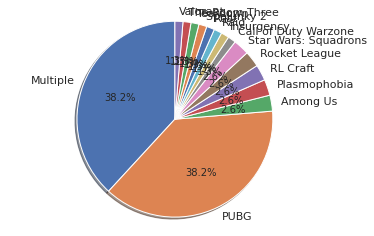

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(chacopie.video_id, labels=chacopie.game, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
chocotacoVideos.groupby('game')[['view_count']].sum().reset_index().sort_values(by=['view_count'], ascending = False)

game  view_count
3               Multiple     2609722
4                   PUBG     1884558
0               Among Us      122622
11  Star Wars: Squadrons       95252
5           Plasmophobia       81597
6               RL Craft       78290
7                   Raid       60596
2             Insurgency       50185
9                   Rust       45145
13        The Room Three       44575
12              Teardown       44119
1   Call of Duty Warzone       43446
14              Valorant       39415
8          Rocket League       38316
10            Spelunky 2       36315

In [ ]:
chocotacoVideos.groupby('game')[['duration_formatted']].sum().reset_index().sort_values(by=['duration_formatted'], ascending = False)

game duration_formatted
3               Multiple    6 days 03:08:04
4                   PUBG    5 days 19:41:35
11  Star Wars: Squadrons    0 days 09:45:24
6               RL Craft    0 days 09:34:48
0               Among Us    0 days 09:22:03
5           Plasmophobia    0 days 07:52:58
13        The Room Three    0 days 05:16:26
14              Valorant    0 days 05:12:47
12              Teardown    0 days 05:04:59
1   Call of Duty Warzone    0 days 05:00:04
2             Insurgency    0 days 04:56:55
10            Spelunky 2    0 days 04:54:35
7                   Raid    0 days 04:54:17
9                   Rust    0 days 04:52:32
8          Rocket League    0 days 04:42:10

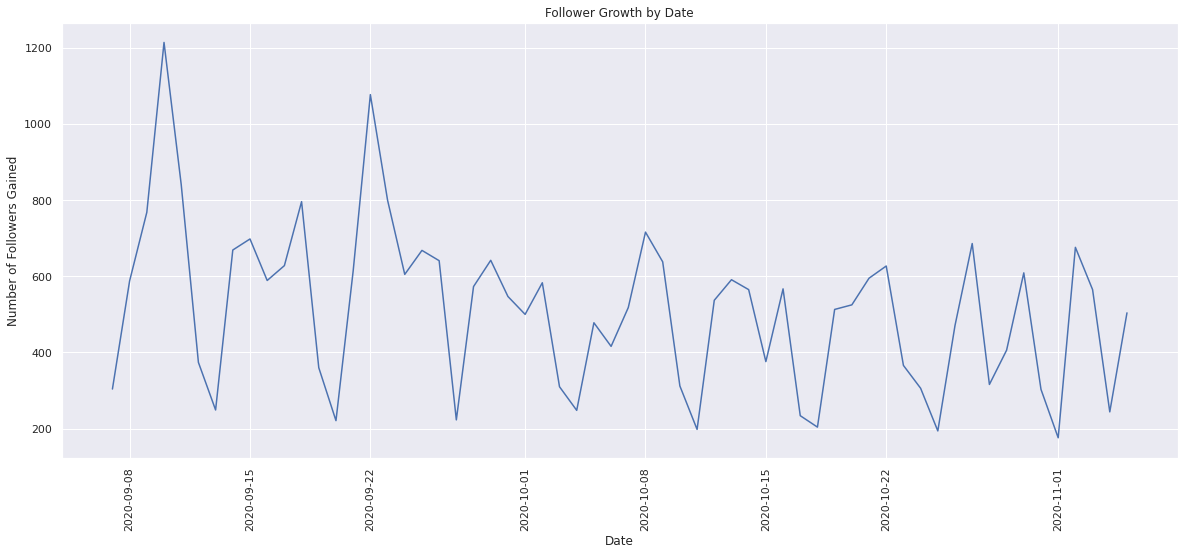

In [ ]:
followers_by_date(chocotacoFollowers)

In [ ]:
#Want to see if the dips in follower growth correlate to non streaming days > Yes..9/13,9/20,9/27,11/01,etc..
chocotacoVideos.groupby(['date','game'])[['user_id']].count().reset_index()

date                  game  user_id
0  2020-09-12              Multiple        1
1  2020-09-14              Multiple        1
2  2020-09-15              Multiple        1
3  2020-09-15                  PUBG        1
4  2020-09-16              Multiple        1
5  2020-09-16                  PUBG        1
6  2020-09-17              Among Us        1
7  2020-09-17                  PUBG        1
8  2020-09-18              Multiple        3
9  2020-09-19              Multiple        1
10 2020-09-21                  PUBG        1
11 2020-09-22                  PUBG        2
12 2020-09-23            Insurgency        1
13 2020-09-23                  PUBG        1
14 2020-09-24                  PUBG        1
15 2020-09-25              Multiple        1
16 2020-09-25                  PUBG        1
17 2020-09-26              Multiple        1
18 2020-09-28                  PUBG        1
19 2020-09-29              Multiple        1
20 2020-09-29                  PUBG        1
21 2020-09-30                  Raid        1
22 2020-10-01              Multiple        1
23 2020-10-01        The Room Three        1
24 2020-10-02              Multiple        1
25 2020-10-02  Star Wars: Squadrons        2
26 2020-10-05                  PUBG        1
27 2020-10-06  Call of Duty Warzone        1
28 2020-10-06            Spelunky 2        1
29 2020-10-07                  PUBG        1
30 2020-10-07          Plasmophobia        1
31 2020-10-08              Among Us        1
32 2020-10-08              Valorant        1
33 2020-10-09                  PUBG        3
34 2020-10-10              Multiple        1
35 2020-10-10                  PUBG        1
36 2020-10-12              Multiple        1
37 2020-10-12                  PUBG        1
38 2020-10-13                  PUBG        1
39 2020-10-14              Multiple        1
40 2020-10-14                  PUBG        1
41 2020-10-14          Plasmophobia        1
42 2020-10-15              Multiple        1
43 2020-10-16                  PUBG        2
44 2020-10-17              Multiple        1
45 2020-10-19                  PUBG        1
46 2020-10-20              Multiple        2
47 2020-10-21                  PUBG        1
48 2020-10-21         Rocket League        2
49 2020-10-22              Multiple        1
50 2020-10-22                  PUBG        1
51 2020-10-23              Multiple        1
52 2020-10-24                  PUBG        1
53 2020-10-26                  PUBG        1
54 2020-10-27              Multiple        2
55 2020-10-28              RL Craft        1
56 2020-10-29              Multiple        2
57 2020-10-30              RL Craft        1
58 2020-10-31                  PUBG        1
59 2020-11-02              Multiple        1
60 2020-11-02                  PUBG        1
61 2020-11-03              Multiple        1
62 2020-11-04              Teardown        1
63 2020-11-05              Multiple        1
64 2020-11-05                  Rust        1

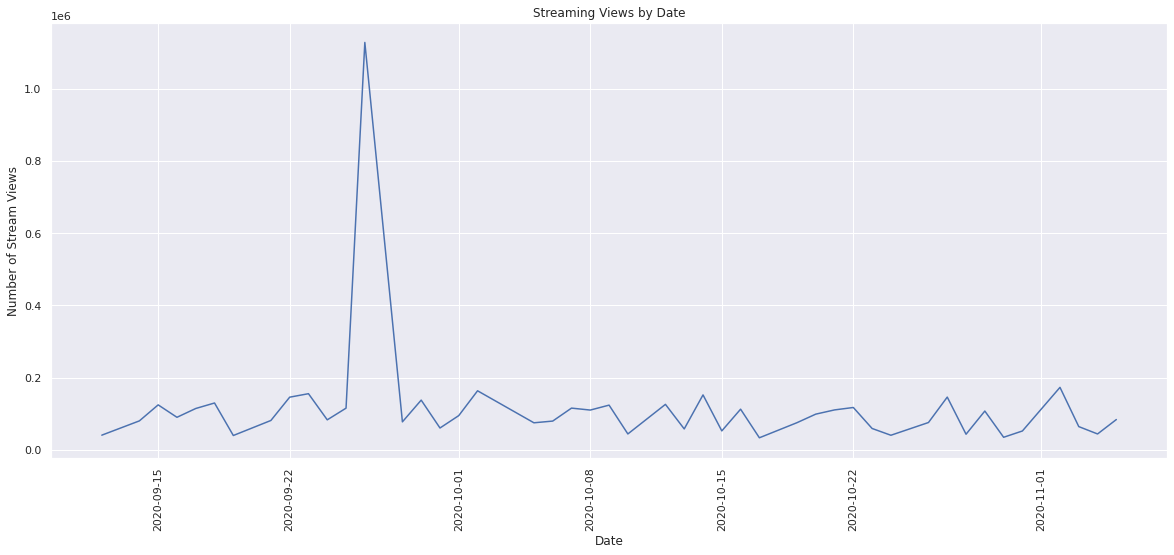

In [ ]:
views_by_date(chocotacoVideos)

In [ ]:
#What date, game, and view count drove this uptick in viewership...9.26 gained 1,127,487 views on a 6 hour stream playing a new game
chocotacoVideos
print(1127487-173050)
chocotacoVideos.groupby('date')[['view_count']].sum().sort_values(by='view_count', ascending=False)

954437


view_count
date                  
2020-09-26     1127487
2020-11-02      173050
2020-10-02      163560
2020-09-23      155551
2020-10-14      152216
2020-10-27      146125
2020-09-22      145902
2020-09-29      137764
2020-09-18      129790
2020-10-12      126026
2020-09-15      124613
2020-10-09      123887
2020-10-22      117362
2020-10-07      115636
2020-09-25      115533
2020-09-17      114587
2020-10-16      112683
2020-10-21      110653
2020-10-08      110241
2020-10-29      107507
2020-10-20       98951
2020-10-01       94925
2020-09-16       90221
2020-11-05       84029
2020-09-24       83187
2020-09-21       81448
2020-09-14       80308
2020-10-06       79761
2020-09-28       77613
2020-10-26       75784
2020-10-19       75293
2020-10-05       75009
2020-11-03       64497
2020-09-30       60596
2020-10-23       59277
2020-10-13       58058
2020-10-15       52575
2020-10-31       52379
2020-10-10       44153
2020-11-04       44119
2020-10-28       43366
2020-09-12       40787
2020-10-24       40549
2020-09-19       39843
2020-10-30       34924
2020-10-17       33541

In [ ]:
chocotacoFollowers.groupby('date')[['to_id']].count()

to_id
date             
2020-09-07    304
2020-09-08    588
2020-09-09    768
2020-09-10   1214
2020-09-11    841
2020-09-12    374
2020-09-13    249
2020-09-14    669
2020-09-15    698
2020-09-16    589
2020-09-17    628
2020-09-18    796
2020-09-19    360
2020-09-20    221
2020-09-21    614
2020-09-22   1077
2020-09-23    800
2020-09-24    605
2020-09-25    668
2020-09-26    641
2020-09-27    223
2020-09-28    573
2020-09-29    642
2020-09-30    547
2020-10-01    500
2020-10-02    583
2020-10-03    310
2020-10-04    248
2020-10-05    478
2020-10-06    416
2020-10-07    518
2020-10-08    716
2020-10-09    638
2020-10-10    312
2020-10-11    198
2020-10-12    537
2020-10-13    591
2020-10-14    565
2020-10-15    376
2020-10-16    567
2020-10-17    234
2020-10-18    204
2020-10-19    513
2020-10-20    525
2020-10-21    595
2020-10-22    627
2020-10-23    366
2020-10-24    306
2020-10-25    194
2020-10-26    471
2020-10-27    686
2020-10-28    316
2020-10-29    406
2020-10-30    609
2020-10-31    303
2020-11-01    176
2020-11-02    676
2020-11-03    565
2020-11-04    244
2020-11-05    504

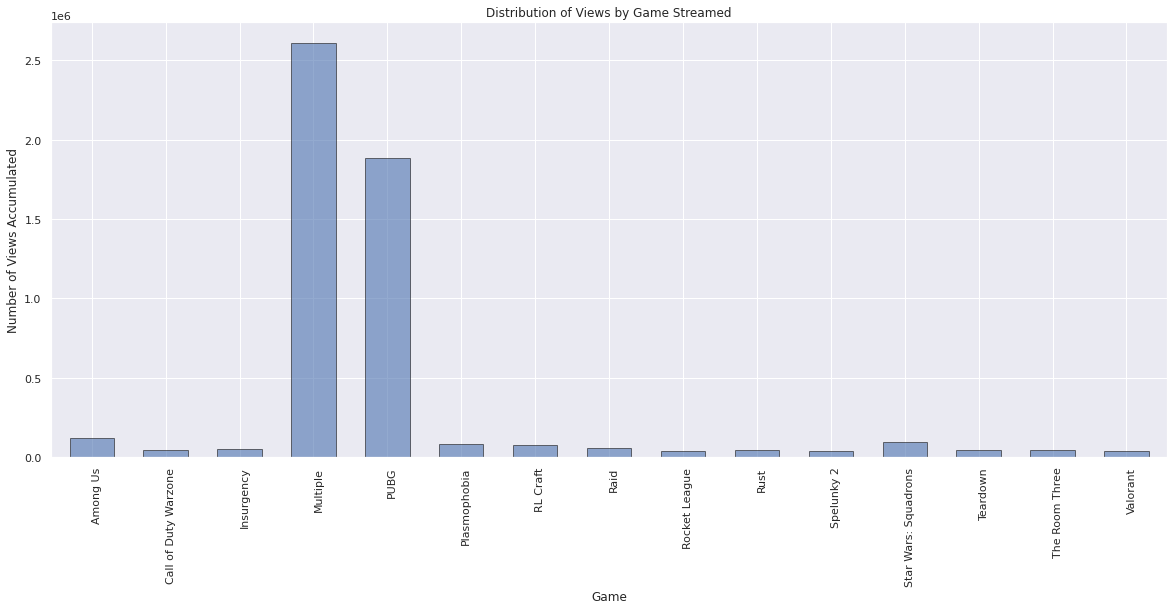

In [ ]:
view_dist_by_game(chocotacoVideos)

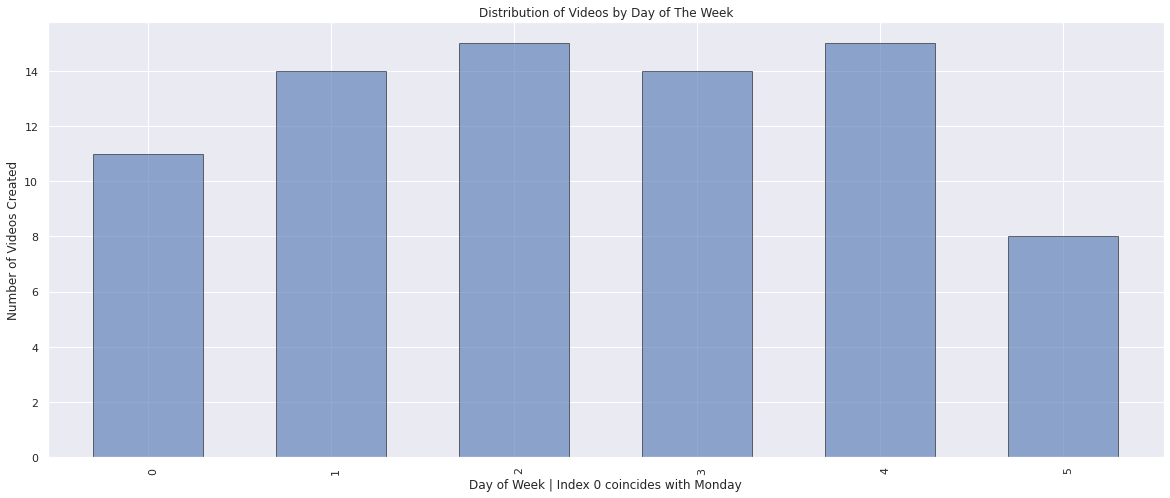

In [ ]:
video_dist_by_dow(chocotacoVideos)

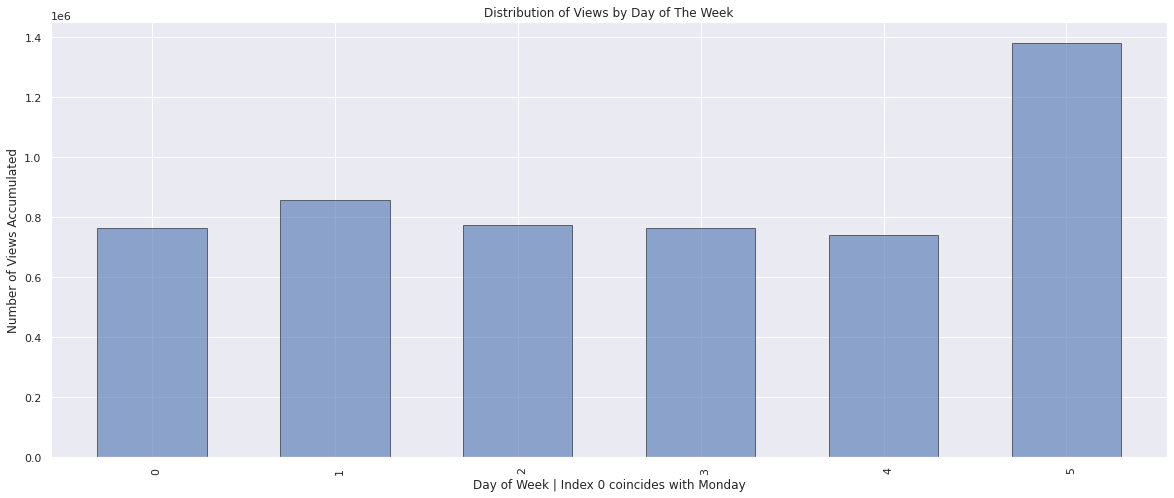

In [ ]:
view_dist_by_day(chocotacoVideos)

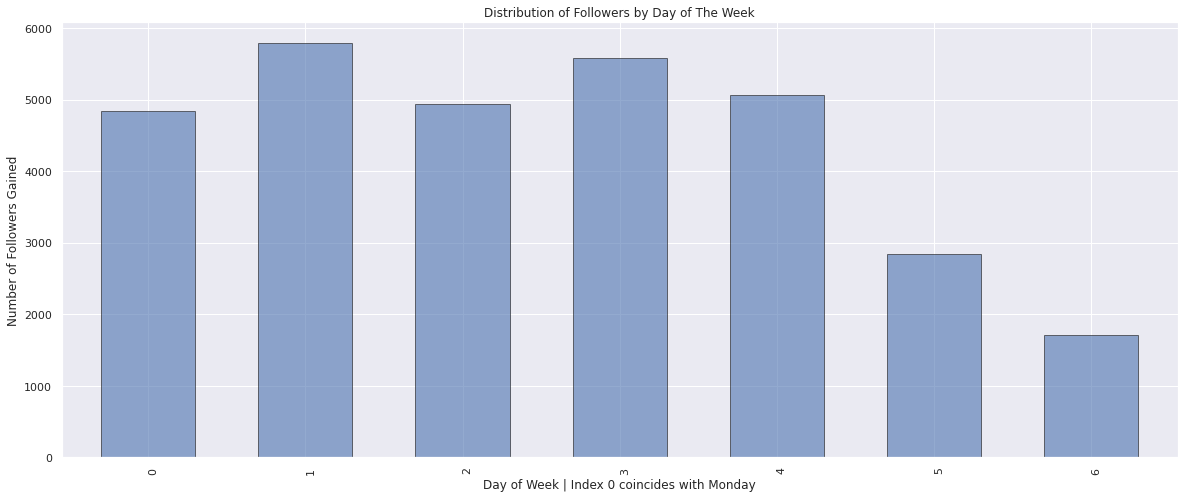

In [ ]:
follower_dist_by_day(chocotacoFollowers)

Note: scope begins on week 37 - 09/07/2020


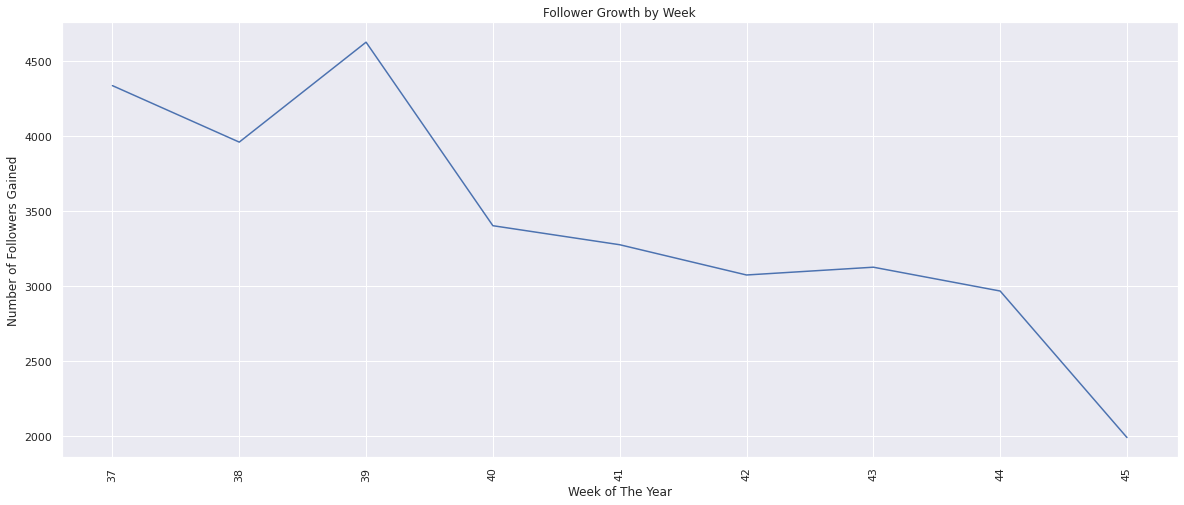

In [ ]:
followers_by_week(chocotacoFollowers)

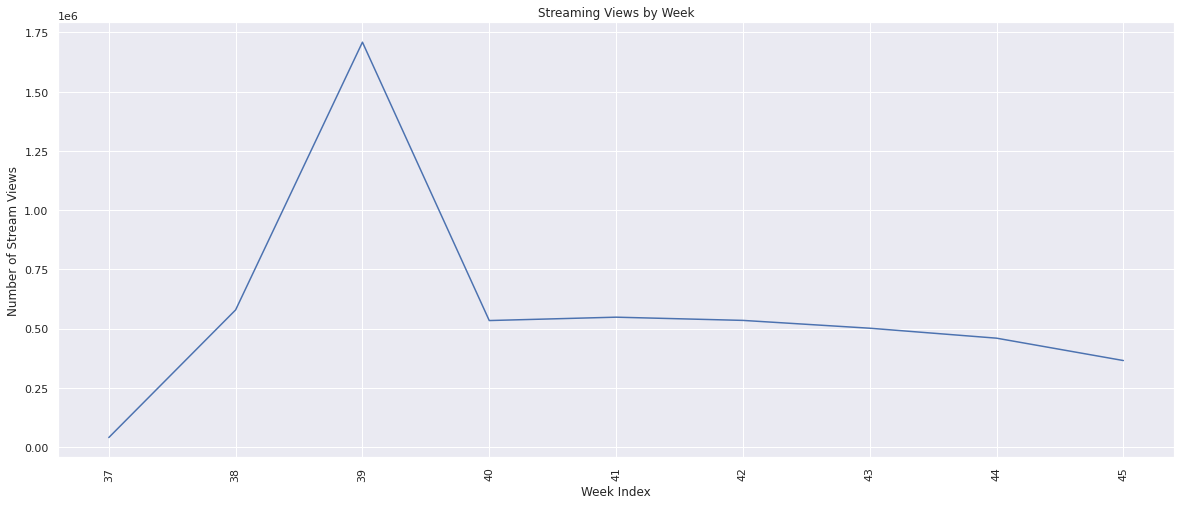

In [ ]:
views_by_week(chocotacoVideos)

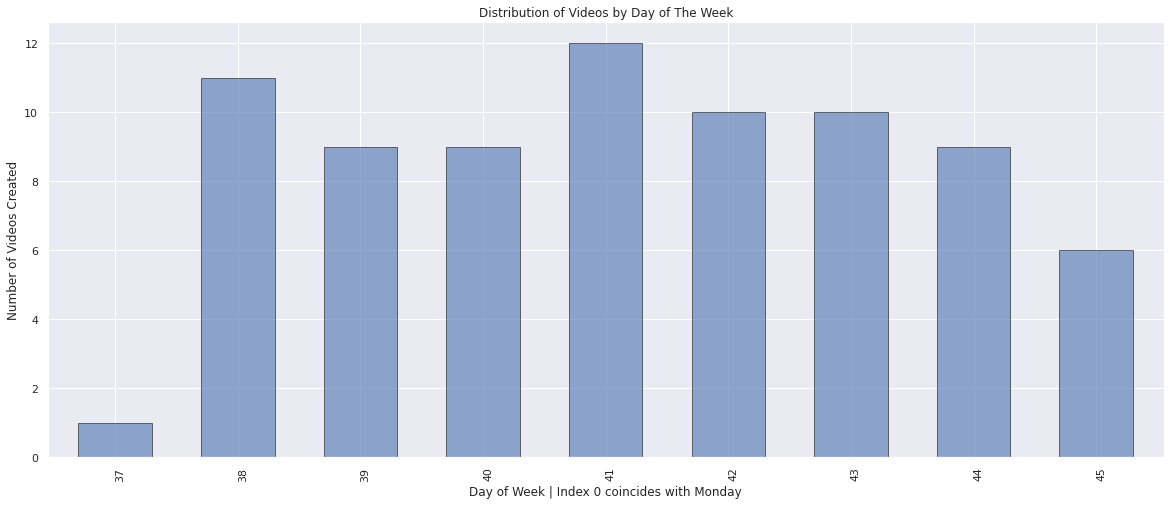

In [ ]:
video_dist_by_week(chocotacoVideos)

In [ ]:
print("Over the last 2 months, chocoTaco's average Monday follower count increased on average by:", (4835/len(chocotacoFollowers))*100)
print("Over the last 2 months, chocoTaco's average Tuesday follower count increased on average by:", (5788/len(chocotacoFollowers))*100)
print("Over the last 2 months, chocoTaco's average Wednesday follower count increased on average by:", (4942/len(chocotacoFollowers))*100)
print("Over the last 2 months, chocoTaco's average Thursday follower count increased on average by:", (5576/len(chocotacoFollowers))*100)
print("Over the last 2 months, chocoTaco's average Friday follower count increased on average by:", (5068/len(chocotacoFollowers))*100)
print("Over the last 2 months, chocoTaco's average Saturday follower count increased on average by:", (2840/len(chocotacoFollowers))*100)
print("Over the last 2 months, chocoTaco's average Sunday follower count increased on average by:", (1713/len(chocotacoFollowers))*100)
chocotacoFollowers.groupby('day')[['to_name']].count()

Over the last 2 months, chocoTaco's average Monday follower count increased on average by: 15.717443599245822
Over the last 2 months, chocoTaco's average Tuesday follower count increased on average by: 18.81542162408166
Over the last 2 months, chocoTaco's average Wednesday follower count increased on average by: 16.065275339704833
Over the last 2 months, chocoTaco's average Thursday follower count increased on average by: 18.12625967102269
Over the last 2 months, chocoTaco's average Friday follower count increased on average by: 16.474871594824783
Over the last 2 months, chocoTaco's average Saturday follower count increased on average by: 9.232169559846563
Over the last 2 months, chocoTaco's average Sunday follower count increased on average by: 5.56855861127365


to_name
day         
0       4835
1       5788
2       4942
3       5576
4       5068
5       2840
6       1713

In [ ]:
#take followers copy & views copy and merge together by dow/week index then do chart below to look at correlation
cf = chocotacoFollowers.copy()
cf = cf.groupby('date')[['to_name']].count().reset_index()
cf = cf.rename(columns={'to_name':'count_followers'})
cf.head()

date  count_followers
0 2020-09-07              304
1 2020-09-08              588
2 2020-09-09              768
3 2020-09-10             1214
4 2020-09-11              841

In [ ]:
cv = chocotacoVideos.copy()
cv = cv.groupby('date')[['view_count']].sum().reset_index()
cv.head()

date  view_count
0 2020-09-12       40787
1 2020-09-14       80308
2 2020-09-15      124613
3 2020-09-16       90221
4 2020-09-17      114587

In [ ]:
cg = chocotacoVideos.copy()
cg = cg.groupby(['date','game'])[['video_id']].count().reset_index()
cg.head()

date      game  video_id
0 2020-09-12  Multiple         1
1 2020-09-14  Multiple         1
2 2020-09-15  Multiple         1
3 2020-09-15      PUBG         1
4 2020-09-16  Multiple         1

In [ ]:
cvcf = pd.merge(cf,cv)
cvcf

date  count_followers  view_count
0  2020-09-12              374       40787
1  2020-09-14              669       80308
2  2020-09-15              698      124613
3  2020-09-16              589       90221
4  2020-09-17              628      114587
5  2020-09-18              796      129790
6  2020-09-19              360       39843
7  2020-09-21              614       81448
8  2020-09-22             1077      145902
9  2020-09-23              800      155551
10 2020-09-24              605       83187
11 2020-09-25              668      115533
12 2020-09-26              641     1127487
13 2020-09-28              573       77613
14 2020-09-29              642      137764
15 2020-09-30              547       60596
16 2020-10-01              500       94925
17 2020-10-02              583      163560
18 2020-10-05              478       75009
19 2020-10-06              416       79761
20 2020-10-07              518      115636
21 2020-10-08              716      110241
22 2020-10-09              638      123887
23 2020-10-10              312       44153
24 2020-10-12              537      126026
25 2020-10-13              591       58058
26 2020-10-14              565      152216
27 2020-10-15              376       52575
28 2020-10-16              567      112683
29 2020-10-17              234       33541
30 2020-10-19              513       75293
31 2020-10-20              525       98951
32 2020-10-21              595      110653
33 2020-10-22              627      117362
34 2020-10-23              366       59277
35 2020-10-24              306       40549
36 2020-10-26              471       75784
37 2020-10-27              686      146125
38 2020-10-28              316       43366
39 2020-10-29              406      107507
40 2020-10-30              609       34924
41 2020-10-31              303       52379
42 2020-11-02              676      173050
43 2020-11-03              565       64497
44 2020-11-04              244       44119
45 2020-11-05              504       84029

In [ ]:
cfcg = pd.merge(cf,cg)
cfcgcv = pd.merge(cfcg,cv)
cfcgcv['sum_follow_view'] = cfcgcv.apply(lambda x: x['count_followers'] + x['view_count'], axis=1)
cfcgcv.sort_values(by='sum_follow_view', ascending = False)

date  count_followers  ... view_count  sum_follow_view
17 2020-09-26              641  ...    1127487          1128128
59 2020-11-02              676  ...     173050           173726
60 2020-11-02              676  ...     173050           173726
25 2020-10-02              583  ...     163560           164143
24 2020-10-02              583  ...     163560           164143
13 2020-09-23              800  ...     155551           156351
12 2020-09-23              800  ...     155551           156351
39 2020-10-14              565  ...     152216           152781
41 2020-10-14              565  ...     152216           152781
40 2020-10-14              565  ...     152216           152781
11 2020-09-22             1077  ...     145902           146979
54 2020-10-27              686  ...     146125           146811
19 2020-09-29              642  ...     137764           138406
20 2020-09-29              642  ...     137764           138406
8  2020-09-18              796  ...     129790           130586
36 2020-10-12              537  ...     126026           126563
37 2020-10-12              537  ...     126026           126563
2  2020-09-15              698  ...     124613           125311
3  2020-09-15              698  ...     124613           125311
33 2020-10-09              638  ...     123887           124525
50 2020-10-22              627  ...     117362           117989
49 2020-10-22              627  ...     117362           117989
16 2020-09-25              668  ...     115533           116201
15 2020-09-25              668  ...     115533           116201
29 2020-10-07              518  ...     115636           116154
30 2020-10-07              518  ...     115636           116154
6  2020-09-17              628  ...     114587           115215
7  2020-09-17              628  ...     114587           115215
43 2020-10-16              567  ...     112683           113250
47 2020-10-21              595  ...     110653           111248
48 2020-10-21              595  ...     110653           111248
32 2020-10-08              716  ...     110241           110957
31 2020-10-08              716  ...     110241           110957
56 2020-10-29              406  ...     107507           107913
46 2020-10-20              525  ...      98951            99476
23 2020-10-01              500  ...      94925            95425
22 2020-10-01              500  ...      94925            95425
4  2020-09-16              589  ...      90221            90810
5  2020-09-16              589  ...      90221            90810
63 2020-11-05              504  ...      84029            84533
64 2020-11-05              504  ...      84029            84533
14 2020-09-24              605  ...      83187            83792
10 2020-09-21              614  ...      81448            82062
1  2020-09-14              669  ...      80308            80977
28 2020-10-06              416  ...      79761            80177
27 2020-10-06              416  ...      79761            80177
18 2020-09-28              573  ...      77613            78186
53 2020-10-26              471  ...      75784            76255
45 2020-10-19              513  ...      75293            75806
26 2020-10-05              478  ...      75009            75487
61 2020-11-03              565  ...      64497            65062
21 2020-09-30              547  ...      60596            61143
51 2020-10-23              366  ...      59277            59643
38 2020-10-13              591  ...      58058            58649
42 2020-10-15              376  ...      52575            52951
58 2020-10-31              303  ...      52379            52682
34 2020-10-10              312  ...      44153            44465
35 2020-10-10              312  ...      44153            44465
62 2020-11-04              244  ...      44119            44363
55 2020-10-28              316  ...      43366            43682
0  2020-09-12              374  ...      40787            41161
52 2020-10-24              306  ...      

[]

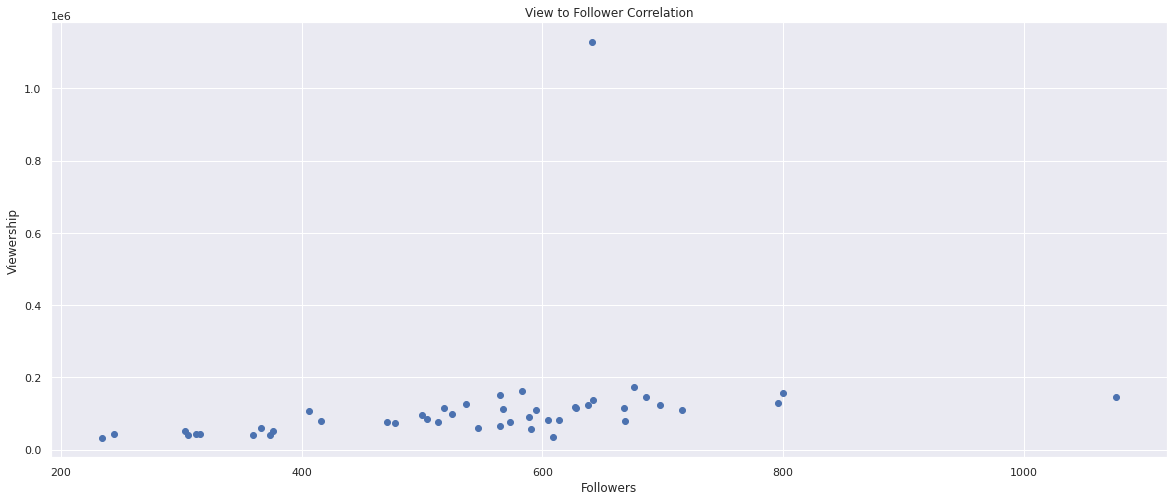

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(data=cvcf, x="count_followers", y="view_count")
plt.xlabel("Followers")
plt.ylabel("Viewership")
plt.title("View to Follower Correlation")
plt.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data, kind. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


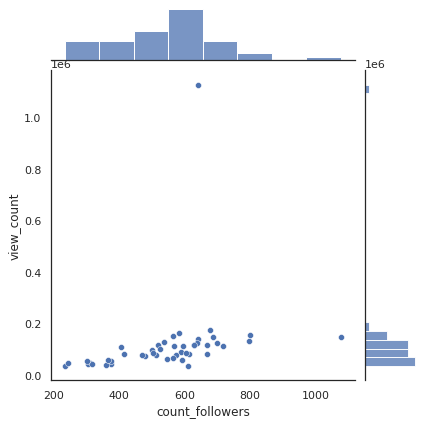

In [ ]:
follower_view_joint_scatter_bydate(cvcf)

Burak's time Intervals

In [ ]:
a = chocotacoVideos.groupby(['view_count','created_at']).size().reset_index(name='Count')
a.sort_values(ascending=False,by='view_count',inplace=True)
a.head()

view_count                created_at  Count
76     1127487 2020-09-26 00:43:03+00:00      1
75      118155 2020-11-02 18:42:01+00:00      1
74      105366 2020-09-23 16:51:46+00:00      1
73       84915 2020-10-27 16:28:11+00:00      1
72       83187 2020-09-24 16:08:42+00:00      1

In [ ]:
a["created_at"] = pd.to_datetime(a["created_at"], format='%Y-%m-%d %H:%M:%S')
a["intervals"] = a["created_at"].apply(lambda x:str(x.hour)+"-"+str(x.hour+1))
a.head(10)

view_count                created_at  Count intervals
76     1127487 2020-09-26 00:43:03+00:00      1       0-1
75      118155 2020-11-02 18:42:01+00:00      1     18-19
74      105366 2020-09-23 16:51:46+00:00      1     16-17
73       84915 2020-10-27 16:28:11+00:00      1     16-17
72       83187 2020-09-24 16:08:42+00:00      1     16-17
71       81448 2020-09-21 16:03:05+00:00      1     16-17
70       81424 2020-10-14 16:06:30+00:00      1     16-17
69       80308 2020-09-14 16:08:31+00:00      1     16-17
68       78692 2020-09-22 16:14:25+00:00      1     16-17
67       77613 2020-09-28 16:00:16+00:00      1     16-17

In [ ]:
a.value_counts('intervals')

intervals
16-17    33
0-1      29
23-24     3
19-20     3
17-18     3
21-22     2
3-4       1
22-23     1
18-19     1
1-2       1
dtype: int64

In [ ]:
print(a['view_count'].loc[a['intervals'] == "16-17"].sum())
print(a['view_count'].loc[a['intervals'] == "0-1"].sum())
print(a['view_count'].loc[a['intervals'] == "23-24"].sum())
print(a['view_count'].loc[a['intervals'] == "19-20"].sum())
print(a['view_count'].loc[a['intervals'] == "17-18"].sum())
print(a['view_count'].loc[a['intervals'] == "21-22"].sum())
print(a['view_count'].loc[a['intervals'] == "3-4"].sum())
print(a['view_count'].loc[a['intervals'] == "22-23"].sum())
print(a['view_count'].loc[a['intervals'] == "18-19"].sum())
print(a['view_count'].loc[a['intervals'] == "1-2"].sum())


2111192
2472578
134365
90132
153761
143561
11525
1213
118155
38884


In [ ]:
print(2111192/33)
print(2472578/29)
print(134365/3)
print(90132/3)
print(153761/3)
print(143561/2)
print(11525/1)
print(1213/1)
print(118155/1)
print(38884/1)

63975.51515151515
85261.31034482758
44788.333333333336
30044.0
51253.666666666664
71780.5
11525.0
1213.0
118155.0
38884.0


According to the averages, we can say that it gets the most watch between 18-19.

# Overall Analysis, correlations, suggestions, etc..


Can we identify the best time to stream to gain followers or view count?


*   Myth: Wednesday and Thursday (streams mornings and afternoons)
*   Ninja: Thursday and Friday (streams late at night)

*   Sykkuno: Wednesday and Thursday (streams late at night)

*   chocoTaco: Mondays by a little bit (streams afternoons and late nights)

*   Hasan Abi: Mondays and Tuesdays (before the election) (streams afternoons and nights)
*   SypherPK: Wednesday and Tuesday (streams late)



Can we identify the best game/category to gain followers or view count?



Myth: Among Us

Ninja: Valorant/Among Us/Fortnite

Sykkuno: Among Us

chacoTaco: PUBG

Hasan Abi: Just Chatting (political)
SypherPK: Fortnite


Out of the users in the scope, who has the best and worst performances?

*Best/Worst Follower Growth %*

Myth: 4.5%

Ninja: 8.3%

**Sykkuno: (Best) 231%**

**chacoTaco:  2.7% (Worst)**

Hasan Abi: 54%

SypherPK: 9.5%



The highest/lowest combined follower and view count?

Myth: 125,524,131

**Ninja: 518,517,717 (Best)**

SypherPK: 78,381,123 	

**Sykkuno: 17,572,873 (Worst)** 

HasanAbi: 33,051,836

ChocoTaco: 59,828,126





Best/Worst view to duration Ratio

Myth: 11 days 09:04:33 (124824131/273 hours)

457,231.24


 **** Ninja: 12 days 10:45:44 (502417717/298 hours) BEST**

 **1,685,965.49 views per hour of streaming**

SypherPK: 13 days 18:02:45 (74481123/330 hours)

225,700.37


Sykkuno: 12 days 06:47:20 (16342873/294 hours)

55,588.00

** HasanAbi: 24 days 15:45:34 (32304836/591 hours) WORST**

** 54,661.31 views per hour of streaming**

ChacoTaco: 15 days 08:19:37 (58665126/375 hours)

156,440.3



*Best/Worst View to Follower Ratio*

**Myth: 124824131/700000 (178.32)**

Ninja: 502417717:16100000 (31.21)

SypherPK: 74481123:3900000 	(19.09)

**Sykkuno: 16342873/1230000 (13.29)**

HasanAbi: 32304836/747000 (43.25)

ChocoTaco: 58665126/1163000	(50.44)

• Is there any correlation to view count and trending games?
Yes, mostly, can show view count with each of the Among Us streams in graphs

	• The Users gained almost 3 million new followers combined across the span of the scope for a growth percentage of 10.67%.
	• The users had a combined stream duration of about 89 days and 21 hours with the average stream being about a day and a half  long across all of them.
	• The total view count for all streams was nearly 155 Million over the span of the scope
	• 61.8% of all user videos are archives (streams) but that number is depreciated because of SypherPK who has 199 highlights opposed to a combined 9 highlights for the other 5 users.
		○ Highlight views only have a combined 80k views so highlights are not super relevant to performance
Among us is the most streamed game across the scope of users with 21.1% of all videos being Among Us.

# Extras - Use:TBD

In [ ]:
#Extras: Not sure if or how to implement

In [ ]:
print('Start of Week (0) begins on Monday')
uservidarchives = userVideos.copy() 
uservidarchives['arch'] = (uservidarchives['type'] == 'archive')
uservidarchives = uservidarchives[uservidarchives.arch==True]
video_dist_by_day = uservidarchives.groupby(['day','user_name'])[['video_id']].count()
video_dist_by_week = uservidarchives.groupby(['week','user_name'])[['video_id']].count()

In [ ]:
ax = video_dist_by_day.plot(kind='bar', figsize=[20, 8])
ax.set_xticklabels(video_dist_by_day.index, rotation=90)
ax.grid(zorder=0)
ax.set_title('Video Distribution by Day of The Week over the past 2 months')
plt.show()

In [ ]:
ax = video_dist_by_week.plot(kind='bar', figsize=[20, 9])
ax.set_xticklabels(video_dist_by_week.index, rotation=90)
ax.grid(zorder=0)
ax.set_title('Video Distribution by Week over the past 2 months')
plt.show()

In [ ]:
chocotacoFollowers
chocotacoFollowers.groupby('week')[['to_name']].count()

In [ ]:
print(str.isupper('ok'))
print(str.isupper('OK'))
print(str.isupper('Ok'))
print(str.isupper('OK!'))